## Import libraries and data 

<h4 style="text-align:center; " > <b>Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


<h4 style="text-align:center; " > <b> Import Data

In [2]:
data = pd.read_csv("data/survey_results_public.csv")        
data_schema= pd.read_csv("data/survey_results_schema.csv")



                                what we can see when we call specific data from files

In [3]:
pd.set_option('display.max_columns', 5)  ### number of columns
pd.set_option('display.max_rows', None)  ### number of rows

##  Create functions for data processing


In [4]:
def sort_dict_by_value(Dictionary, reverse = False):       #### Sorts in ascending or descending order
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                            graph building functions

In [5]:
############## graph with percent

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [6]:
######### graph without percent
def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # accuracy of percentage 


    plt.barh(langs, langs_users_num)   # drawing itself
    plt.yticks(range(len(langs)), new_labels) # depiction of percentage and Layout of axes 



    for spine in ax.spines.values():      #removing vertical lines
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)   #putting/removing values on x Axis
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   #style of drawing

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()

    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()

                                           list sort function(for lists in lists)

In [7]:
def list_sorter_counter(filtered_list):
  
    global key_Phrases     # We declare it as a global variable, to use in other functions
    global Quantity        # We declare it as a global variable, to use in other functions
    

    union = []                          # One big list, to save every element here.


###### function that add every element into one list (in union)
    for i in filtered_list:
        for k in i :  
            union.append(k)          
            

    
##### count  how many times element is repeated in union
    Counted = Counter(union)             


#### sorted by increase - decrease
    Counted = sort_dict_by_value(Counted, False) 


    key_Phrases = []  # empty list for phrases
    Quantity = []   # empty list for quantity



    items = Counted.items()    # this turning dictionary into list

#### add elements in lists (key_phrases and in quantity)
    for item in items:       
        key_Phrases.append(item[0])   
        Quantity.append(item[1])     


                 The most common function for lists (not lists in list just one list)

In [8]:
def Dictionary_Distributor(filtered_list , Increase_decrease):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    Counted = Counter(filtered_list)   # Count everysing into filtered_list

    sorted = sort_dict_by_value (Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"

    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in sorted:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(sorted[i])      # Add Quantity into Quantity' list

                                  Some functions for different age groups 

In [9]:
############ age 5 to 50

def year_5_to_50(sorted_list):
    global Phrases_5_to_50
    global quantity_5_to_50

    ########## empty lists for different ages #################
    less_than_5 = []
    from_5_to_9 = []
    from_10_to_14 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    more_than_50 =[]

    ########## replace less that 1 year with 1 and more than 50 years with 50 ########
    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Less than 1 year', "1", sorted_list)
    sorted_list = np.where(sorted_list == 'More than 50 years', "50", sorted_list)

    
    ######## adding appropriate elements in different age lists
    for i in sorted_list:
        if i in str(list(range(0,5))):
            less_than_5.append(i)
        elif i in str(list(range(5,10))):
            from_5_to_9.append(i)
        elif i in str(list(range(10,15))):
            from_10_to_14.append(i)
        elif i in str(list(range(15,20))):
            from_15_to_19.append(i)
        elif i in str(list(range(20,25))):
            from_20_to_24.append(i)
        elif i in str(list(range(25,30))):
            from_25_to_29.append(i)
        elif i in str(list(range(30,35))):
            from_30_to_34.append(i)
        elif i in str(list(range(35,40))):
            from_35_to_39 .append(i)
        elif i in str(list(range(40,45))):
            from_40_to_44.append(i)
        elif i in str(list(range(45,50))):
            from_45_to_49.append(i)
        elif i in str(list(range(50,100))):
            more_than_50.append(i)
            

    ######### phrases and quantity lists for ages and quantity of each ages #############
    Phrases_5_to_50= ["less than 5", "5 to 9", "10 to 14", "15 to 19", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 or more"]
    quantity_5_to_50 = [len(less_than_5), len(from_5_to_9), len(from_10_to_14), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(more_than_50)]

    Phrases_5_to_50.reverse()      ###### reverse data on graph #######
    quantity_5_to_50.reverse()

   


In [10]:
######### age 10 to 30 ##############
def year_10_to_30(sorted_list):
    global Phrases_10_to_30
    global Quantity_10_to_30

    ########## empty lists for different ages #################
    less_than_10 = []
    from_10_to_11 = []
    from_12_to_13 = []
    from_14_to_15 = []
    from_16_to_17 = []
    from_18_to_19 = []
    from_20_to_21 = []
    from_22_to_23 = []
    from_24_to_25 = []
    from_26_to_27 = []
    from_28_to_29 = []
    more_than_30 =[]


    ########## replace younger than 5 years with 5 and Older than 85 with 85 ########

    sorted_list = np.array(sorted_list)
    sorted_list = np.where(sorted_list == 'Younger than 5 years', "5", sorted_list)
    sorted_list = np.where(sorted_list == 'Older than 85', "85", sorted_list)

   
    ######## adding appropriate elements in different age lists
    for i in sorted_list:
        if i in str(list(range(0,10))):
            less_than_10.append(i)
        elif i in str(list(range(10,12))):
            from_10_to_11.append(i)
        elif i in str(list(range(12,14))):
            from_12_to_13.append(i)
        elif i in str(list(range(14,16))):
            from_14_to_15.append(i)
        elif i in str(list(range(16,18))):
            from_16_to_17.append(i)
        elif i in str(list(range(18,20))):
            from_18_to_19.append(i)
        elif i in str(list(range(20,22))):
            from_20_to_21.append(i)
        elif i in str(list(range(22,24))):
            from_22_to_23 .append(i)
        elif i in str(list(range(24,26))):
            from_24_to_25.append(i)
        elif i in str(list(range(26,28))):
            from_26_to_27.append(i)
        elif i in str(list(range(28,30))):
            from_28_to_29.append(i)
        elif i in str(list(range(30,100))):
            more_than_30.append(i)
            







    ######### phrases and quantity lists for ages and quantity of each ages #############

    Phrases_10_to_30= ["less than 10", "10 to 11", "12 to 13", "14 to 15", "16 to 17", "18 to 19", "20 to 21", "22 to 23", "24 to 25", "26 to 27", " 28 to 29", "30 or more"]
    Quantity_10_to_30 = [len(less_than_10), len(from_10_to_11), len(from_12_to_13), len(from_14_to_15), len(from_16_to_17), len(from_18_to_19), len(from_20_to_21),  len(from_22_to_23), len(from_24_to_25),  len(from_26_to_27), len(from_28_to_29), len(more_than_30)]

    Phrases_10_to_30.reverse()       ###### reverse data on graph #######
    Quantity_10_to_30.reverse()

    

In [11]:
############### age 15 to 60 ##############
def year_15_to_60(sorted_list):
    global Phrases_15_to_60
    global quantity_15_to_60

    ########## empty lists for different ages #################
    less_than_15 = []
    from_15_to_19 = []
    from_20_to_24 = []
    from_25_to_29 = []
    from_30_to_34 = []
    from_35_to_39 = []
    from_40_to_44 = []
    from_45_to_49 = []
    from_50_to_54 = []
    from_55_to_59 = []
    more_than_60 =[]

    
    ######## adding appropriate elements in different age lists
    for i in sorted_list:
        if int(i) in list(range(0,15)):
            less_than_15.append(i)
        elif int(i) in list(range(15,20)):
            from_15_to_19.append(i)
        elif int(i) in list(range(20,25)):
            from_20_to_24.append(i)
        elif int(i) in list(range(25,30)):
            from_25_to_29.append(i)
        elif int(i) in list(range(30,35)):
            from_30_to_34.append(i)
        elif int(i) in list(range(35,40)):
            from_35_to_39.append(i)
        elif int(i) in list(range(40,45)):
            from_40_to_44.append(i)
        elif int(i) in list(range(45,50)):
            from_45_to_49 .append(i)
        elif int(i) in list(range(50,55)):
            from_50_to_54.append(i)
        elif int(i) in list(range(55,60)):
            from_55_to_59.append(i)
        elif int(i) in list(range(60,100)):
            more_than_60.append(i)
            

    ######### phrases and quantity lists for ages and quantity of each ages #############
    Phrases_15_to_60= ["less than 15", "15_to_19", "20_to_24", "25_to_29", "30_to_34", "35_to_39", "40_to_44", "45_to_49", "50_to_54", "55_to_59", "60 or more"]
    quantity_15_to_60 = [len(less_than_15), len(from_15_to_19), len(from_20_to_24), len(from_25_to_29), len(from_30_to_34), len(from_35_to_39), len(from_40_to_44), len(from_45_to_49), len(from_40_to_44), len(from_55_to_59), len(more_than_60)]


    Phrases_15_to_60.reverse()    ###### reverse data on graph #######
    quantity_15_to_60.reverse()

    

## <h2 style="text-align:center; "> Data processing
                                                            

## Developer Profile

#### Developer Roles

<h5 style="text-align:center; " > <b>Developer Type

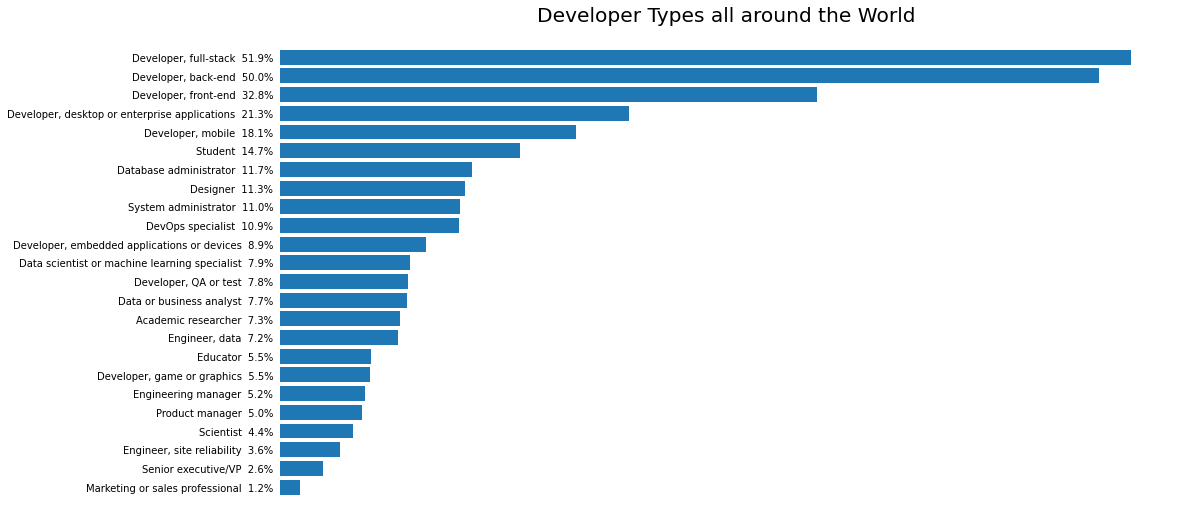

In [12]:
DevType = data["DevType"]    # Call data we need
 
DevType.dropna( inplace=True)   # filter and remove empty spaces

DevType = DevType.str.split(';')  # split elements where  ";" is written


list_sorter_counter(DevType)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # Building a graph


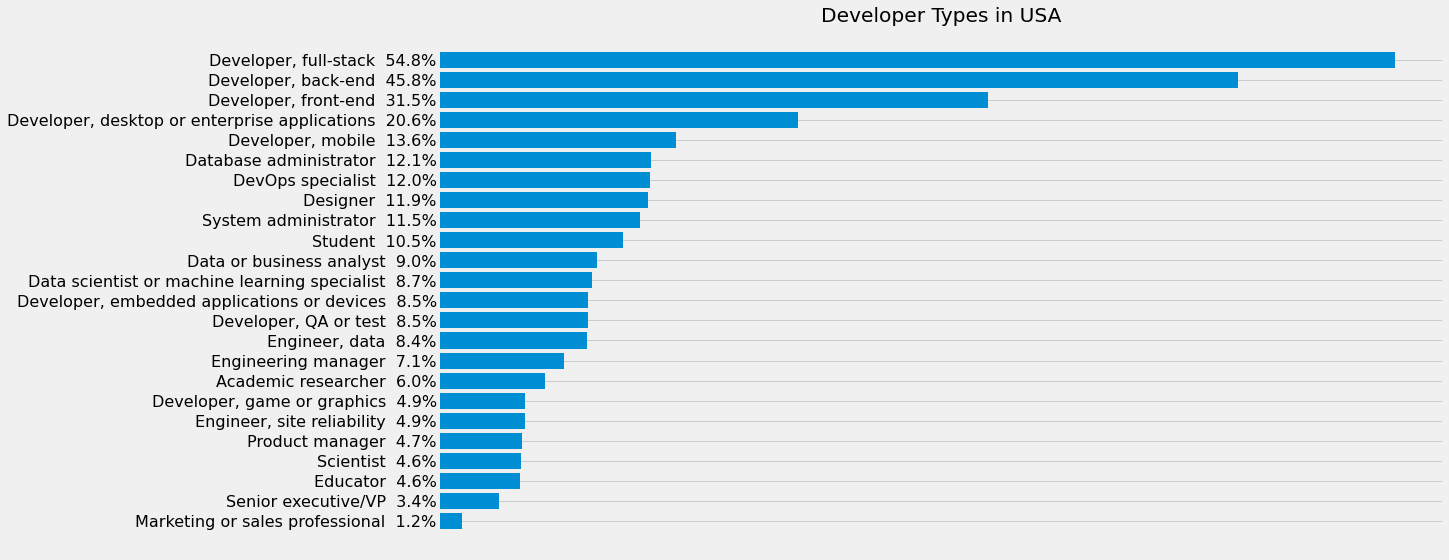

In [13]:
DevType_Filtered = data["DevType"]     # Call data we need
 
DevType_Filtered.dropna( inplace=True) # filter and remove empty spaces

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]   # Data by specific country  (USA)



New_DevType = DevType["DevType"]  # Save our new data into new variable

New_DevType = New_DevType.str.split(';')  # split elements where  ";" is written.



list_sorter_counter(New_DevType)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # Building a graph

<h5 style="text-align:center; " > <b>Contributing to Open Source

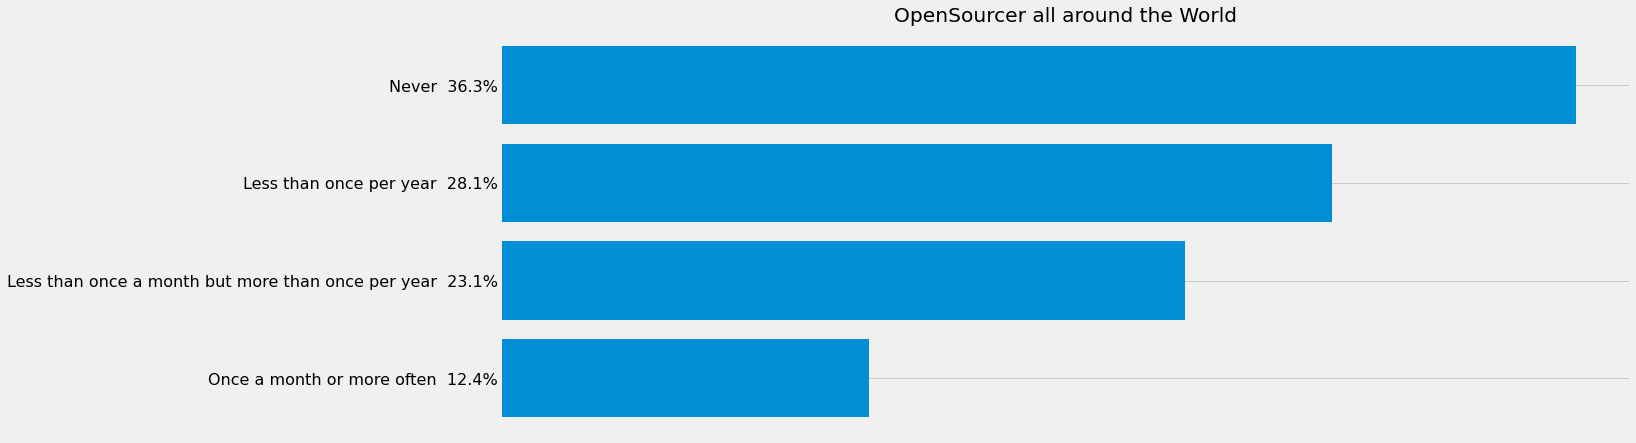

In [14]:
OpenSourcer = data["OpenSourcer"]  # Call data we need
OpenSourcer.dropna(inplace = True)  # filter and remove empty spaces

Dictionary_Distributor(OpenSourcer, False)  ####### Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # Building a graph


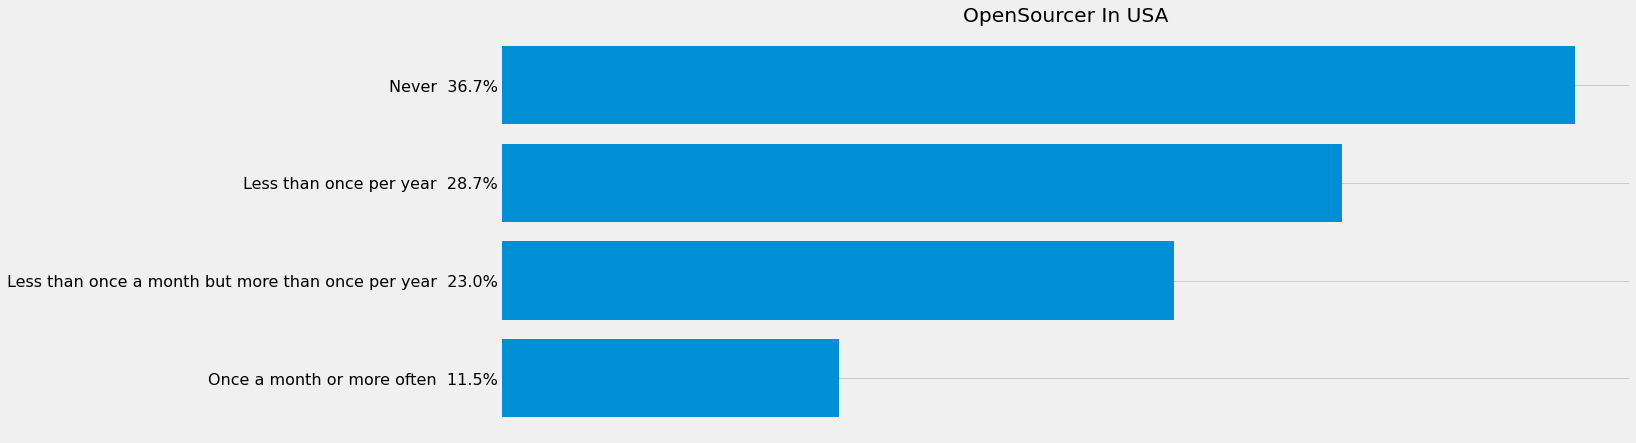

In [15]:
OpenSourcer_USA = data["OpenSourcer"] # Call data we need
OpenSourcer_USA.dropna(inplace = True)  # filter and remove empty spaces


OpenSourcer = data[(OpenSourcer_USA!= "NaN") & (data["Country"] == "United States")]   # Data by specific country  (USA)
New_Opensourcer = OpenSourcer["OpenSourcer"] # Save our new data into new variable


Dictionary_Distributor(New_Opensourcer, False)  ####### Auto sort and count


Build_Barh_sizes( key_Phrases , Quantity, New_Opensourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer In USA")    # Building a graph


<h5 style="text-align:center; " > <b>Coding as a Hobby

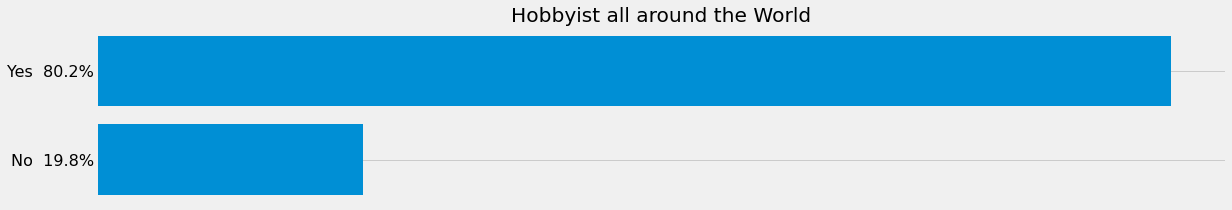

In [16]:
Hobbyist = data["Hobbyist"] # Call data we need
Hobbyist.dropna(inplace = True)  # filter and remove empty spaces

Dictionary_Distributor(Hobbyist, False)  ####### Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,3), "Hobbyist all around the World")  # Building a graph



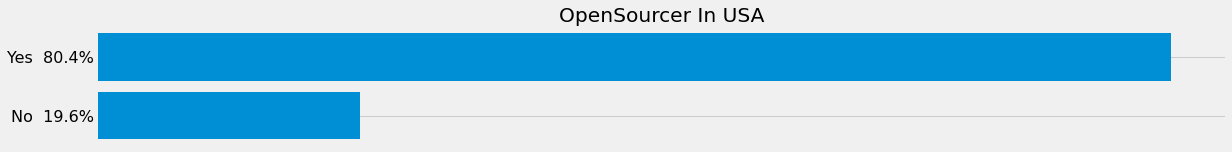

In [17]:
Hobbyist_USA = data["OpenSourcer"]  # Call data we need
Hobbyist_USA.dropna(inplace = True)   # filter and remove empty spaces

Hobbyist = data[(Hobbyist_USA != "NaN") & (data["Country"] == "United States")]   # Data by specific country  (USA)
New_Hobbyist= Hobbyist["Hobbyist"]  # Save our new data into new variable

Dictionary_Distributor(New_Hobbyist, False)  ####### Auto sort and count


Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,2), "OpenSourcer In USA")  # Building a graph


#### Experience


<h5 style="text-align:center; " > <b>Years Since Learning to Code

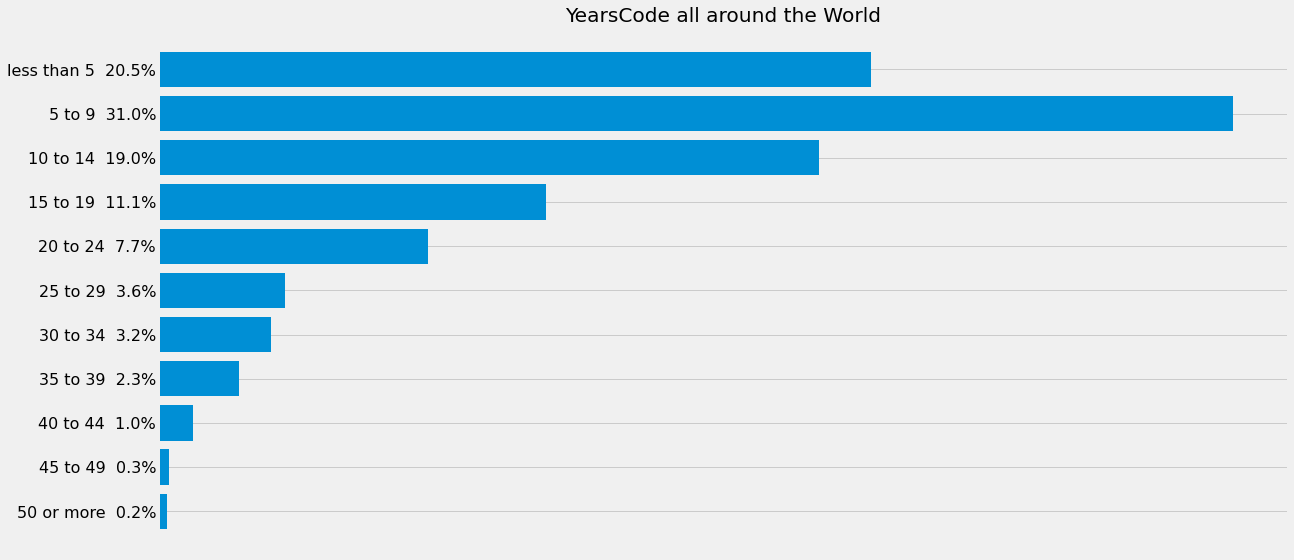

In [18]:
YearsCode = data["YearsCode"]     # Call data we need
YearsCode.dropna(inplace = True)   # filter and remove empty spaces


######### Function distributes people to different age groups
year_5_to_50(YearsCode)


Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCode, "fivethirtyeight", False , (18,9), "YearsCode all around the World")    ## Building a graph

<h5 style="text-align:center; " > <b>Years Coding Professionally

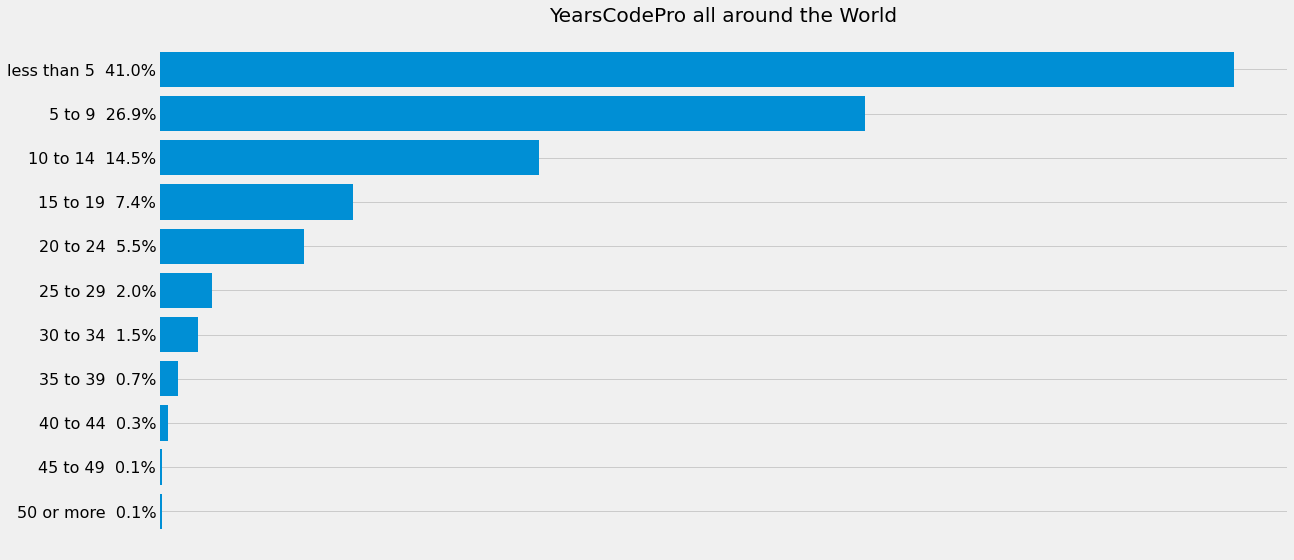

In [19]:
YearsCodePro = data["YearsCodePro"] # Call data we need
YearsCodePro.dropna(inplace=True)  # filter and remove empty spaces

######### Function distributes people to different age groups
year_5_to_50(YearsCodePro)

Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, YearsCodePro, "fivethirtyeight", False , (18,9), "YearsCodePro all around the World")   ## Building a graph


<h5 style="text-align:center; " > <b>Writing That First Line of Code

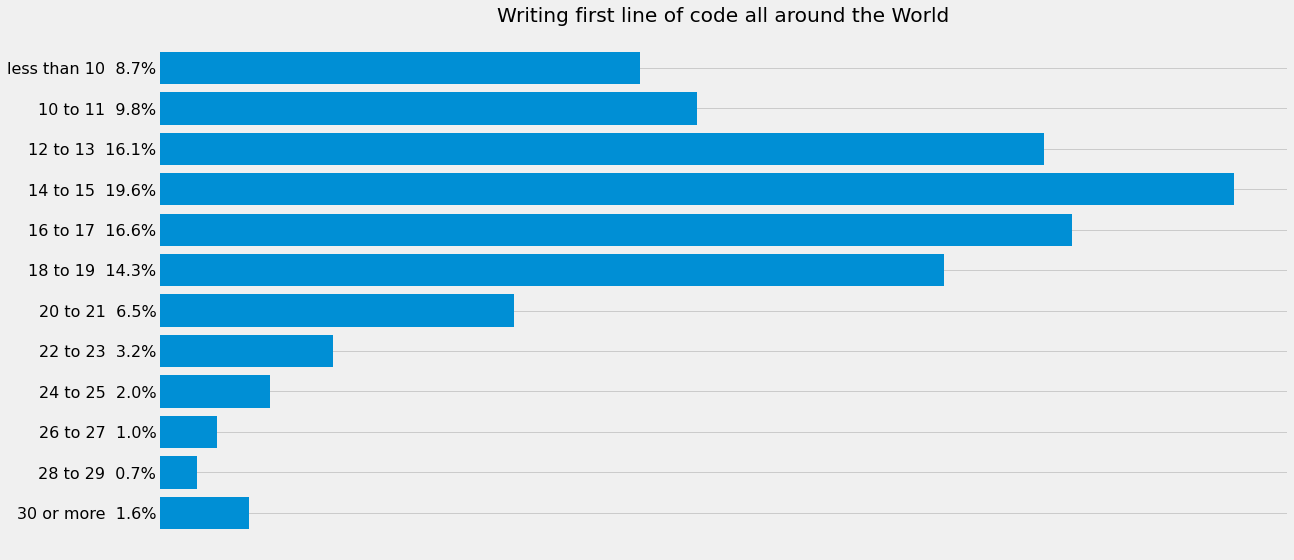

In [20]:
Age1stCode = data["Age1stCode"]  # Call data we need
Age1stCode.dropna(inplace = True) # filter and remove empty spaces


year_10_to_30(Age1stCode)  ######### Function distributes people to different age groups

Build_Barh_sizes( Phrases_10_to_30, Quantity_10_to_30, Age1stCode, "fivethirtyeight", False , (18,9), "Writing first line of code all around the World")    ## Building a graph

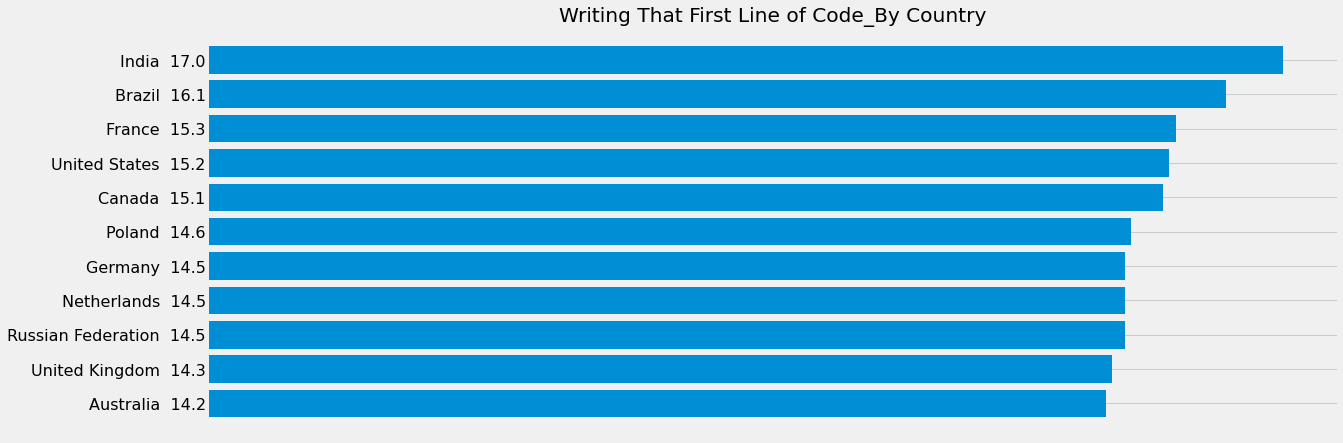

In [21]:
Age1stCode = data["Age1stCode"]     # Call data we need
Age1stCode.dropna(inplace = True)  # filter and remove empty spaces


#creating list which contains countries that I want to get data from
countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom", "Australia"]


#empty lists to add related data later
key_Phrases=[]    
Quantity=[]


for i in countries:
    age1stcode = data[(Age1stCode != "nan") & (data["Country"] == i)]  #combining datas from first code age and count 
    Agefirstcode_country =  np.array(age1stcode["Age1stCode"])
    Agefirstcode_country = np.where(Agefirstcode_country == 'Younger than 5 years', 5, Agefirstcode_country)
    Agefirstcode_country = np.where(Agefirstcode_country == 'Older than 85', "85", Agefirstcode_country)

    Agefirstcode_country = list(map( int, Agefirstcode_country))

    people = len(Agefirstcode_country)
    sum_allages = sum(Agefirstcode_country)

    average = round(sum_allages/people , 1) 

    key_Phrases.append(i)   #adding counties from previous list as key phrases
    Quantity.append(average)  #adding average ages to quantity list

key_Phrases.reverse()
Quantity.reverse()

Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code_By Country" ) #building graph 

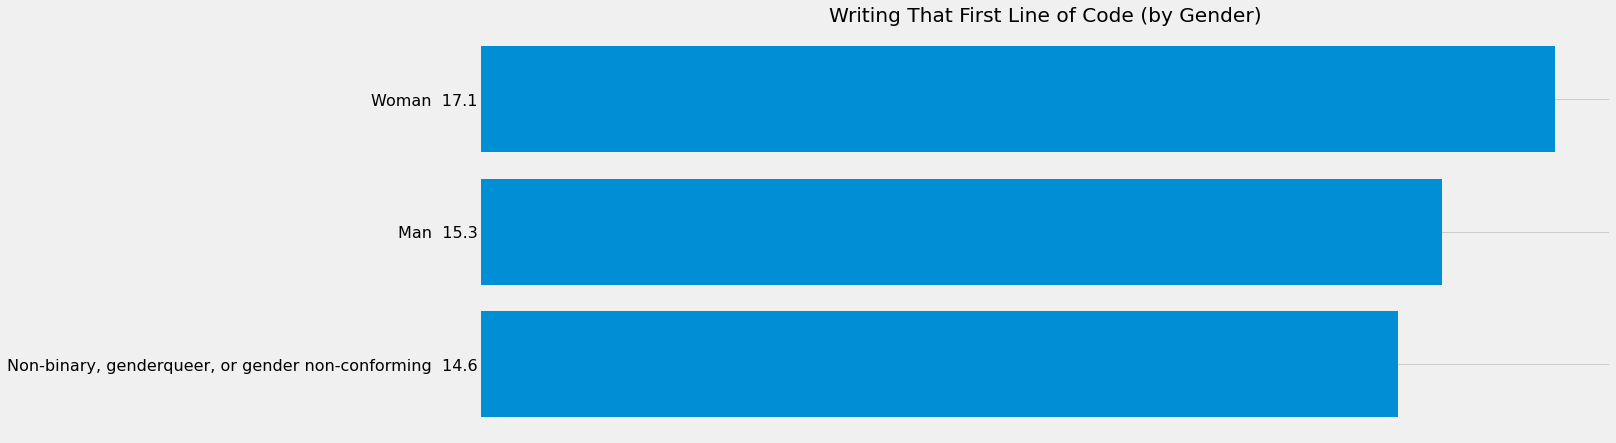

In [120]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Gender =  ["Woman" , "Man" , "Non-binary, genderqueer, or gender non-conforming"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Gender:

    new_data =data[(Age1stCode != "NaN") & (data["Gender"] == i)] # Data by specific Gender  (from list)


    new_list = np.array(new_data["Age1stCode"])    
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # replace "Younger than 5 years" with 5
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # replace "Older than 85" with 85



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    

key_Phrases.reverse()   # reverse key_Phrases
Quantity.reverse()      # reverse Quantity

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (by Gender)")  # Building a schedule

####  Education

<h5 style="text-align:center; " > <b>How Many Developers are Students?

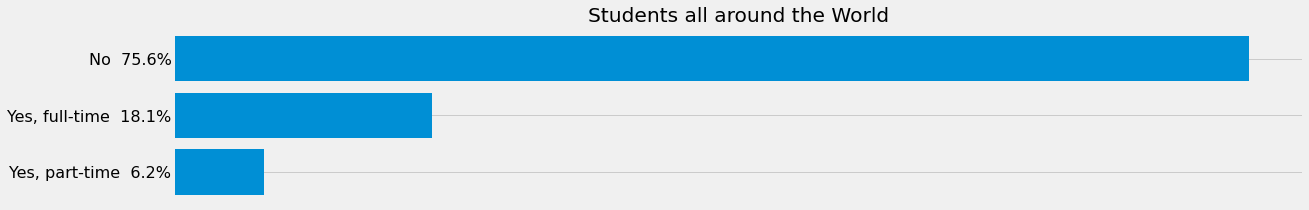

In [22]:
Student = data["Student"]  # Call data we need
Student.dropna(inplace = True)   # filter and remove empty spaces

Dictionary_Distributor(Student, False)  ####### Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,3), "Students all around the World")   ## Building  graph





<h5 style="text-align:center; " > <b>Educational Level

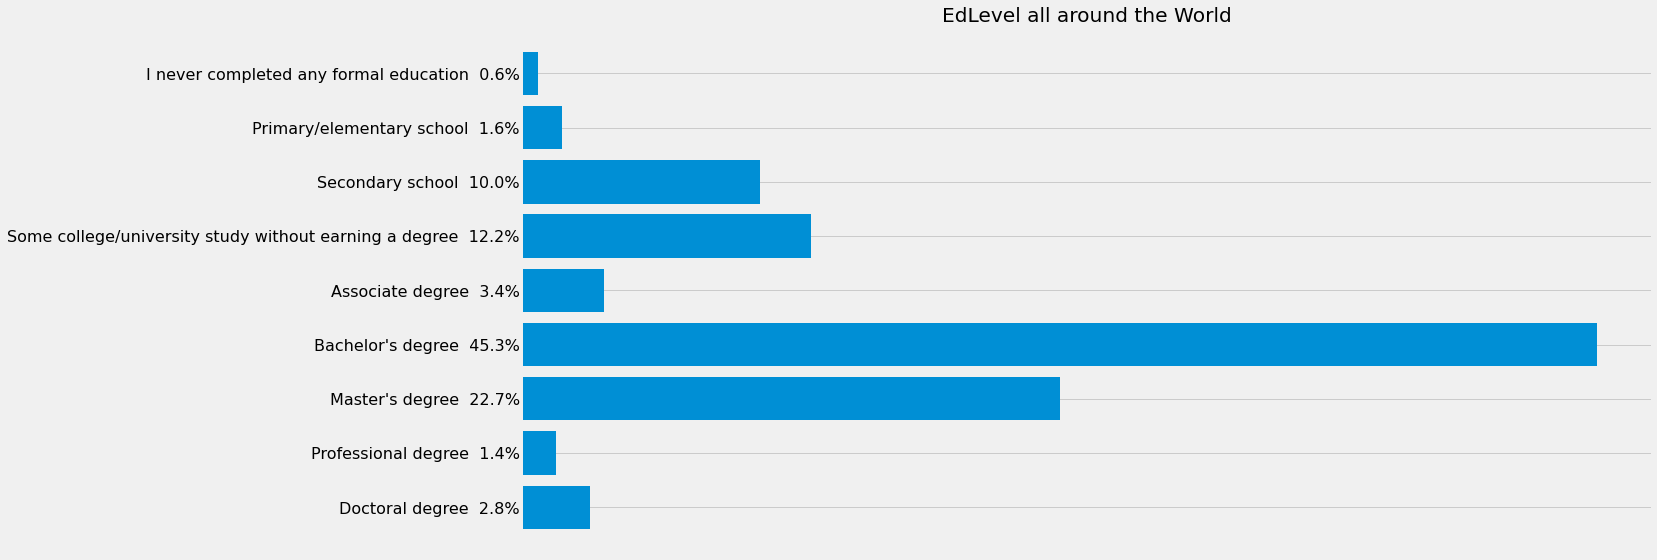

In [24]:

EdLevel = data["EdLevel"]  # Call data we need
EdLevel.dropna(inplace = True) # filter and remove empty spaces


######### creating empty lists for data #########
no_education = []
primary_school = []
secondary_school = []
collage_degree = []
associate_degree = []
bachelor_degree = []
master_degree = []
professional_degree = []
doctoral_degree = []


########## distributing data in appropriate lists ########
for i in EdLevel:
    if i=="I never completed any formal education":
        no_education.append(i)
    elif i=="Primary/elementary school":
        primary_school.append(i)
    elif i=='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':
        secondary_school.append(i)
    elif i=='Some college/university study without earning a degree':
        collage_degree.append(i)
    elif i=='Associate degree':
        associate_degree.append(i)
    elif i=='Bachelor’s degree (BA, BS, B.Eng., etc.)':
        bachelor_degree.append(i)
    elif i=='Master’s degree (MA, MS, M.Eng., MBA, etc.)':
        master_degree.append(i)
    elif i ==  'Professional degree (JD, MD, etc.)':
        professional_degree.append(i)
    elif i== 'Other doctoral degree (Ph.D, Ed.D., etc.)':
        doctoral_degree.append(i)





######## list for key phrases
key_Phrases=[ "I never completed any formal education", "Primary/elementary school", "Secondary school", "Some college/university study without earning a degree", "Associate degree", "Bachelor's degree", "Master's degree", "Professional degree", "Doctoral degree"]  # ვქმნით ფრაზების შესანახ ლისთს


#### list for quantity
Quantity = [len(no_education), len( primary_school), len(secondary_school), len(collage_degree), len(associate_degree), len(bachelor_degree), len(master_degree), len( professional_degree), len(doctoral_degree)]

########## reverse data on graph
key_Phrases.reverse()
Quantity.reverse()

## Building a graph
Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,9), "EdLevel all around the World")   


<h5 style="text-align:center; " > <b>Undergraduate Major

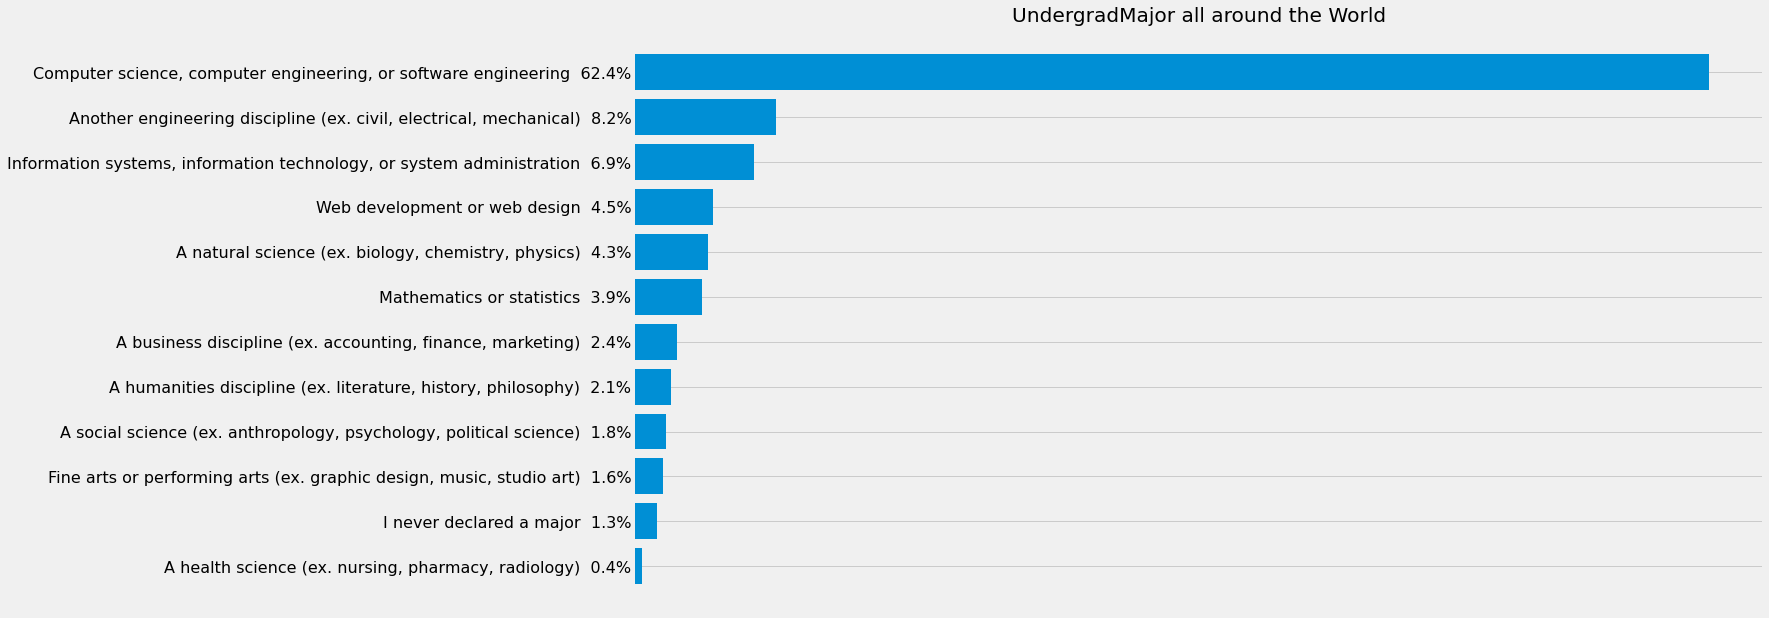

In [25]:
UndergradMajor = data ["UndergradMajor"]  # Call data we need
UndergradMajor.dropna(inplace = True)   # filter and remove empty spaces

Dictionary_Distributor(UndergradMajor, False)  ####### Auto sort and count

## Building a graph
Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,10), "UndergradMajor all around the World")   # ვაგებთ გრაფიკს


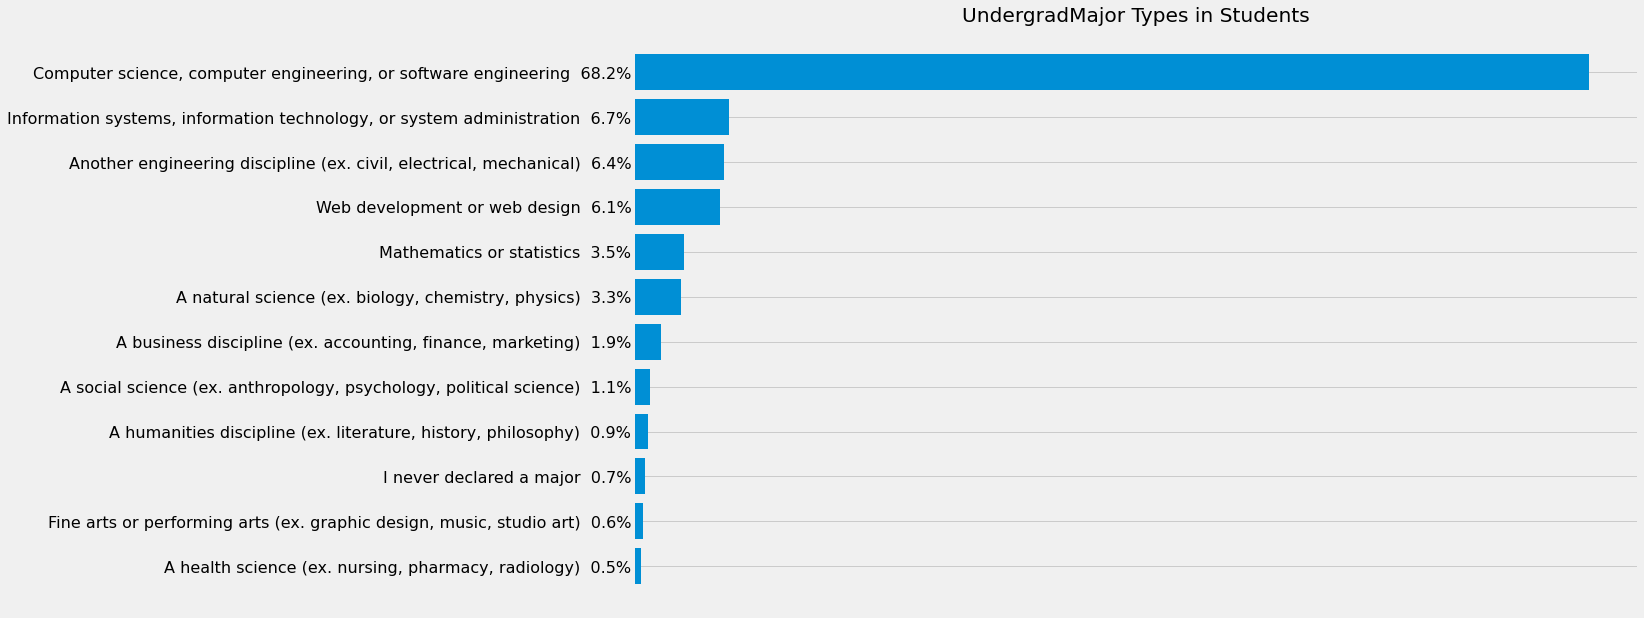

In [26]:
UndergradMajor_Filtered = data["UndergradMajor"]    # Call data we need
 
UndergradMajor_Filtered.dropna( inplace=True)  # filter and remove empty spaces

UndergradMajor =data[(UndergradMajor_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  # UndergradMajor that consist only students


New_UndergradMajor= UndergradMajor["UndergradMajor"]  ### keep our new data in new variable

New_UndergradMajor = New_UndergradMajor.str.split(';')  ### split elements where ";" is written



list_sorter_counter(New_UndergradMajor)   # auto sort and count

### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_UndergradMajor ,"fivethirtyeight", False , (16,10), "UndergradMajor Types in Students") 

<h5 style="text-align:center; " > <b>Other Types of Education

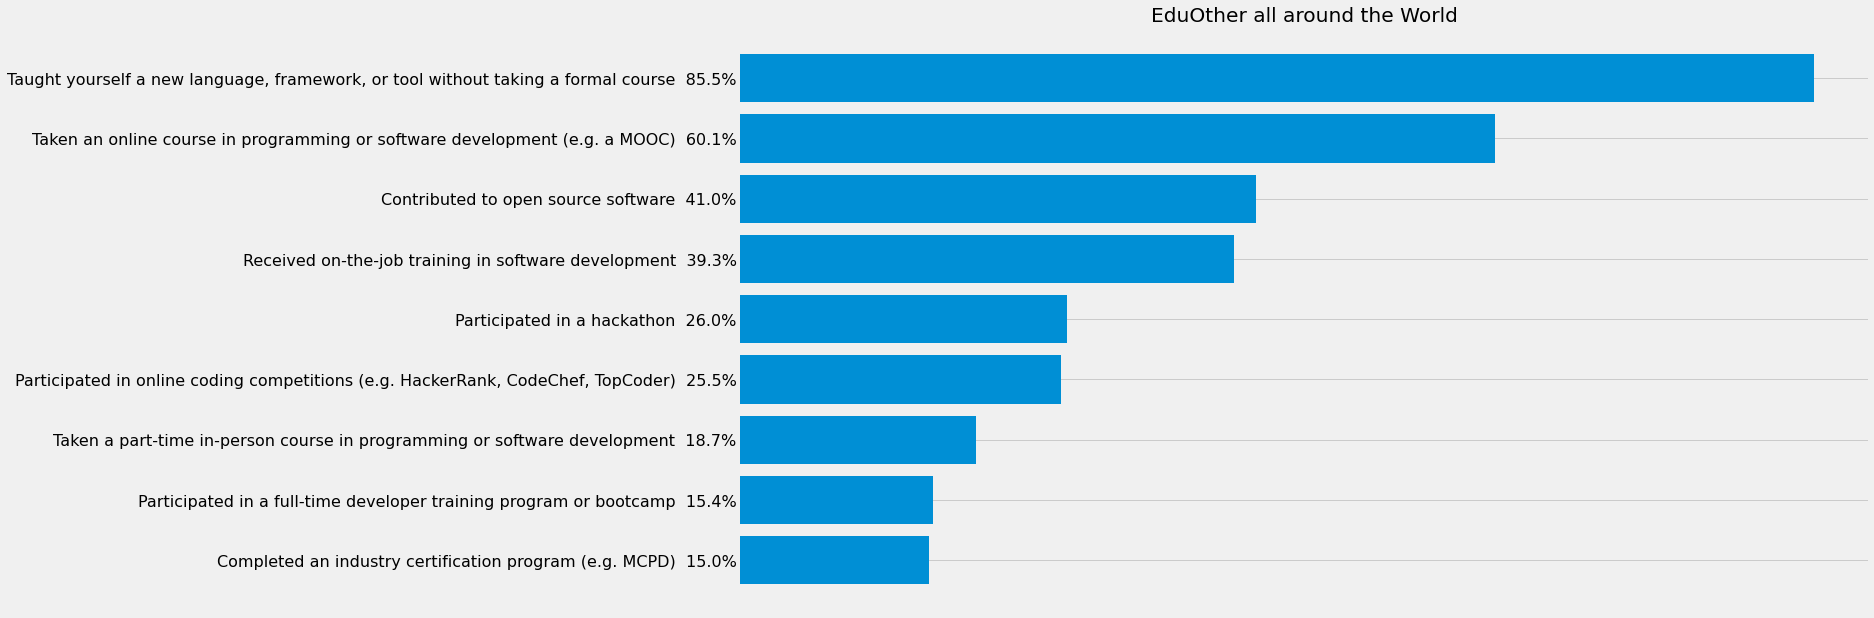

In [27]:
EduOther = data["EduOther"]   # Call data we need
EduOther.dropna(inplace = True)  # filter and remove empty spaces

EduOther = EduOther.str.split(';')  ### split elements where ";" is written
list_sorter_counter(EduOther)   ### auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, EduOther ,"fivethirtyeight", False , (18,10), "EduOther all around the World")   

####  Demographics

<h5 style="text-align:center; " > <b>Race and Ethnicity

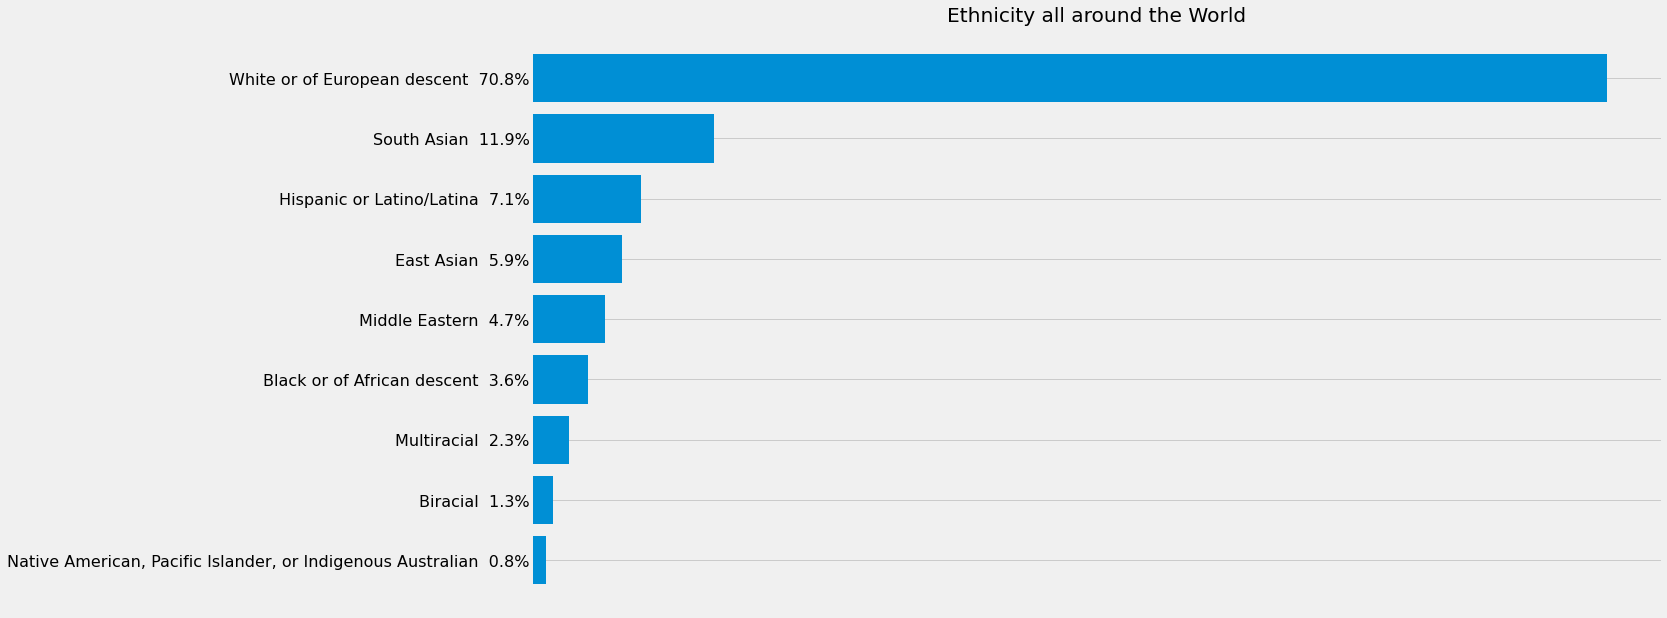

In [28]:
Ethnicity = data ["Ethnicity"]  # Call data we need
Ethnicity.dropna(inplace = True)  # filter and remove empty spaces


Ethnicity = Ethnicity.str.split(';')   ### split elements where ";" is written

list_sorter_counter(Ethnicity)  ### auto sort and count

####  building graph
Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (18,10), "Ethnicity all around the World")   

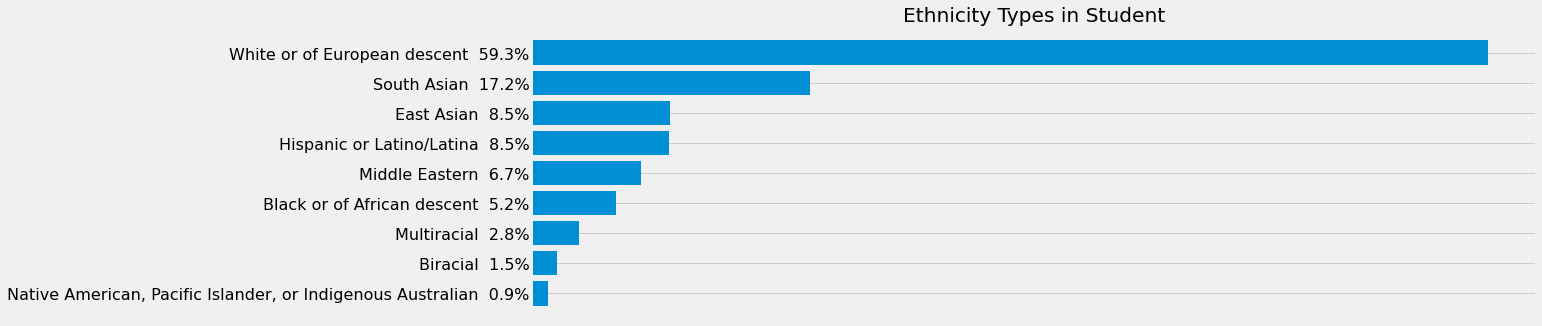

In [29]:
Ethnicity_Filtered = data["Ethnicity"]    # Call data we need
Ethnicity_Filtered.dropna( inplace=True)  # filter and remove empty spaces

Ethnicity =data[(Ethnicity_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  ## Ethnicity that consist only students


New_Ethnicity = Ethnicity["Ethnicity"]  ### keep our new data in new variable
New_Ethnicity = New_Ethnicity.str.split(';')  ### split elements where ";" is written


list_sorter_counter(New_Ethnicity)  ##### auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Ethnicity ,"fivethirtyeight", False , (16,5), "Ethnicity Types in Student") # ვაგებთ გრაფიკს



<h5 style="text-align:center; " > <b>Gender

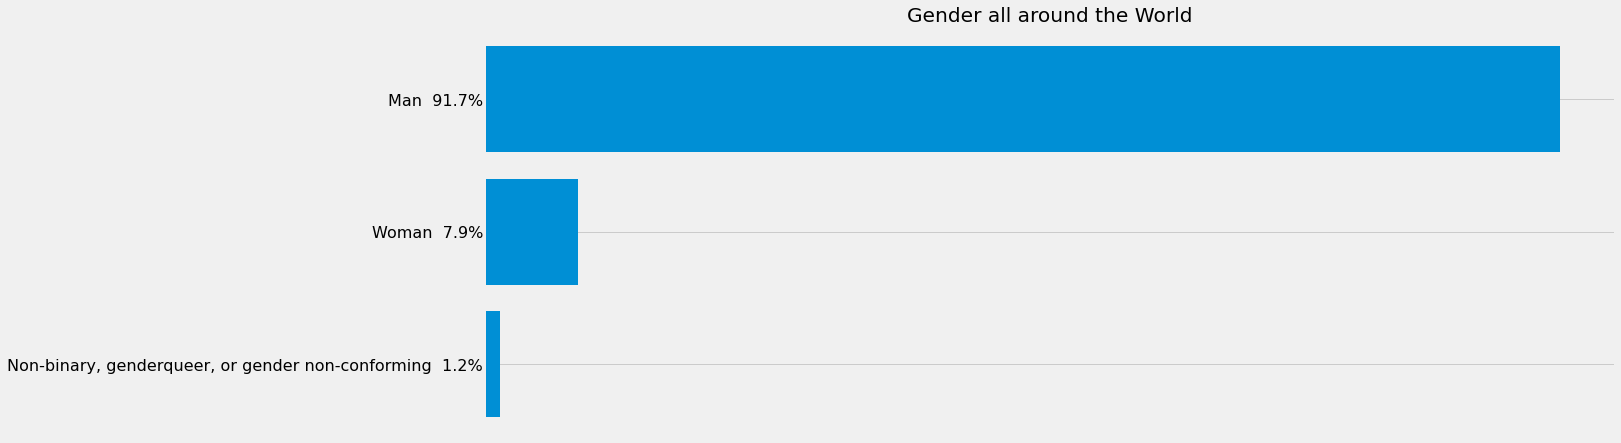

In [30]:
Gender = data["Gender"]   # Call data we need
Gender.dropna(inplace=True)  # filter and remove empty spaces


Gender = Gender.str.split(';')  ### split elements where ";" is written

list_sorter_counter(Gender)  ##### auto sort and count

##### building graph
Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (18,7), "Gender all around the World")   



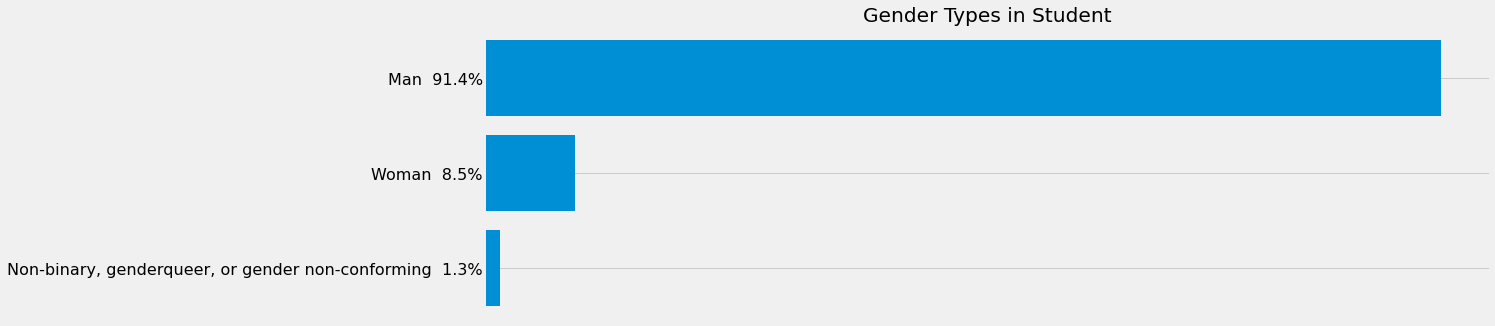

In [31]:
Gender_In_Students = data["Gender"]    # Call data we need
 
Gender_In_Students.dropna( inplace=True)  # filter and remove empty spaces

Gender =data[(Gender_In_Students!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  ### Gender that consist only students
New_Gender = Gender["Gender"]   ### keep our new data in new variable

New_Gender = New_Gender.str.split(';')  ### split elements where ";" is written


list_sorter_counter(New_Gender)   ##### auto sort and count

#### Building Graph
Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,5), "Gender Types in Student") 

<h5 style="text-align:center; " > <b>Experience and Gender

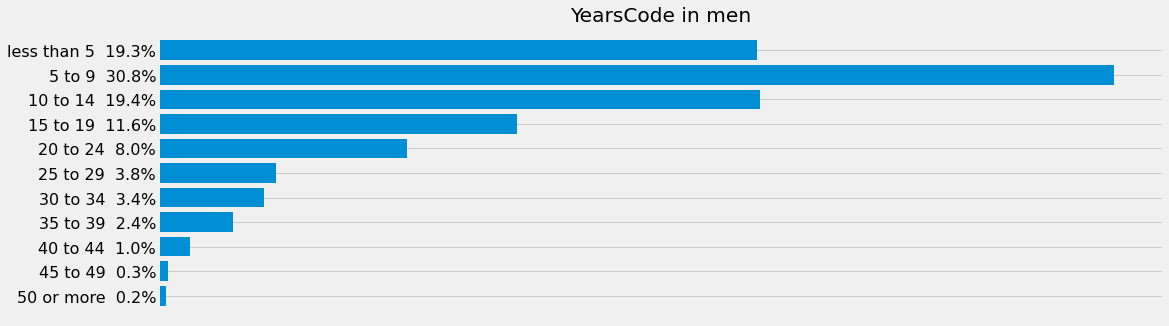

In [32]:

YearsCode = data["YearsCode"]   # Call data we need
YearsCode.dropna(inplace = True)   # filter and remove empty spaces


man  = data[ (YearsCode != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] #### YearsCode in man
new_man = man["YearsCode"]   ### keep our new data in new variable

######### distibuting data in different age groups  #####
year_5_to_50(new_man)
        
### building graph
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_man ,"fivethirtyeight", False , (16,5), "YearsCode in men") 

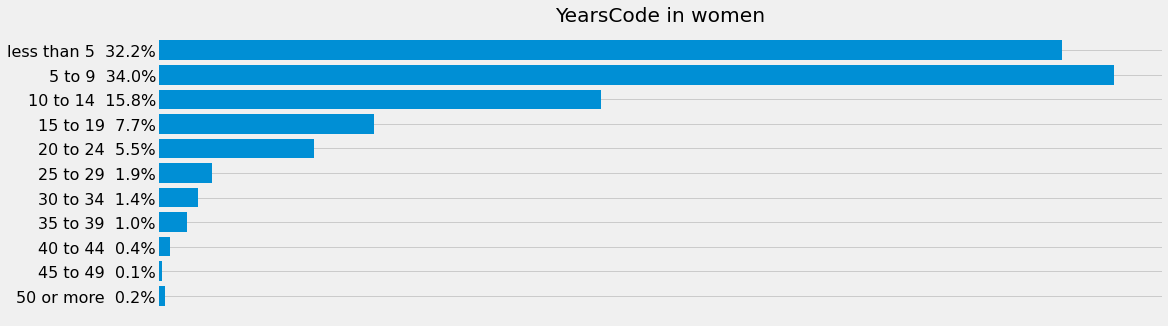

In [33]:
YearsCode = data["YearsCode"]  # Call data we need
YearsCode.dropna(inplace = True)   # filter and remove empty spaces


woman  = data[ (YearsCode != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming"))] #### YearsCode in women
new_woman = woman["YearsCode"]   ### keep our new data in new variable

######### distibuting data in different age groups #####
year_5_to_50(new_woman)
        


### building graph
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_woman ,"fivethirtyeight", False , (16,5), "YearsCode in women") 

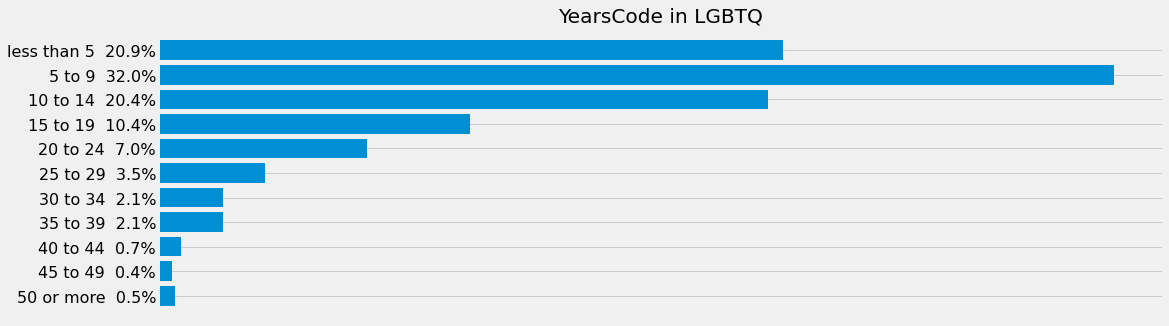

In [34]:
YearsCode = data["YearsCode"]  # Call data we need
YearsCode.dropna(inplace = True)   # filter and remove empty spaces


LGBTQ  = data[ (YearsCode != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] ##### YearsCode in LGBTQ
new_LGBTQ = LGBTQ["YearsCode"]

######### distibuting data in different age groups #####
year_5_to_50(new_LGBTQ)
        


#### building graph
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, new_LGBTQ ,"fivethirtyeight", False , (16,5), "YearsCode in LGBTQ") 



<h5 style="text-align:center; " > <b>Sexual Orientation


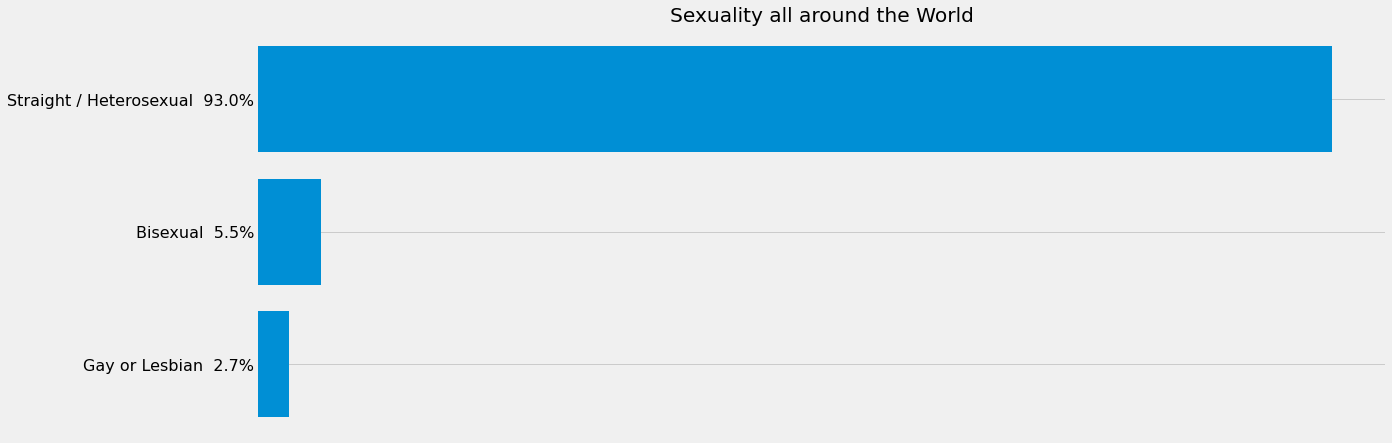

In [35]:
Sexuality = data["Sexuality"]  # Call data we need
Sexuality.dropna(inplace = True)   # filter and remove empty spaces

Sexuality = Sexuality.str.split(';')  ### split elements where ";" is written
list_sorter_counter(Sexuality)  ### auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (18,7), "Sexuality all around the World")   

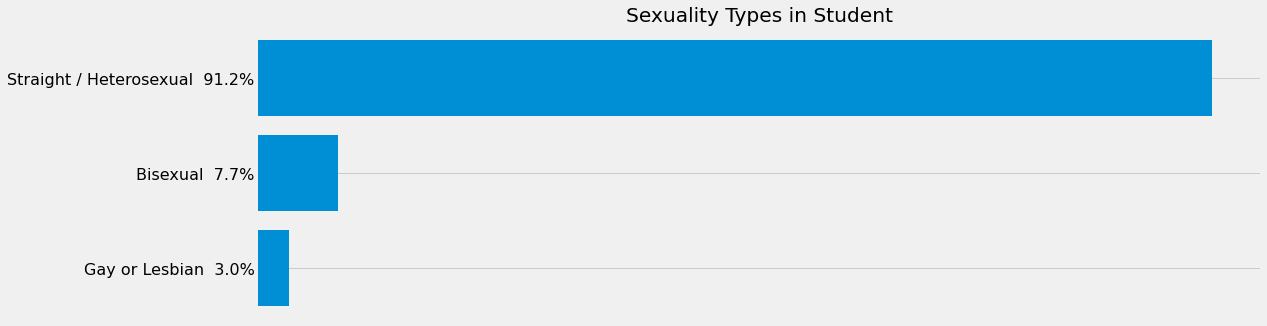

In [36]:
Sexuality_Filtered = data["Sexuality"]    # Call data we need
Sexuality_Filtered.dropna( inplace=True)  # filter and remove empty spaces

Sexuality =data[(Sexuality_Filtered!= "NaN") & ((data["Student"] == "Yes, full-time") | (data["Student"] == "Yes, part-time"))]  ### Sexuality in students
New_Sexuality = Sexuality["Sexuality"]  #### keep in a new variable 
New_Sexuality = New_Sexuality.str.split(';')  #### split elements where ";" is written


list_sorter_counter(New_Sexuality)   # auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Sexuality ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student")

<h5 style="text-align:center; " > <b>Age

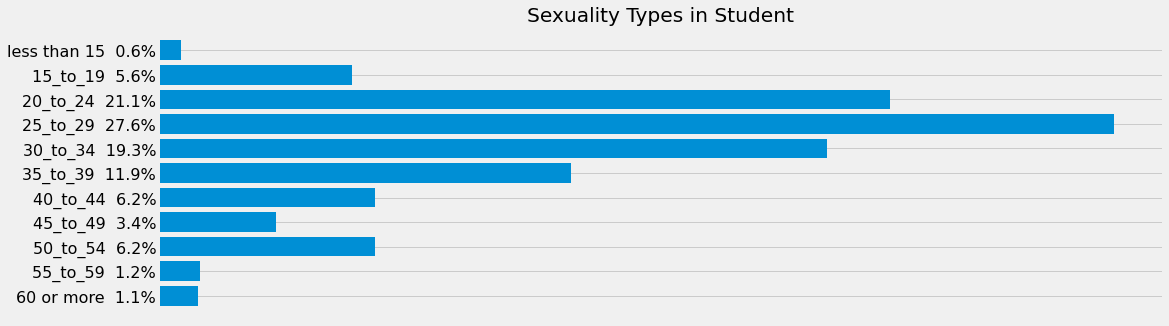

In [37]:
Age = data["Age"]  # Call data we need
Age.dropna(inplace = True) # filter and remove empty spaces

######### distibuting data in different age groups #####
year_15_to_60(Age) 

######### building graph
Build_Barh_sizes( Phrases_15_to_60 , quantity_15_to_60, Age ,"fivethirtyeight", False , (16,5), "Sexuality Types in Student") 

<h5 style="text-align:center; " > <b>Age and Experience by Country

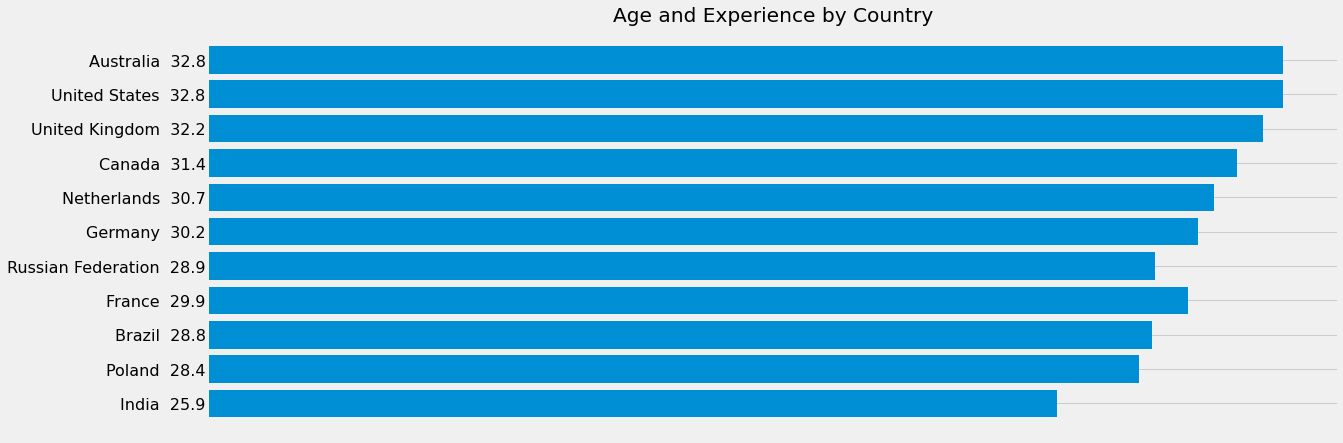

In [38]:
age = data["Age"]   # Call data we need
age.dropna(inplace = True)   # filter and remove empty spaces

##### Creating lists for countries
Countries = ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"] 

######## creating emty lists for key phrases and quantity #######
key_Phrases = []
Quantity = []

for i in Countries:
    age_by_countries = data[(age != "nan") & (data["Country"] == i)] #combining datas from  age and country from previous list. 
    Age_by_countries = np.array(age_by_countries ["Age"])  #transfers data in list
    Age_by_countries = list(map(int, Age_by_countries)) #changing variables from string to integers

    number_of_people = len(Age_by_countries)  #number of respodents
    all_ages = sum(Age_by_countries)           #sum all ages

    average_age =round(all_ages / number_of_people , 1)  #calculating average age

    key_Phrases.append(i)        #adding counties from previous list as key phrases
    Quantity.append(average_age) #adding average ages to quantity list

#building graph
Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Age and Experience by Country") 

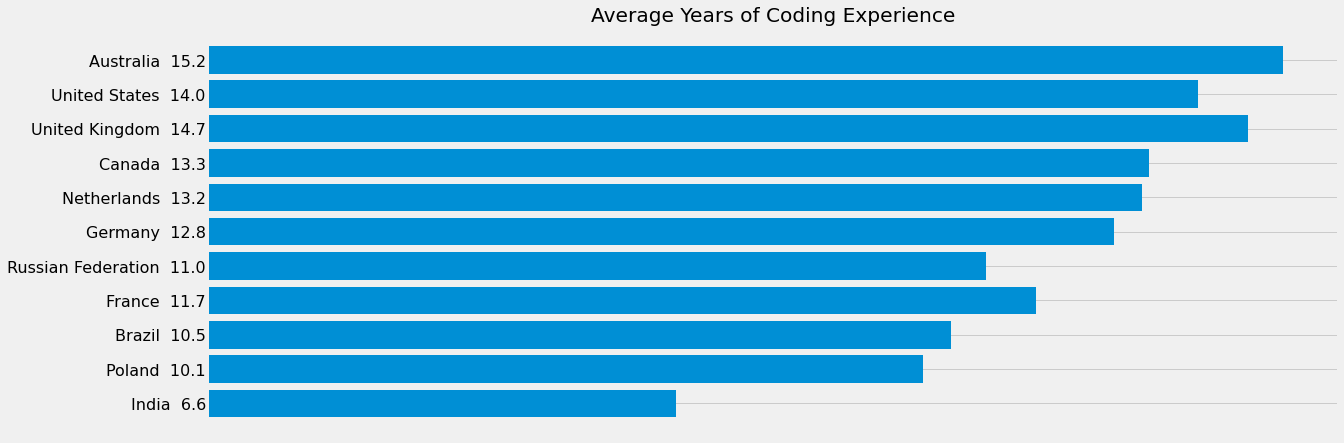

In [121]:
YearsCode = data["YearsCode"]       # We called necessary data
YearsCode=YearsCode.dropna()        # We filter the data from NaN and empty spaces 

Countries =  ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(YearsCode != "NaN") & (data["Country"] == i)] # Data by specific Gender  (from list)


    new_list = np.array(new_data["YearsCode"])    
    new_list = np.where(new_list == "Less than 1 year", 1, new_list)  # replace "Less than 1 year" with 1
    new_list = np.where(new_list == "More than 50 years", 50, new_list)   # replace "More than 50 years" with 50



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    


Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Average Years of Coding Experience")  # Building a schedule

#### Evaluating Competence

<h5 style="text-align:center; " > <b>All of the Developers Are Above Average?

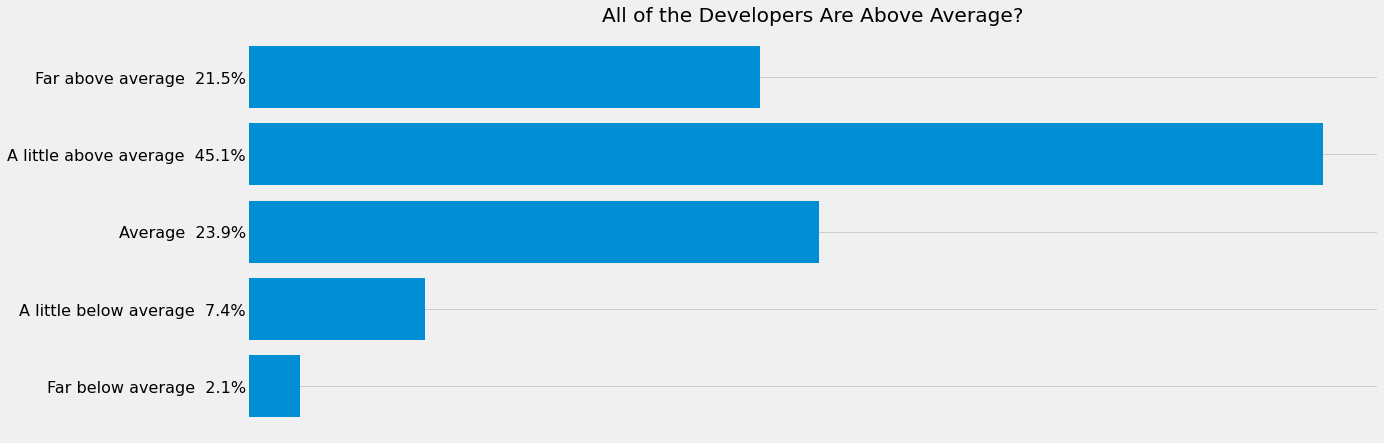

In [39]:
ImpSyn = data["ImpSyn"]   # Call data we need
ImpSyn.dropna(inplace = True)  # filter and remove empty spaces


####### count data
counted = Counter(ImpSyn) 

#### creating lists for key phrases
key_Phrases = ["Far above average", "A little above average", "Average", "A little below average", "Far below average"] 

#### creating empty list for quantity to add data
Quantity = [] 

#reversing key phrases and quantity 
key_Phrases.reverse()
Quantity.reverse()

########### adding data in quatity
for i in key_Phrases:
    Quantity.append(counted[i]) 

#### building graph
Build_Barh_sizes(key_Phrases, Quantity, ImpSyn, "fivethirtyeight", False , (18,7), "All of the Developers Are Above Average?")

<h5 style="text-align:center; " > <b>Feelings of Competence By Gender

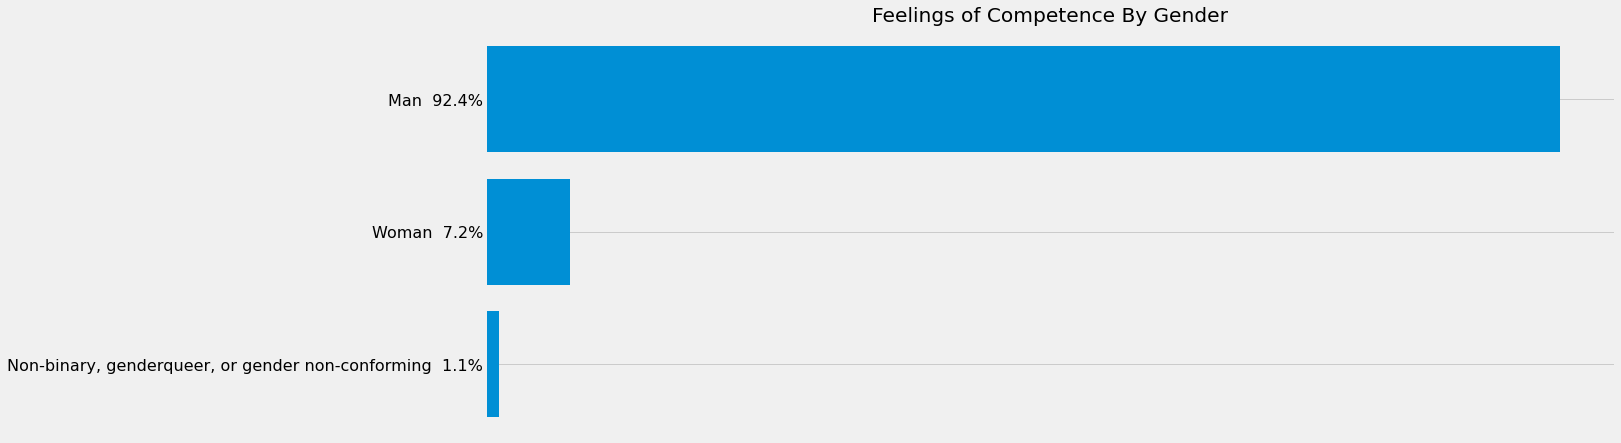

In [40]:
gender = data ["Gender"] # Call data we need
gender.dropna(inplace = True ) # filter and remove empty spaces

#combinig gender and competence data together
gender_competence  = data[(gender  != "NaN")  & ((data ["ImpSyn"] == "Far above average") | (data ["ImpSyn"] == "A little above average") | (data ["ImpSyn"] == "Average") )]
Gender_competence = gender_competence["Gender"] #save the combined data in new variable

Gender_competence = Gender_competence.str.split(";") #fracturing where ";"- s show up and write fractured data in lists

list_sorter_counter(Gender_competence) #### auto sort and count

##### building graph
Build_Barh_sizes(key_Phrases, Quantity, Gender_competence, "fivethirtyeight", False , (18,7), "Feelings of Competence By Gender") 

####  Life Outside Work

<h5 style="text-align:center; " > <b>Children and Other Dependents

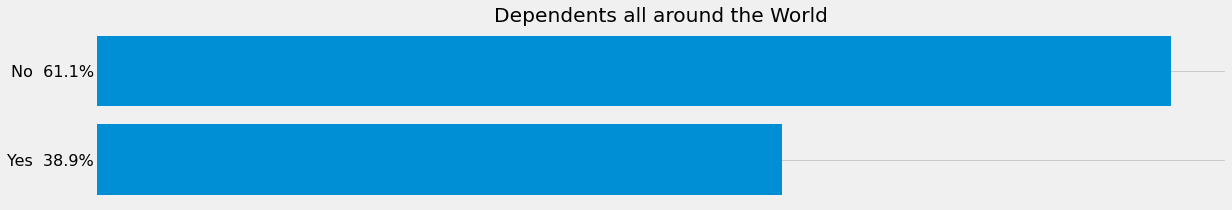

In [41]:
Dependents = data["Dependents"]   #### Call data we need
Dependents.dropna( inplace = True)  ### filter and remove empty spaces

Dictionary_Distributor(Dependents,False) #### Auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, Dependents ,"fivethirtyeight", False , (18,3), "Dependents all around the World")   



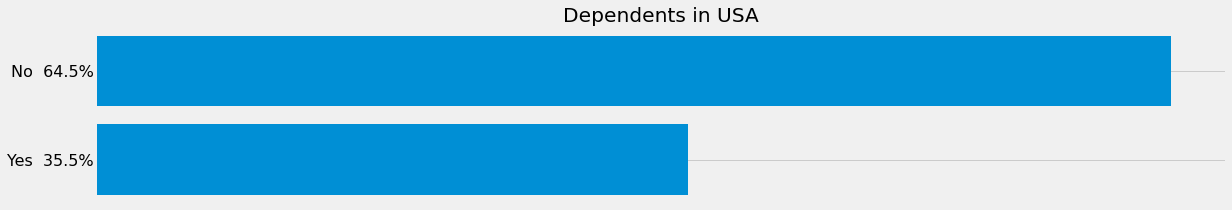

In [42]:
Dependents_USA = data["Dependents"]  #### Call data we need
Dependents_USA.dropna(inplace = True)  ### filter and remove empty spaces

Dependents = data[(Dependents_USA!= "NaN") & (data["Country"] == "United States")]   ### dependent in USA
New_Dependents= Dependents["Dependents"] #### keep in a new variable 

Dictionary_Distributor(New_Dependents,False) #### Auto sort and count

##### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Dependents ,"fivethirtyeight", False , (18,3), "Dependents in USA")  

<h5 style="text-align:center; " > <b>Families and IT Support

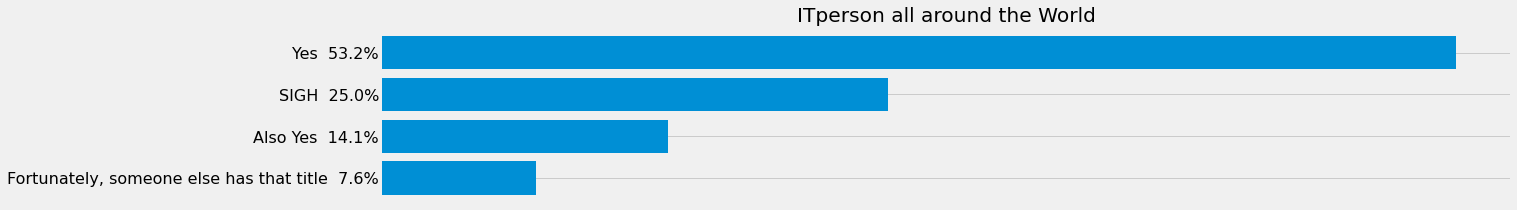

In [43]:
ITperson = data["ITperson"]  #### Call data we need
ITperson.dropna(inplace = True)   ### filter and remove empty spaces

Dictionary_Distributor(ITperson,False) #### Auto sort and count

#### Building Graph
Build_Barh_sizes( key_Phrases , Quantity, ITperson ,"fivethirtyeight", False , (18,3), "ITperson all around the World")   

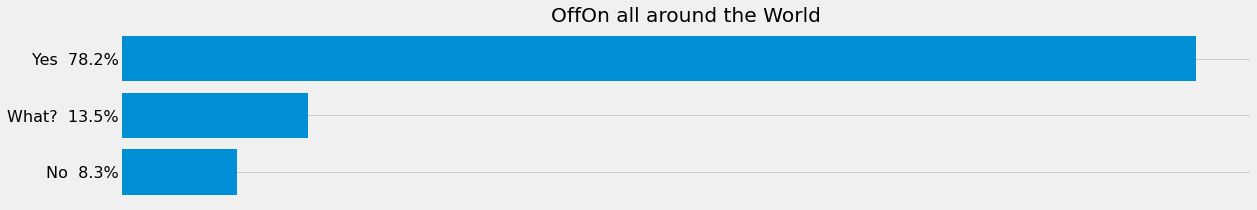

In [44]:
OffOn = data["OffOn"]   #### Call data we need
OffOn.dropna(inplace = True)  ### filter and remove empty spaces

Dictionary_Distributor(OffOn,False) #### Auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, OffOn ,"fivethirtyeight", False , (18,3), "OffOn all around the World")  

<h5 style="text-align:center; " > <b>Will People Born Today Have a Better Life Than Their Parents?

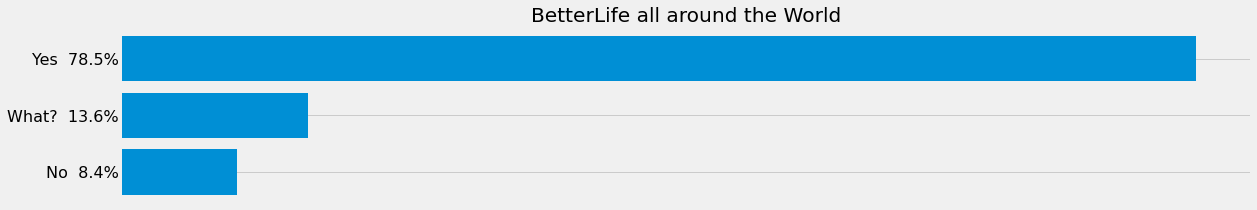

In [45]:
BetterLife = data["BetterLife"]   #### Call data we need
BetterLife.dropna(inplace = True)   ### filter and remove empty spaces

Dictionary_Distributor(OffOn,False) #### Auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, BetterLife ,"fivethirtyeight", False , (18,3), "BetterLife all around the World")   


<h5 style="text-align:center; " > <b>Social Media Use

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37239 (\N{CJK UNIFIED IDEOGRAPH-9177}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28010 (\N{CJK UNIFIED IDEOGRAPH-6D6A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\c

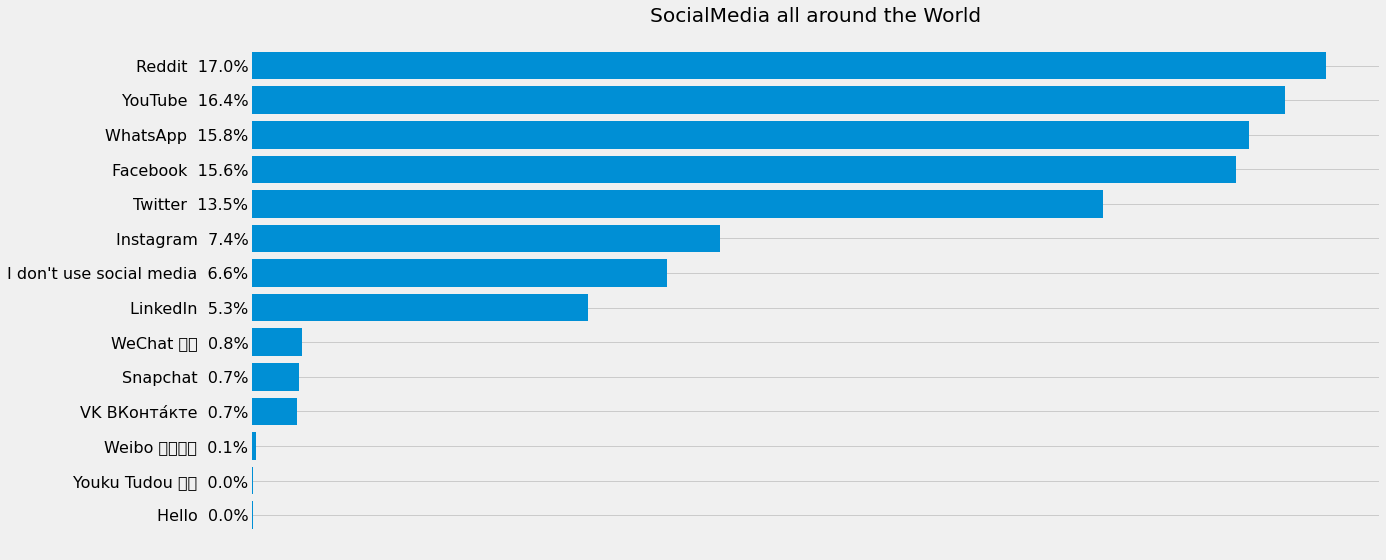

In [46]:
SocialMedia = data["SocialMedia"]  #### Call data we need
SocialMedia.dropna(inplace = True)  ### filter and remove empty spaces


########### changing elements in dictionary ###############
counted["Youku Tudou"] = counted["Youku Tudou 优酷"] 
del counted["Youku Tudou 优酷"]

counted["WeChat"] = counted["WeChat 微信"] 
del counted["WeChat 微信"]

counted["Weibo"] = counted["Weibo 新浪微博"] 
del counted["Weibo 新浪微博"]

Dictionary_Distributor(SocialMedia,False) #### Auto sort and count


###### building graph
Build_Barh_sizes( key_Phrases , Quantity, SocialMedia ,"fivethirtyeight", False , (18,9), "SocialMedia all around the World")   

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37239 (\N{CJK UNIFIED IDEOGRAPH-9177}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 28010 (\N{CJK UNIFIED IDEOGRAPH-6D6A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\c

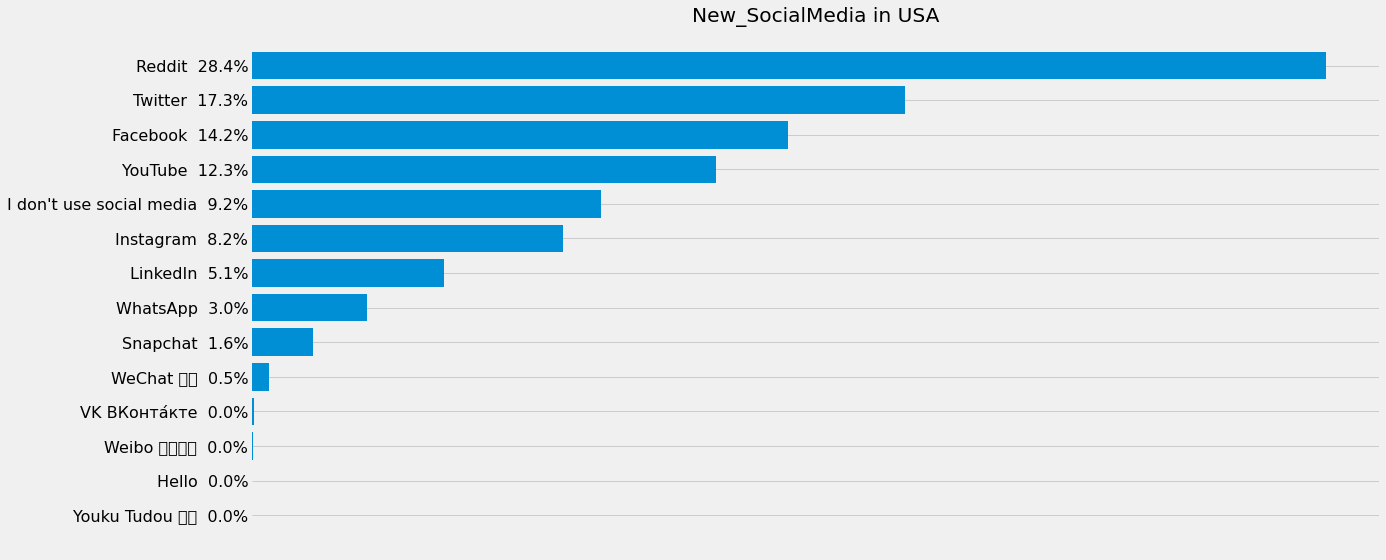

In [47]:
SocialMedia_USA = data["SocialMedia"]  #### Call data we need
SocialMedia_USA.dropna(inplace = True)  ### filter and remove empty spaces

SocialMedia = data[(SocialMedia_USA!= "NaN") & (data["Country"] == "United States")]  ##### Socialmedia in USA
New_SocialMedia= SocialMedia["SocialMedia"]


########### ვცვლით დიქშენერის ელემენტებს ###############
counted["Youku Tudou"] = counted["Youku Tudou 优酷"] 
del counted["Youku Tudou 优酷"]

counted["WeChat"] = counted["WeChat 微信"] 
del counted["WeChat 微信"]

counted["Weibo"] = counted["Weibo 新浪微博"] 
del counted["Weibo 新浪微博"]


Dictionary_Distributor(New_SocialMedia,False) #### Auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_SocialMedia ,"fivethirtyeight", False , (18,9), "New_SocialMedia in USA")   

<h5 style="text-align:center; " > <b>What's Your Handle?

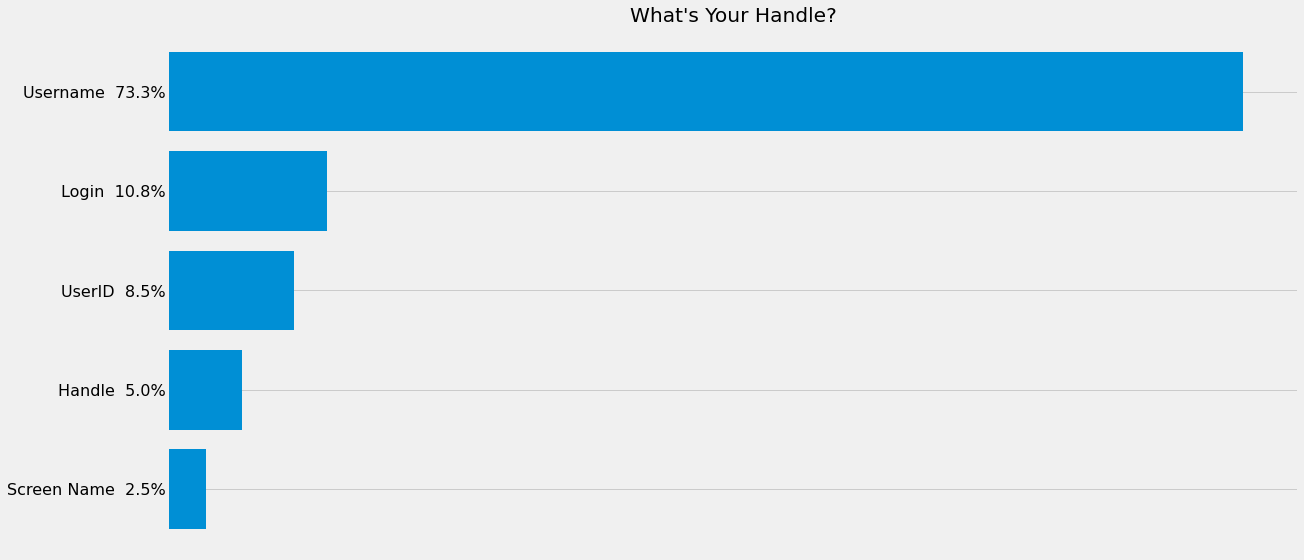

In [122]:
ScreenName = data[ "ScreenName"]  #### Call data we need
ScreenName.dropna(inplace = True)  ### filter and remove empty spaces

Dictionary_Distributor(ScreenName,False) #### Auto sort and count

######### buinding graph
Build_Barh_sizes( key_Phrases , Quantity, ScreenName ,"fivethirtyeight", False , (18,9), "What's Your Handle?")   

<h5 style="text-align:center; " > <b>IRL or online chat?

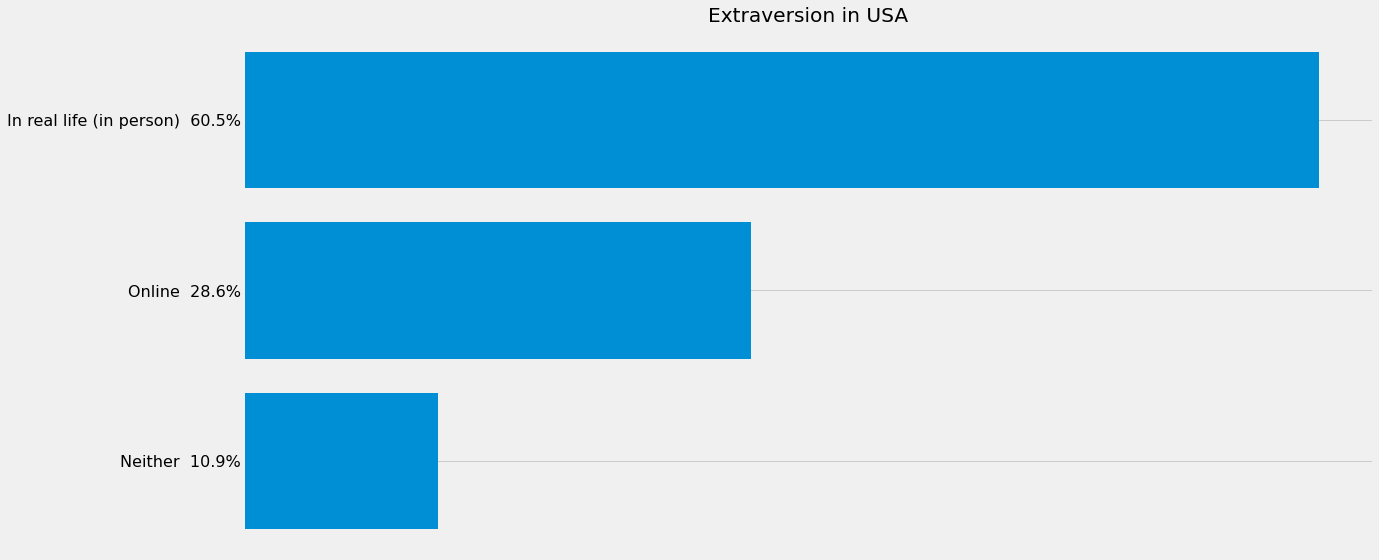

In [49]:
Extraversion = data["Extraversion"]  #### Call data we need
Extraversion.dropna(inplace = True)  ### filter and remove empty spaces

Dictionary_Distributor(Extraversion,False) #### Auto sort and count

######## building graph
Build_Barh_sizes( key_Phrases , Quantity, Extraversion ,"fivethirtyeight", False , (18,9), "Extraversion in USA")   

## Technology

#### Most Popular Technologies

<h5 style="text-align:center; " > <b>Programming, Scripting, and Markup Languages

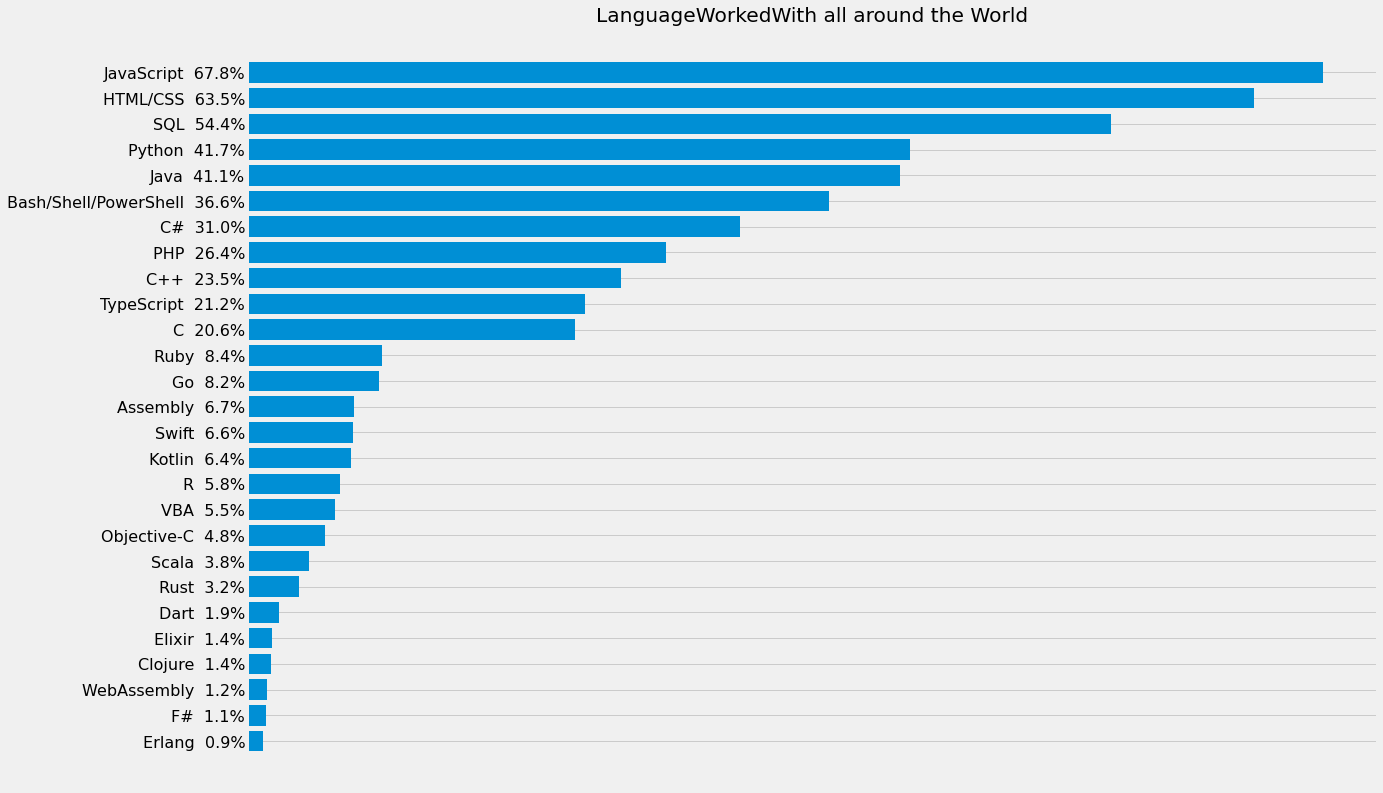

In [50]:
LanguageWorkedWith = data ["LanguageWorkedWith"]   #### Call data we need
LanguageWorkedWith.dropna(inplace = True)  ### filter and remove empty spaces


#### creating new empty list to add elements without other's ########
LanguageWorkedWith_no_others = []  


#### adding in lists those elements, where is not other (alone) ######
for i in LanguageWorkedWith:
    if i == "Other(s):":
        a=6
    else:
        LanguageWorkedWith_no_others.append(i.split(";"))

union = [] ###### creating second filtered list without any (inside and outside list) other's ####

#### adding in lists those elements, where is not other (with other answers) ######  complitely filtered from others
for i in LanguageWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


Dictionary_Distributor(union,False) #### Auto sort and count

##### building graph
Build_Barh_sizes( key_Phrases , Quantity, LanguageWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "LanguageWorkedWith all around the World")   


<h5 style="text-align:center; " > <b>Web Frameworks

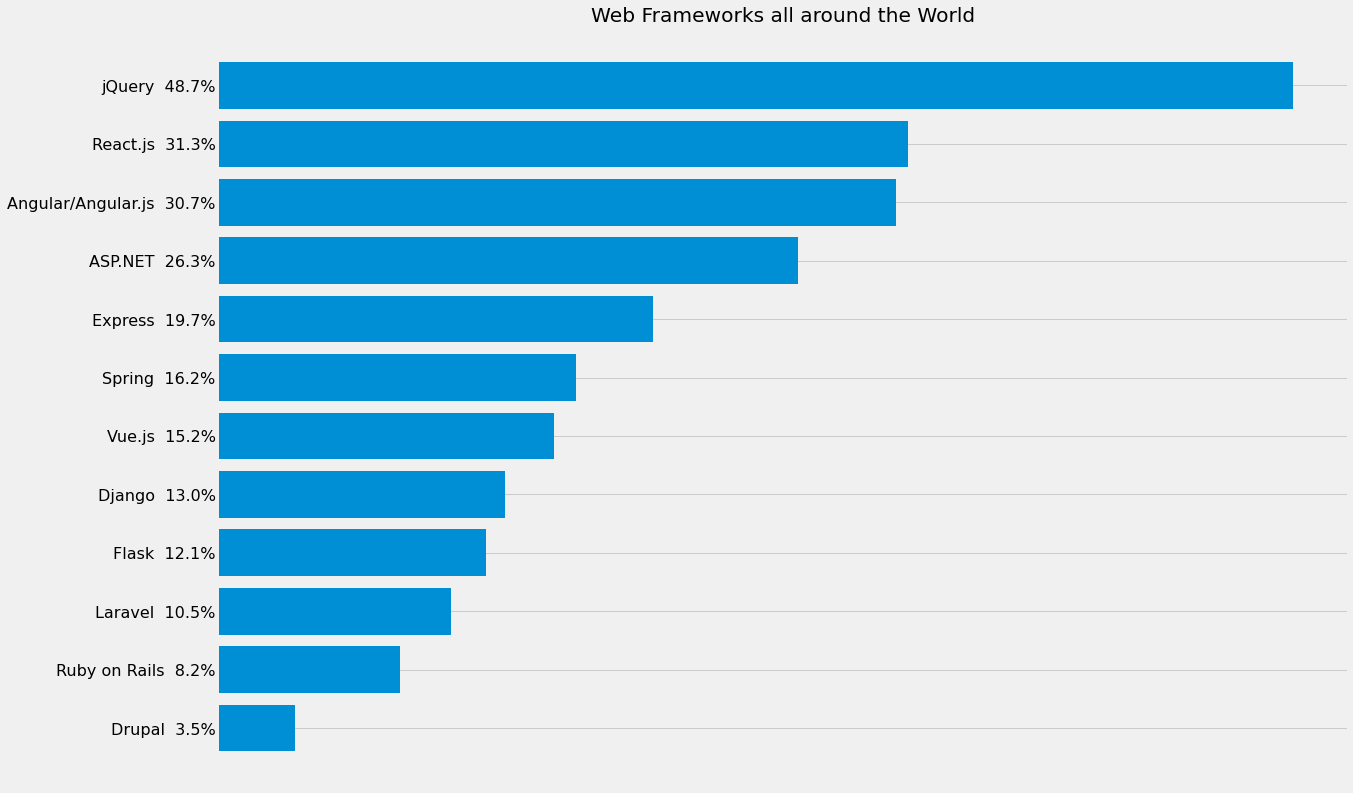

In [51]:
WebFrameWorkedWith = data ["WebFrameWorkedWith"]   #### Call data we need
WebFrameWorkedWith.dropna(inplace = True)   ### filter and remove empty spaces

### creating new empty list to add elements without other's ########
WebFrameWorkedWith_no_others = []   

#### adding in lists those elements, where is not other (alone) ######
for i in WebFrameWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       WebFrameWorkedWith_no_others.append(i.split(";"))

union = []     ###### creating second filtered list without any (inside and outside list) other's ####


#### adding in lists those elements, where is not other (with other answers) ###### Complitely filtered from others
for i in WebFrameWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


Dictionary_Distributor(union,False) #### Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, WebFrameWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   # ვაგებთ გრაფიკს


<h5 style="text-align:center; " > <b>Other Frameworks, Libraries, and Tools

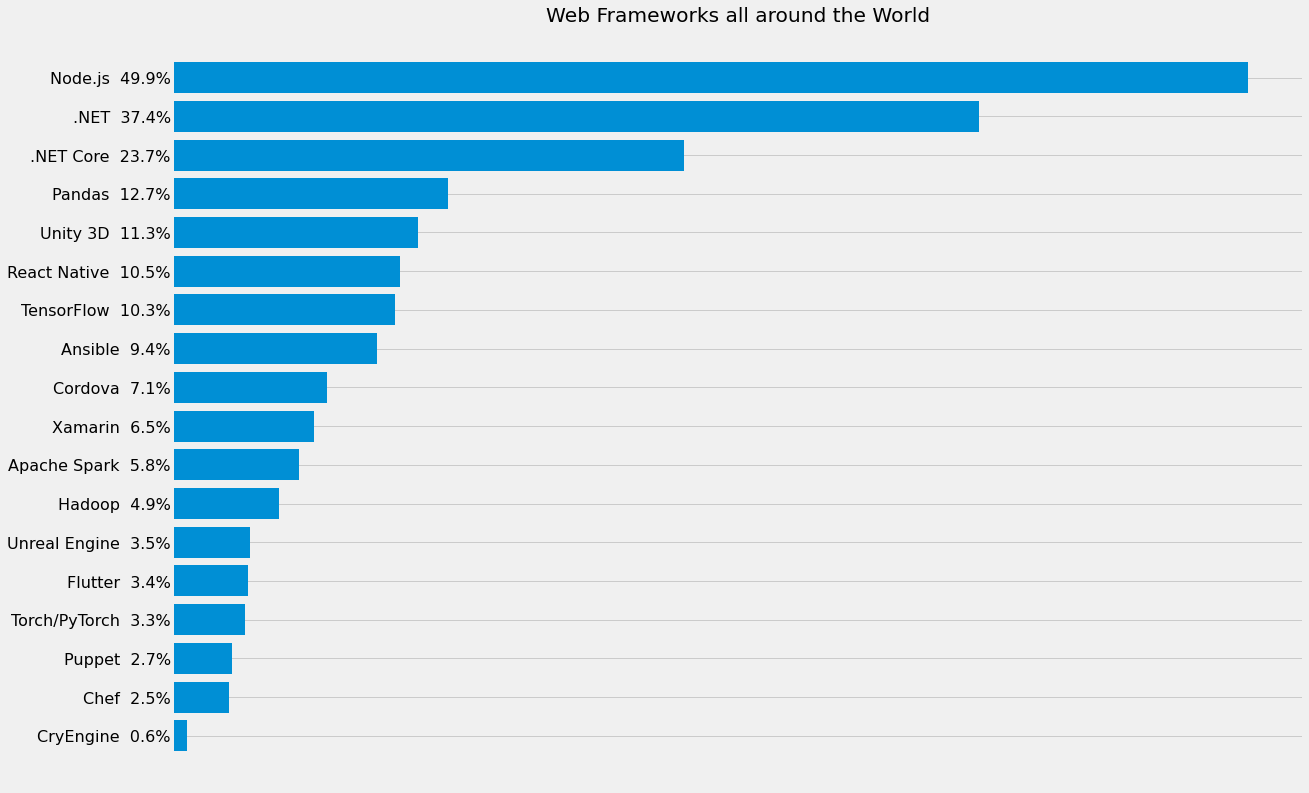

In [52]:
MiscTechWorkedWith = data ["MiscTechWorkedWith"]  #### Call data we need
MiscTechWorkedWith.dropna(inplace = True)   ### filter and remove empty spaces

### creating new empty list to add elements without other's ########
MiscTechWorkedWith_no_others = []   


#### adding in lists those elements, where is not other (alone) ######
for i in MiscTechWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       MiscTechWorkedWith_no_others.append(i.split(";"))

union = []     ###### creating second filtered list without any (inside and outside list) other's ####

#### adding in lists those elements, where is not other (with other answers) ###### Complitely filtered from others
for i in MiscTechWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


Dictionary_Distributor(union,False) #### Auto sort and count

#### BUilding graph
Build_Barh_sizes( key_Phrases , Quantity, MiscTechWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Web Frameworks all around the World")   


<h5 style="text-align:center; " > <b>Databases

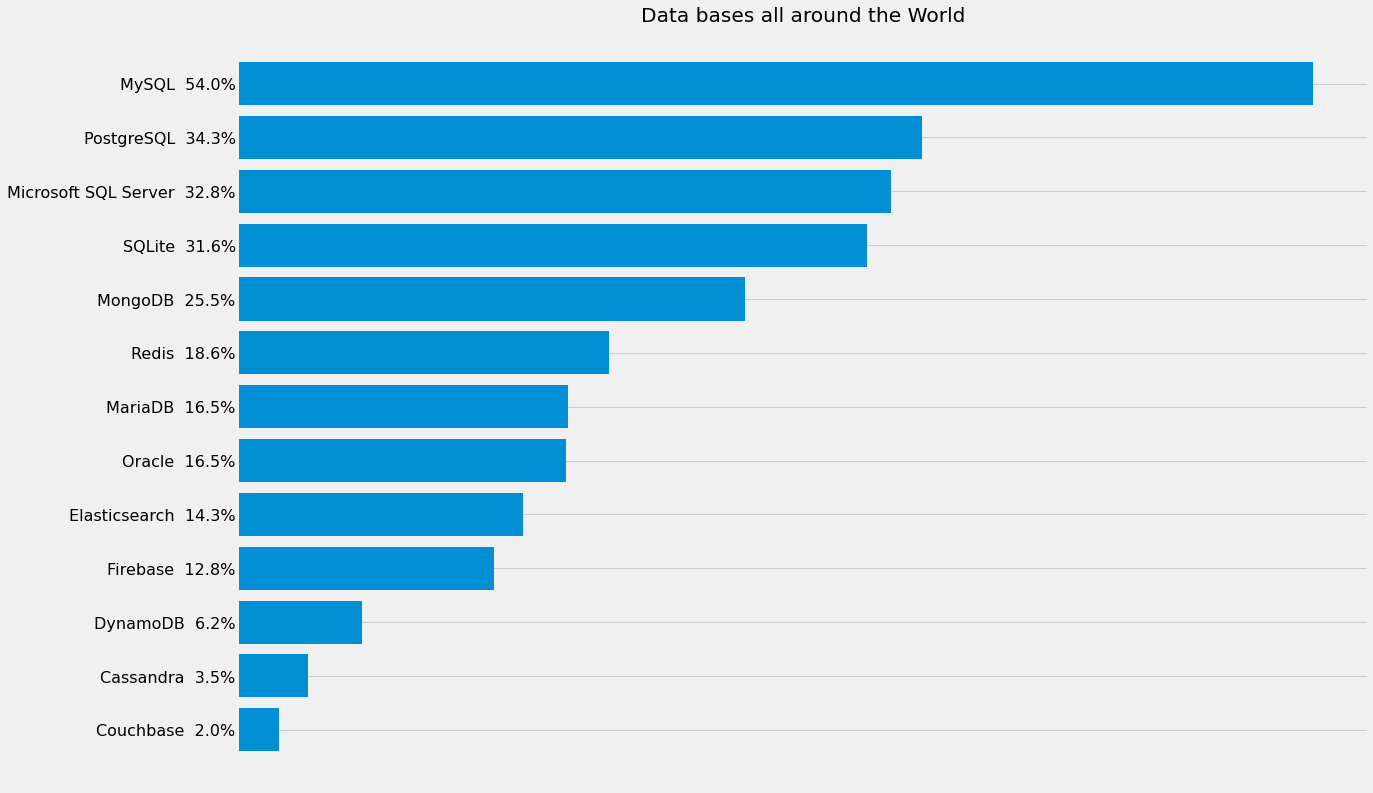

In [53]:
DatabaseWorkedWith = data ["DatabaseWorkedWith"]    #### Call data we need
DatabaseWorkedWith.dropna(inplace = True)   ### filter and remove empty spaces

### creating new empty list to add elements without other's ########
DatabaseWorkedWith_no_others = []  


#### adding in lists those elements, where is not other (alone) ######
for i in DatabaseWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       DatabaseWorkedWith_no_others.append(i.split(";"))

union = []     ###### creating second filtered list without any (inside and outside list) other's ####

#### adding in lists those elements, where is not other (with other answers) ###### Complitely filtered from others
for i in DatabaseWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)


Dictionary_Distributor(union,False) #### Auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, DatabaseWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "Data bases all around the World")   


<h5 style="text-align:center; " > <b>Platforms

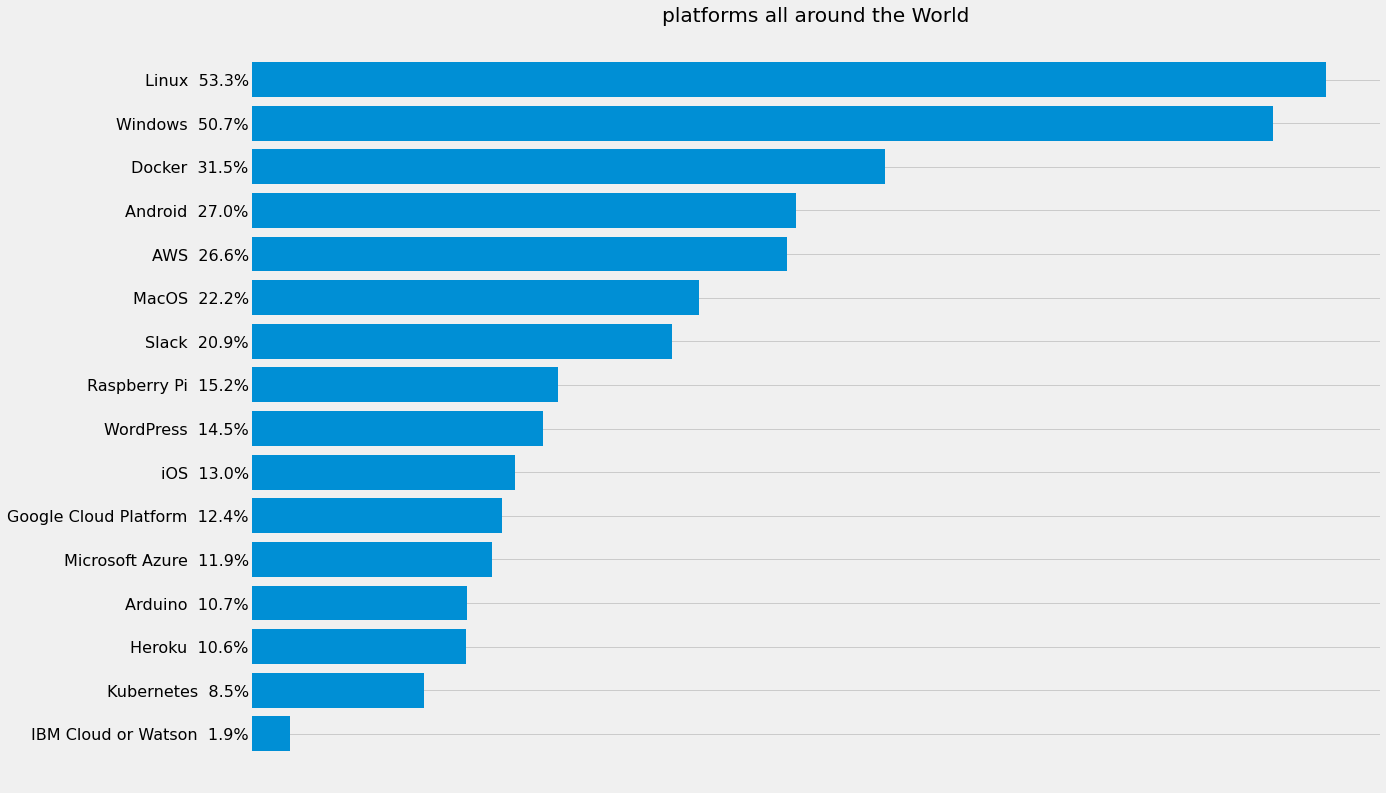

In [123]:
PlatformWorkedWith = data["PlatformWorkedWith"]   #### Call data we need
PlatformWorkedWith.dropna(inplace = True)   ### filter and remove empty spaces

##creating new empty list to add elements without other's ########
PlatformWorkedWith_no_others = []   

#### adding in lists those elements, where is not other (alone) ######
for i in PlatformWorkedWith:
    if i == "Other(s):":
        a=6
    else:
       PlatformWorkedWith_no_others.append(i.split(";"))

union = []     ###### creating second filtered list without any (inside and outside list) other's ####

#### adding in lists those elements, where is not other (with other answers) ###### Complitely filtered from others
for i in PlatformWorkedWith_no_others:
    for k in i:
        if k != "Other(s):":
           union.append(k)



Dictionary_Distributor(union,False) #### Auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, PlatformWorkedWith_no_others ,"fivethirtyeight", False , (18,13), "platforms all around the World")  


####  Development Environments and Tools

<h5 style="text-align:center; " > <b> Most Popular Development Environments

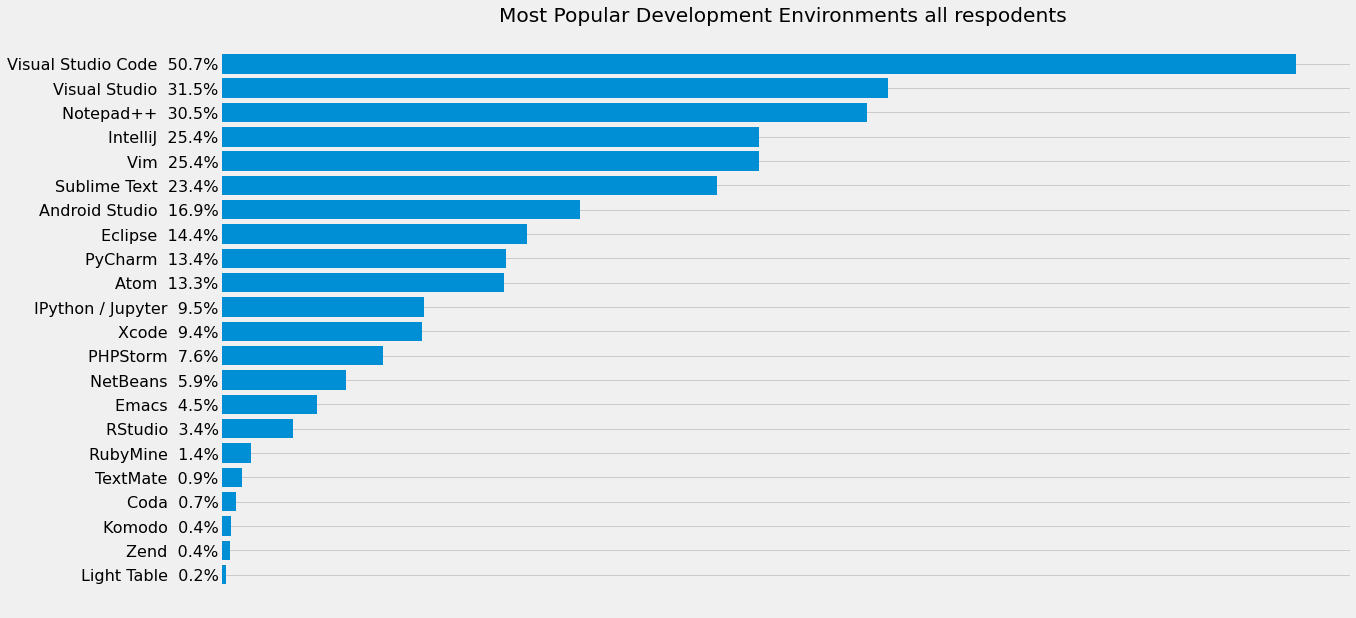

In [55]:
DevEnviron = data["DevEnviron"]  #### Call data we need
DevEnviron.dropna(inplace = True) ### filter and remove empty spaces

DevEnviron = DevEnviron.str.split(";")  ### split elements, where ";" is written

list_sorter_counter(DevEnviron) #auto sort and count

######### building graph
Build_Barh_sizes(key_Phrases, Quantity, DevEnviron, "fivethirtyeight", False , (18,10), "Most Popular Development Environments all respodents ")

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


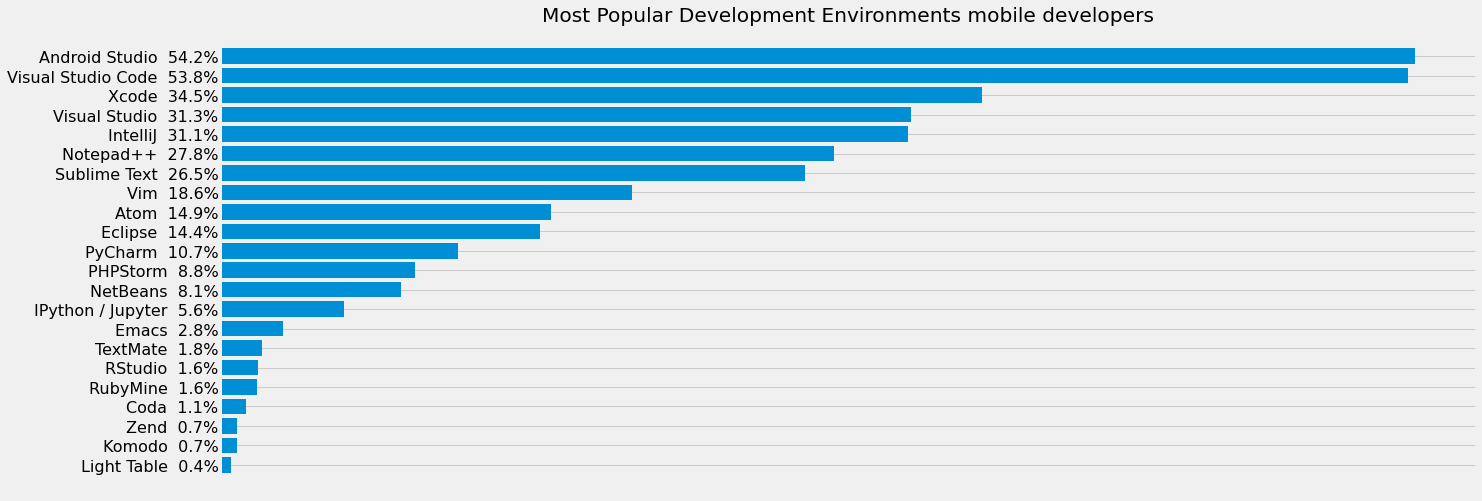

In [56]:
DevType = data["DevType"]    #### Call data we need
DevType.dropna(inplace = True) #### filter and remove empty spaces

#for saving sentences where is shown the word "mobile" to find mobile developers
new_list = []

#finding sentences with "mobile" in it and adding new_list
for i in DevType:
    if "mobile" in i:
       new_list.append(i)

counted = Counter(new_list) #writing in dictionary and counting to avoid repeating 

#rewriting dictionary into list where there are 1 sentence with the word "mobile" in it
key_list = list(counted)


dev_environment = data["DevEnviron"] #calling data fom developer environment


all_ifo = [] #list where the combined data will be added

#preparing data to add to all_info
for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ] #combining data from developer environment and devtype (devtype data should match key_list items)

    new_DevEnviron = new_data['DevEnviron'] #save the combined data in new variable 
    new_DevEnviron.dropna(inplace = True) #filtering the data from empty and unnecessary answers
    
    #adding data to all_info
    for i in new_DevEnviron:
        all_ifo.append(i.split(";")) #adding data to all_info and fracturing at (;)-s




list_sorter_counter(all_ifo) #autos sort and count

######## building graph
Build_Barh_sizes( key_Phrases , Quantity, all_ifo ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments mobile developers")

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


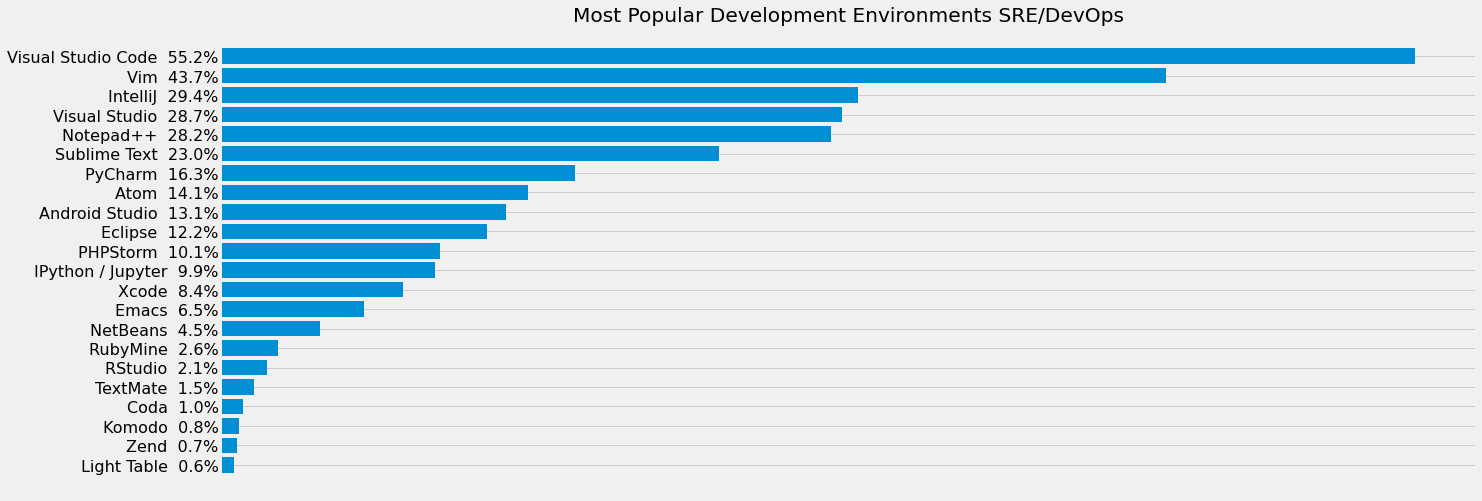

In [57]:
DevType = data["DevType"]     #### Call data we need
DevType.dropna(inplace = True) ##### filter and remove empty spaces


#for saving sentences where is shown the word "SRE" or "DevOps" (to find matching)
list_with_SRE_and_Devops = []

#finding sentences with "SRE" or "DevOps" in it and adding list_with_SRE_and_Devops
for i in DevType:
    if "site reliability" in i or "DevOps" in i:
       list_with_SRE_and_Devops.append(i)


counted = Counter(list_with_SRE_and_Devops) #writing in dictionary and counting to avoid repeating 

#rewriting dictionary into list where there are 1 sentence with the word "DRE" or "DevOps" in it
key_list = list(counted)




dev_environment = data["DevEnviron"] #calling data fom developer environment

#list where the combined data will be added
devtype_with_enironment = []

#preparing data to add to all_info
for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ] #combining data from developer environment and devtype (devtype data should match key_list items)

    new_DevEnviron = new_data['DevEnviron'] #save the combined data in new variable

    new_DevEnviron.dropna(inplace = True)  #filtering the data from empty and unnecessary answers

    #adding data to all_info
    for i in new_DevEnviron:
        devtype_with_enironment.append(i.split(";")) #adding data to all_info and fracturing at (;)-s




list_sorter_counter(devtype_with_enironment) #auto sort and count
###### Building graph
Build_Barh_sizes( key_Phrases , Quantity, devtype_with_enironment ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments SRE/DevOps") 

<h5 style="text-align:center; " > <b>Developers' Primary Operating Systems

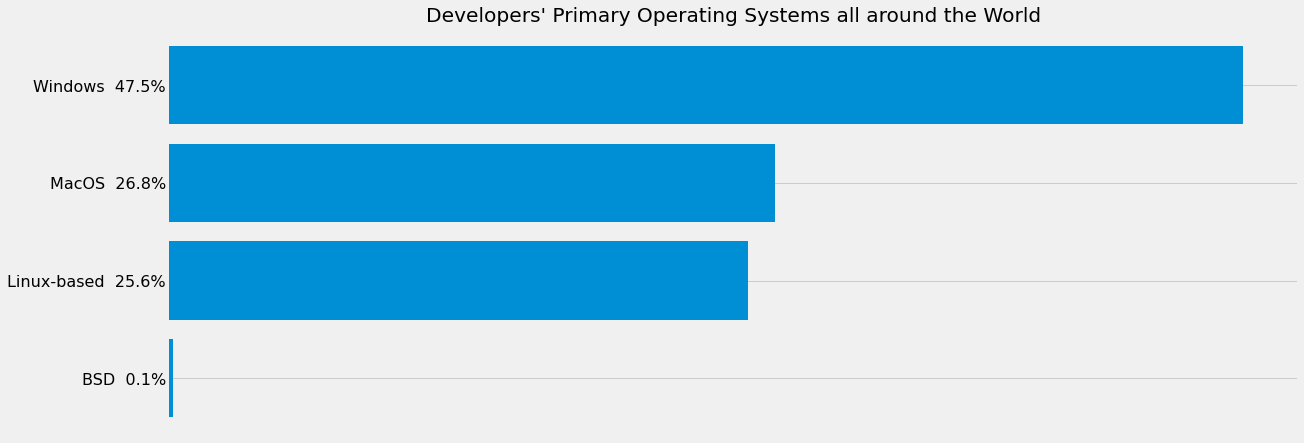

In [58]:
OpSys = data ["OpSys"]  #### Call data we need
OpSys.dropna(inplace = True)   ##### filter and remove empty spaces


Dictionary_Distributor(OpSys, False) ##### auto sort and count

########## Building graph
Build_Barh_sizes( key_Phrases , Quantity, OpSys ,"fivethirtyeight", False , (18,7), "Developers' Primary Operating Systems all around the World")   


<h5 style="text-align:center; " > <b>Using Containers

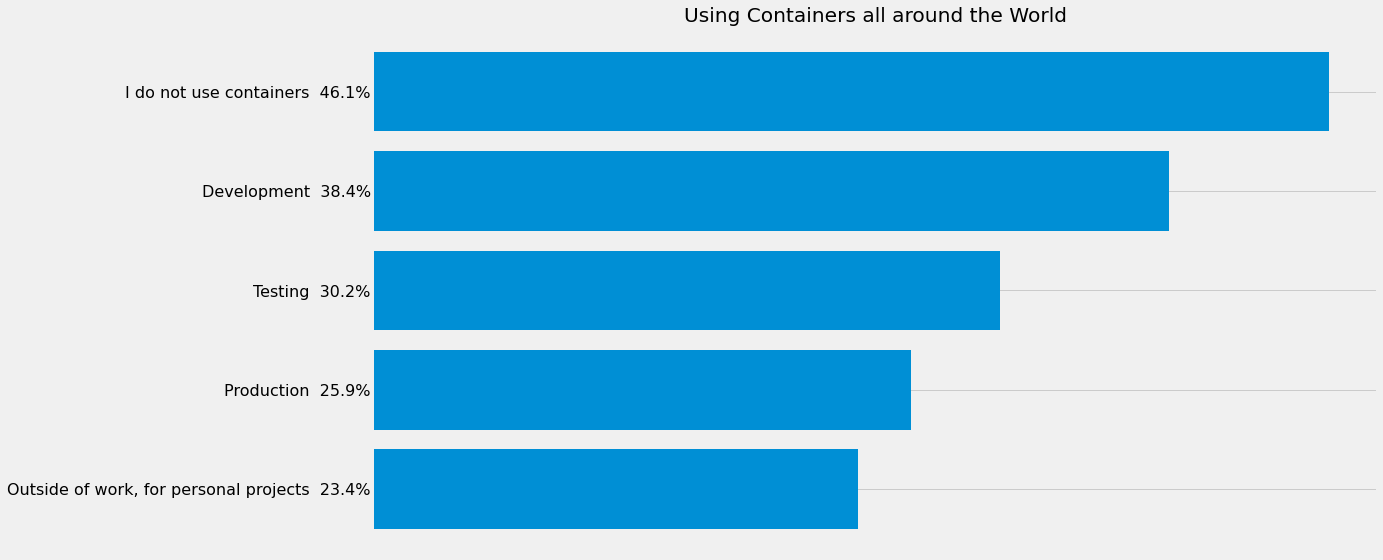

In [59]:
Containers = data["Containers"] #### Call data we need
Containers.dropna(inplace = True)  ##### filter and remove empty spaces
Containers = Containers.str.split(';')   ### split elements, where ";" is written


list_sorter_counter(Containers)  ##### auto sort and count

######## building graph
Build_Barh_sizes( key_Phrases , Quantity, Containers ,"fivethirtyeight", False , (16,9), "Using Containers all around the World") 



#### Blockchain in the Real World

<h5 style="text-align:center; " > <b>How Are Organizations Using Blockchain Technology?

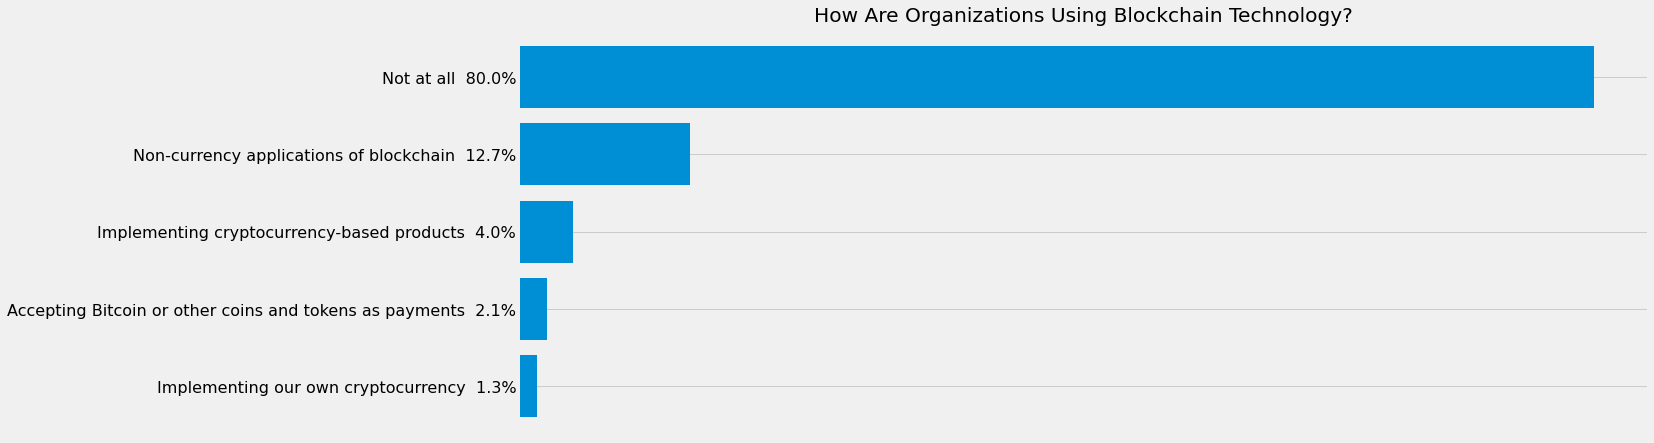

In [60]:
BlockchainOrg = data["BlockchainOrg"]  #### Call data we need
BlockchainOrg.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(BlockchainOrg, False) ##### auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, BlockchainOrg ,"fivethirtyeight", False , (18,7), "How Are Organizations Using Blockchain Technology?")  



<h5 style="text-align:center; " > <b>Developer Opinions on Blockchain Technology

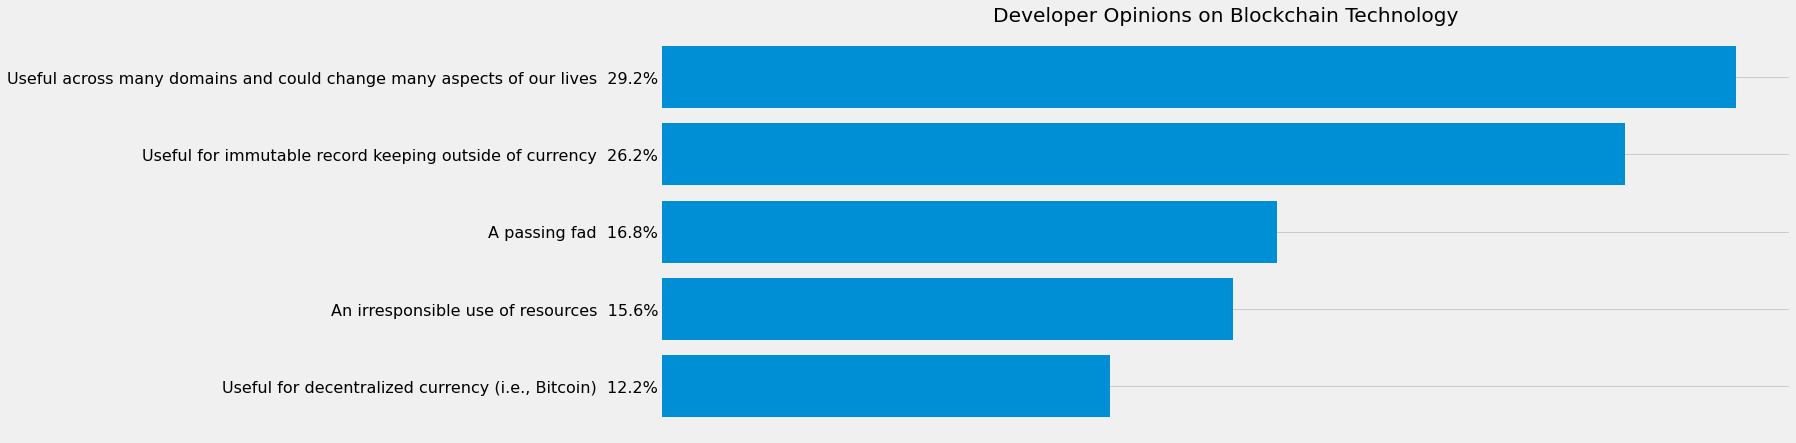

In [61]:
BlockchainIs = data["BlockchainIs"]  #### Call data we need
BlockchainIs.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(BlockchainIs, False) ##### auto sort and count

######## building graph
Build_Barh_sizes( key_Phrases , Quantity, BlockchainIs ,"fivethirtyeight", False , (18,7), "Developer Opinions on Blockchain Technology")   


## Work

#### Employment

<h5 style="text-align:center; " > <b>Employment Status

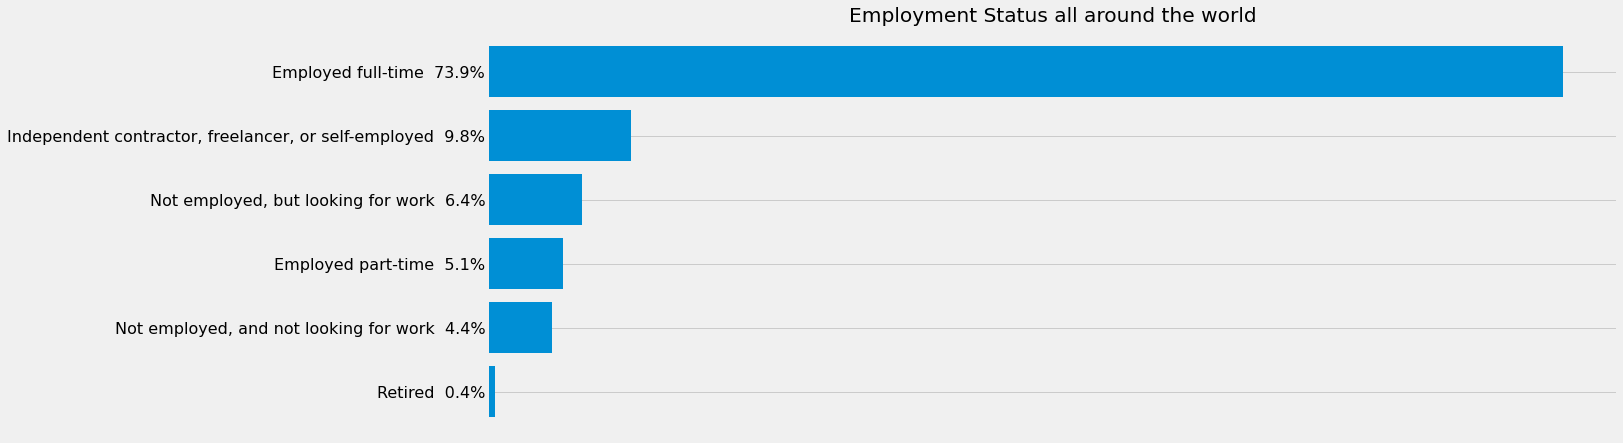

In [62]:
Employment = data["Employment"]   #### Call data we need
Employment.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(Employment, False) ##### auto sort and count


######### building graph
Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (18,7), "Employment Status all around the world")  


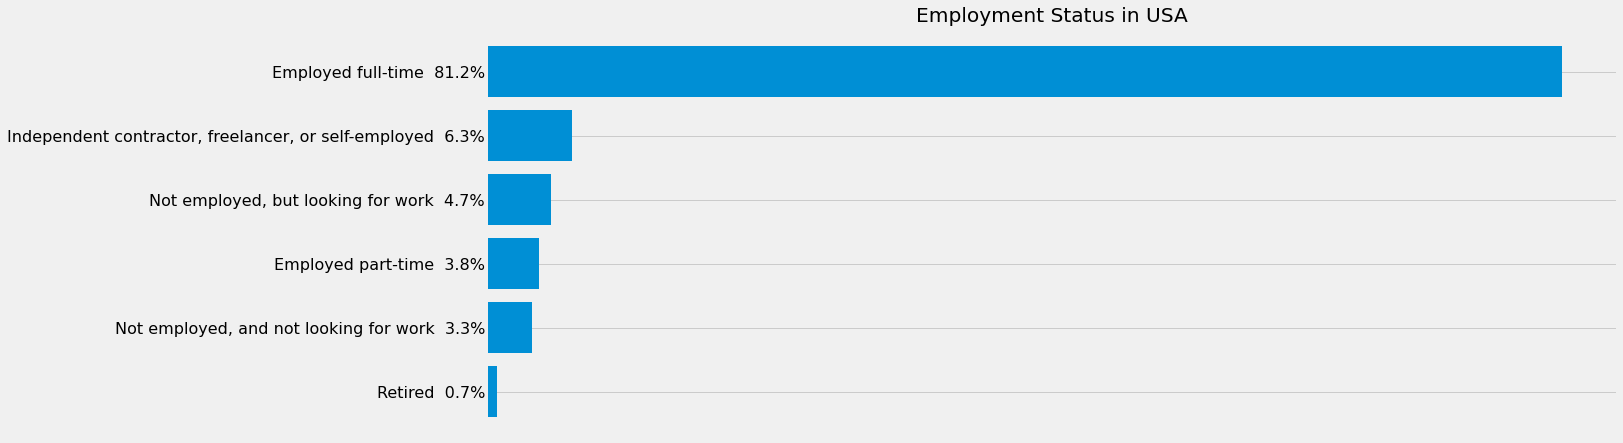

In [63]:
Employment_USA = data["Employment"] #### Call data we need
Employment_USA.dropna(inplace = True)   ##### filter and remove empty spaces

Employment = data[(Employment_USA!= "NaN") & (data["Country"] == "United States")]  ###### employment in USA
New_Employment = Employment["Employment"] ######## keep in a new variable 

Dictionary_Distributor(New_Employment, False) ##### auto sort and count


Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in USA")   # ვაგებთ გრაფიკს


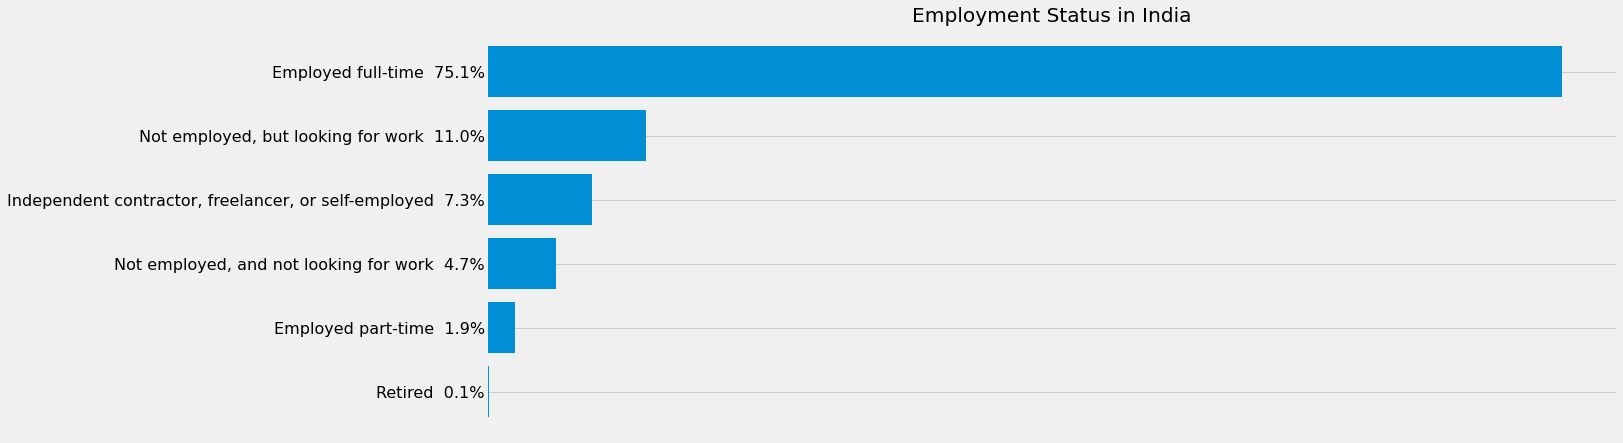

In [64]:
Employment_India = data["Employment"] #### Call data we need
Employment_India.dropna(inplace = True)    ##### filter and remove empty spaces

Employment = data[(Employment_India!= "NaN") & (data["Country"] == "India")]  ###### employment in India
New_Employment = Employment["Employment"]  ######## keep in a new variable 

Dictionary_Distributor(New_Employment, False) ##### auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in India")  


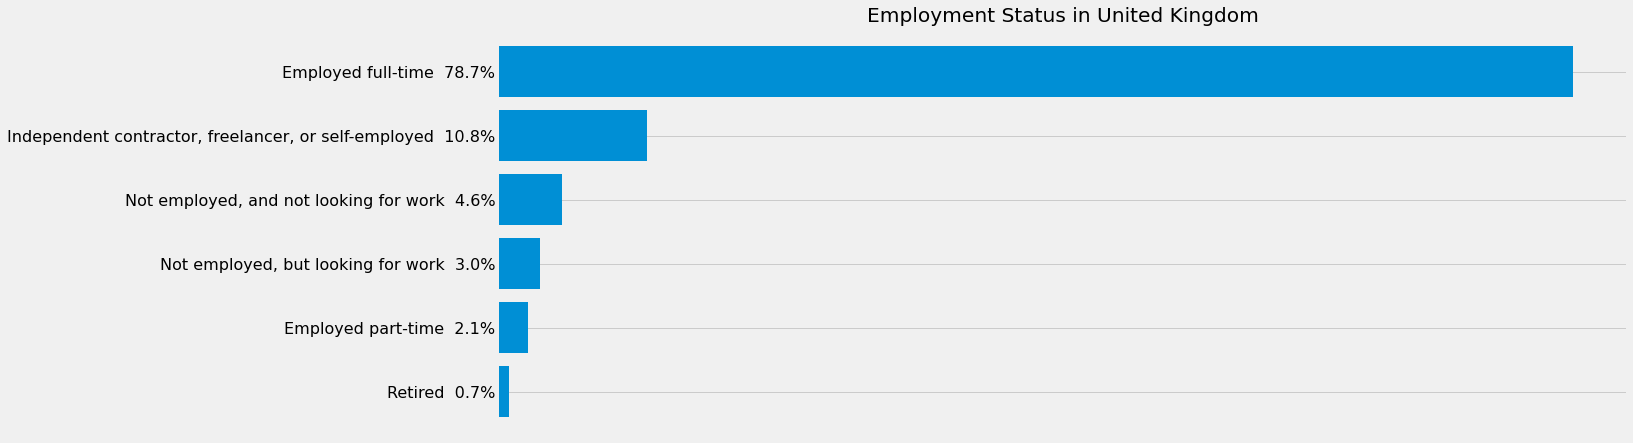

In [65]:
Employment_Kingdom = data["Employment"]  #### Call data we need
Employment_Kingdom.dropna(inplace = True)   ##### filter and remove empty spaces

Employment = data[(Employment_Kingdom!= "NaN") & (data["Country"] == "United Kingdom")]  ###### employment in United Kingdom
New_Employment = Employment["Employment"]   ######## keep in a new variable 

Dictionary_Distributor(New_Employment, False) ##### auto sort and count


###### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in United Kingdom")  


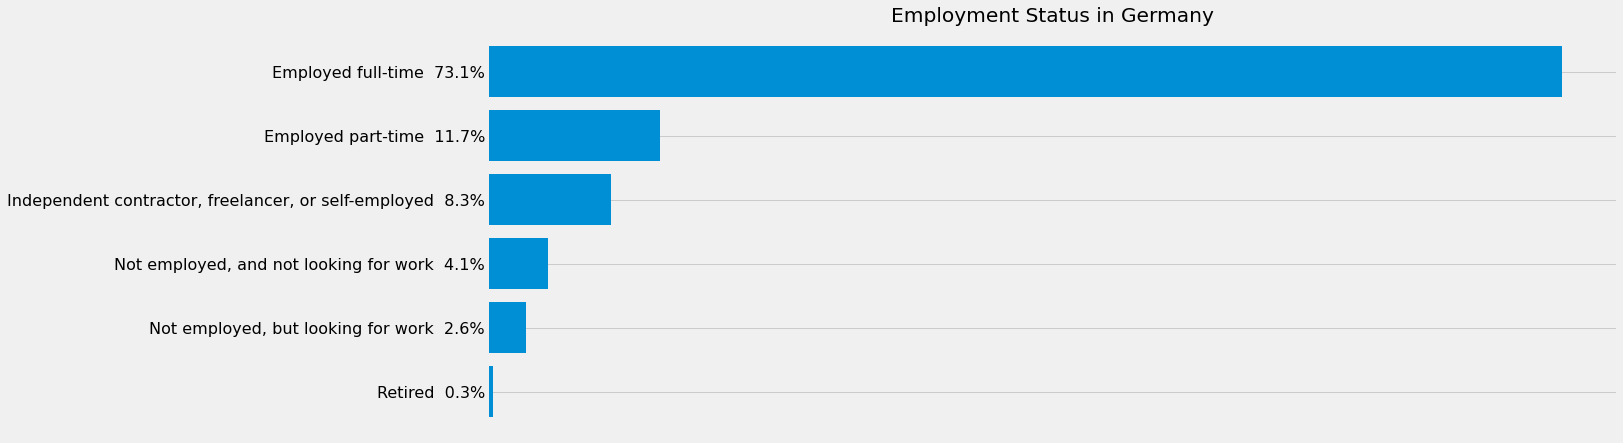

In [66]:
Employment_Germany = data["Employment"]  #### Call data we need
Employment_Germany.dropna(inplace = True)   ##### filter and remove empty spaces

Employment = data[(Employment_Germany!= "NaN") & (data["Country"] == "Germany")]   ###### employment in Germany
New_Employment = Employment["Employment"]   ######## keep in a new variable 

Dictionary_Distributor(New_Employment, False) ##### auto sort and count


####### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in Germany")   


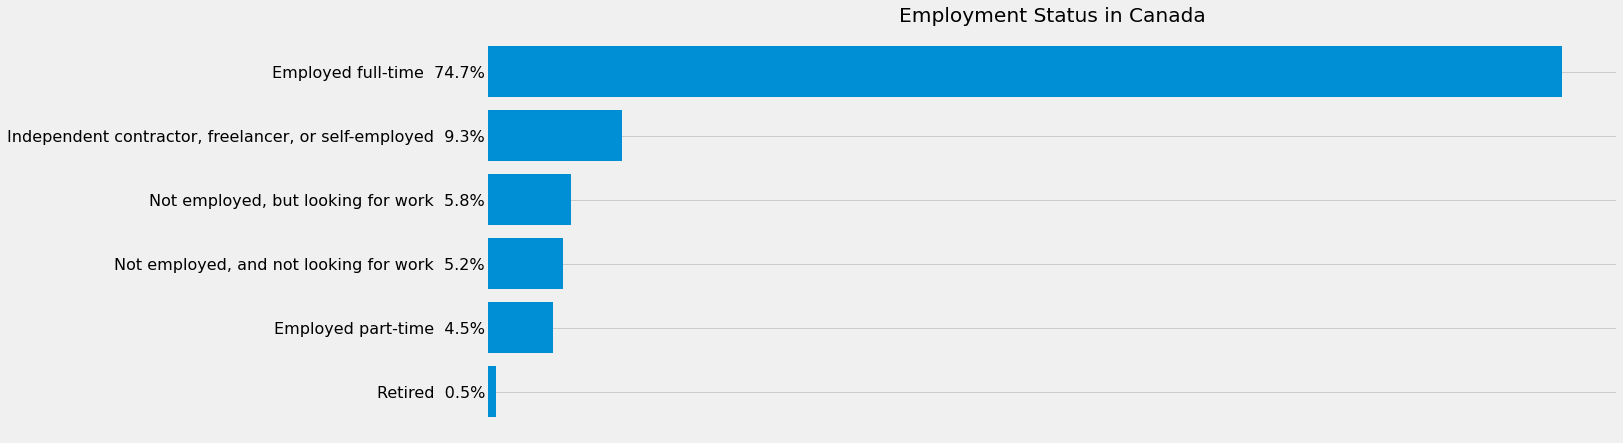

In [67]:
Employment_Canada = data["Employment"]  #### Call data we need
Employment_Canada.dropna(inplace = True)   ##### filter and remove empty spaces

Employment = data[(Employment_Canada!= "NaN") & (data["Country"] == "Canada")]     ###### employment in Canada
New_Employment = Employment["Employment"]    ######## keep in a new variable 

Dictionary_Distributor(New_Employment, False) ##### auto sort and count

########## building graph
Build_Barh_sizes( key_Phrases , Quantity, New_Employment ,"fivethirtyeight", False , (18,7), "Employment Status in Canada")   


####  Company Type

<h5 style="text-align:center; " > <b>Company Size

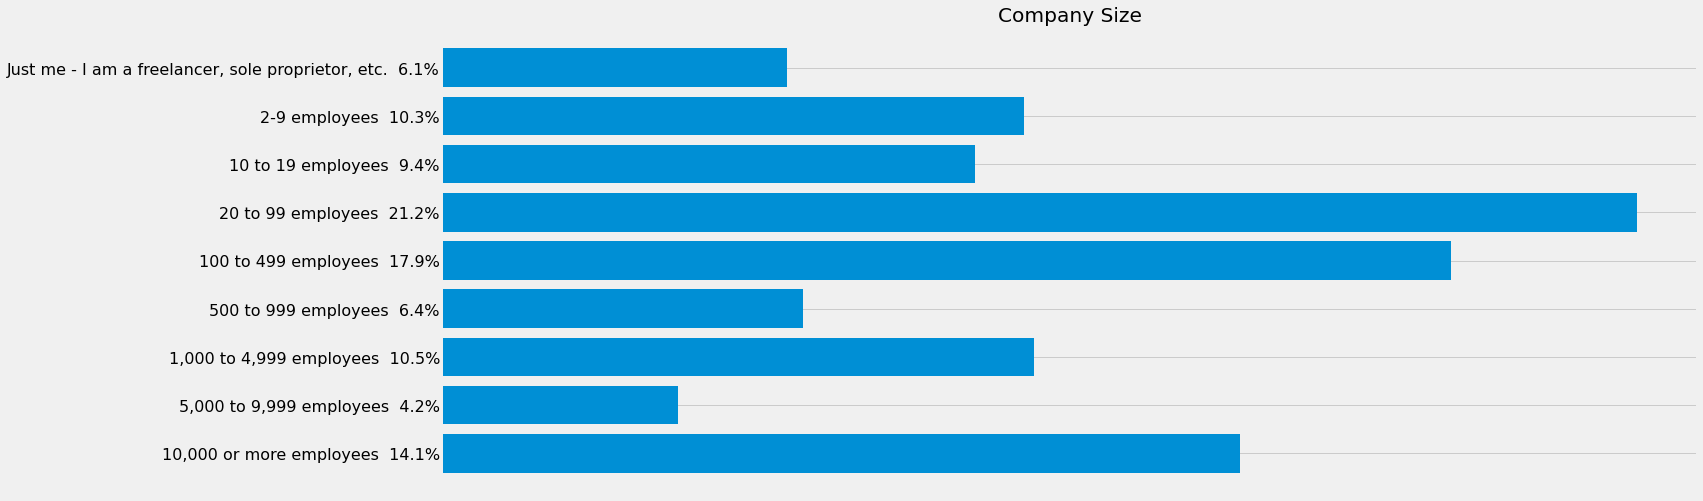

In [68]:
OrgSize = data["OrgSize"]     #### Call data we need
OrgSize.dropna(inplace = True)   ##### filter and remove empty spaces

###### Count data
counted = Counter(OrgSize) 

######## create ordered list for key phrases #########
key_Phrases = ["Just me - I am a freelancer, sole proprietor, etc.", "2-9 employees", "10 to 19 employees","20 to 99 employees",
"100 to 499 employees", "500 to 999 employees", "1,000 to 4,999 employees", "5,000 to 9,999 employees", "10,000 or more employees"]

########## Creating empty list for quantity to add elements ########
Quantity =[]

########## distributing key phrases by quantity ######
for i in key_Phrases:
    Quantity.append(counted[i])

##### reversing data on graph
key_Phrases.reverse()
Quantity.reverse()

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (20,8), "Company Size")  

####  Career Values

<h5 style="text-align:center; " > <b>How Do Developers Feel About Their Careers and Jobs?

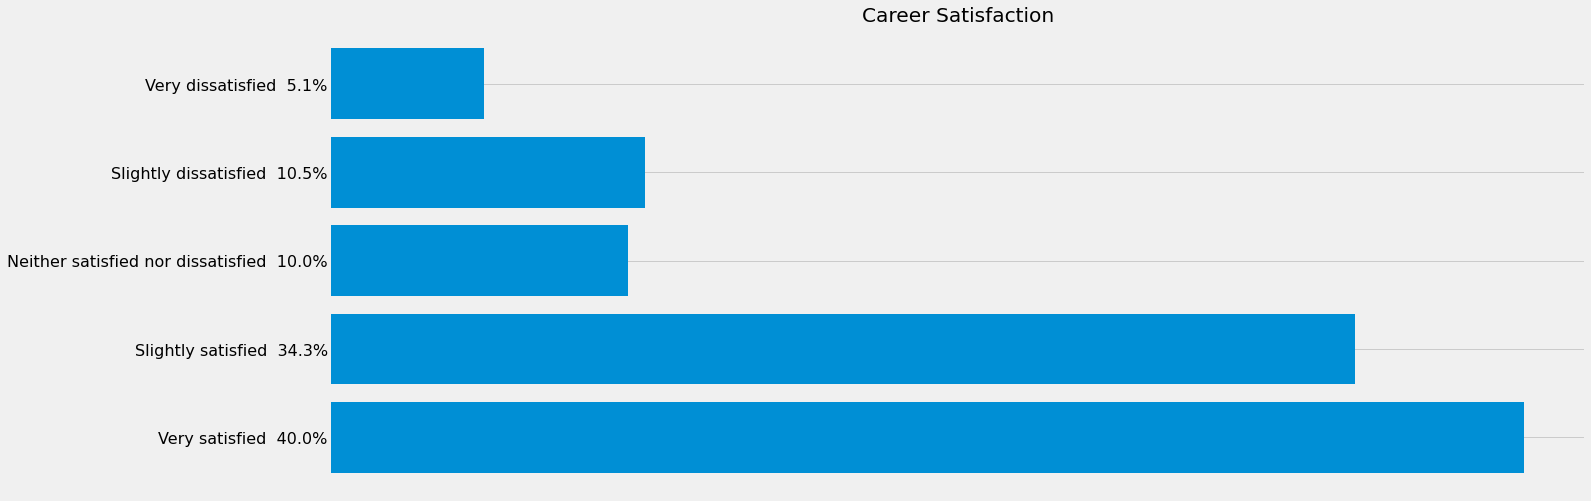

In [69]:
CareerSat = data["CareerSat"]    #### Call data we need
CareerSat.dropna(inplace = True)  ##### filter and remove empty spaces

counted = Counter(CareerSat) ###### Count data

######## create ordered list for key phrases #########
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]

########## Creating empty list for quantity to add elements ########
Quantity = []

########### distributing key phrases by quantity #####
for i in key_Phrases:
    Quantity.append(counted[i])

######## Building graph
Build_Barh_sizes( key_Phrases , Quantity, CareerSat ,"fivethirtyeight", False , (20,8), "Career Satisfaction")  

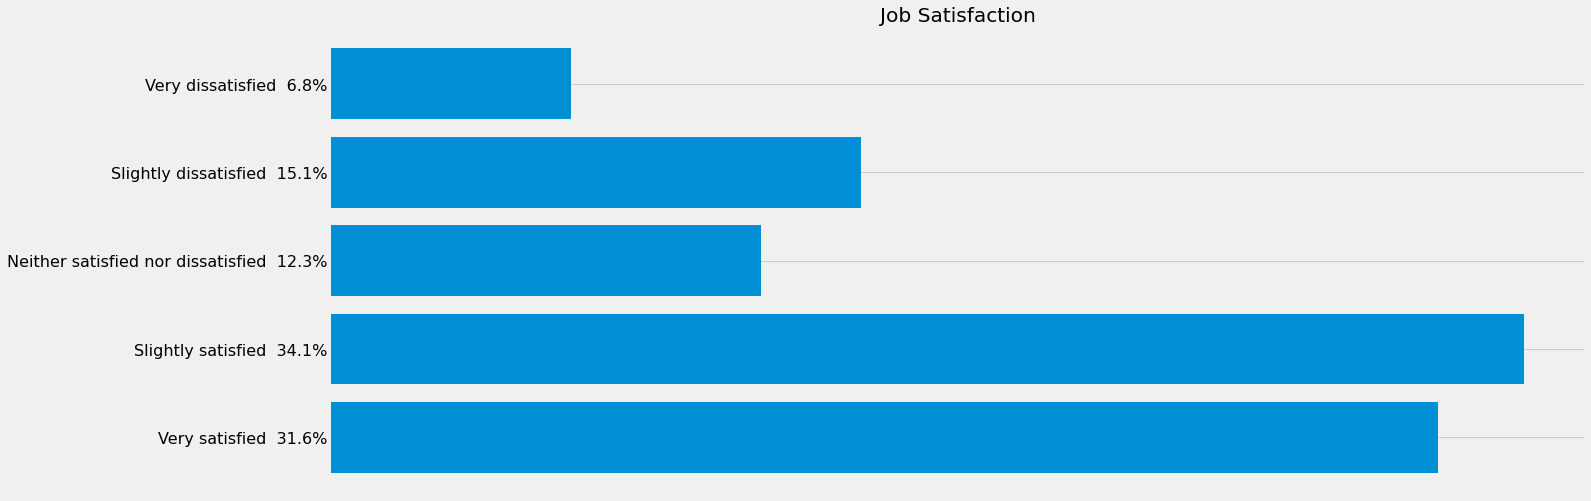

In [70]:
JobSat =  data["JobSat"]  #### Call data we need
JobSat.dropna(inplace = True)    ##### filter and remove empty spaces

counted = Counter(JobSat)   ###### Count data

######## create ordered list for key phrases #########
key_Phrases = ["Very satisfied", "Slightly satisfied", "Neither satisfied nor dissatisfied", "Slightly dissatisfied", "Very dissatisfied"]

########## Creating empty list for quantity to add elements ########
Quantity = []

###### distributing key phrases by quantity #####
for i in key_Phrases:
    Quantity.append(counted[i])

########## Buiding graph
Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (20,8), "Job Satisfaction")  


<h5 style="text-align:center; " > <b>How Confident Are Developers in Their Managers?

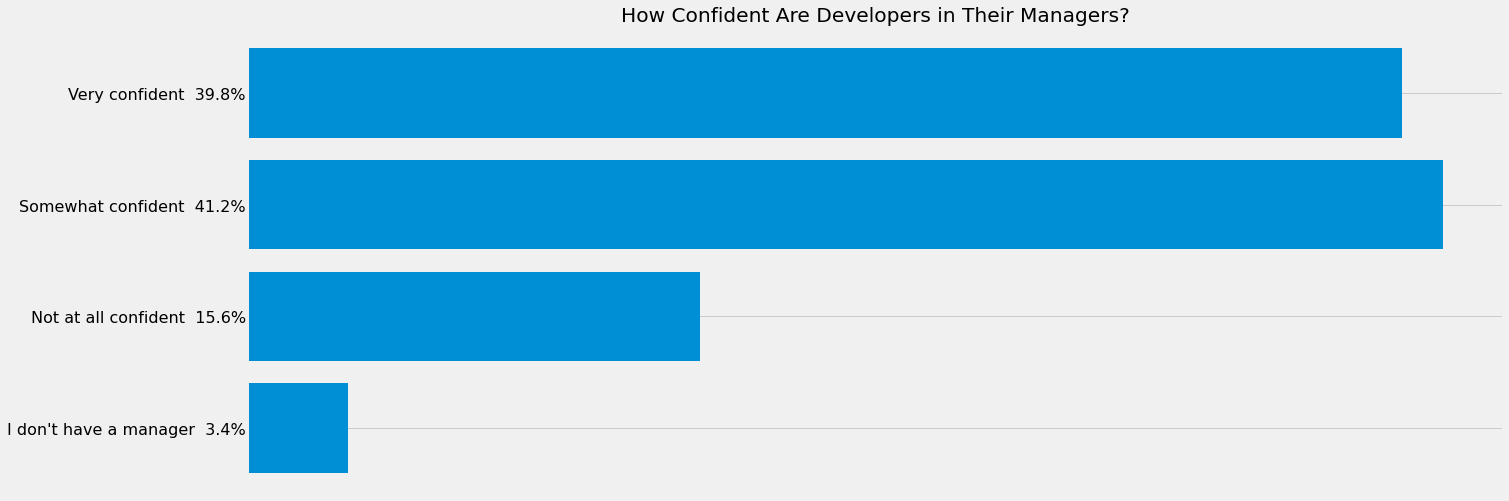

In [71]:
confidence = data["MgrIdiot"]  #### Call data we need
confidence.dropna(inplace  = True)    ##### filter and remove empty spaces

counted = Counter(confidence) ###### Count data


########## Creating empty list for quantity to add elements ########
key_Phrases = ["I don't have a manager", "Not at all confident", "Somewhat confident", "Very confident"]

######### Creating empty list for quantity to add elements ########
Quantity = []

########### distributing key phrases by quantity ##
for i in key_Phrases:
    Quantity.append(counted[i])


###### building graph
Build_Barh_sizes( key_Phrases , Quantity, confidence ,"fivethirtyeight", False , (20,8), "How Confident Are Developers in Their Managers?")

<h5 style="text-align:center; " > <b>Do Developers Need to Become Managers to Make More Money?

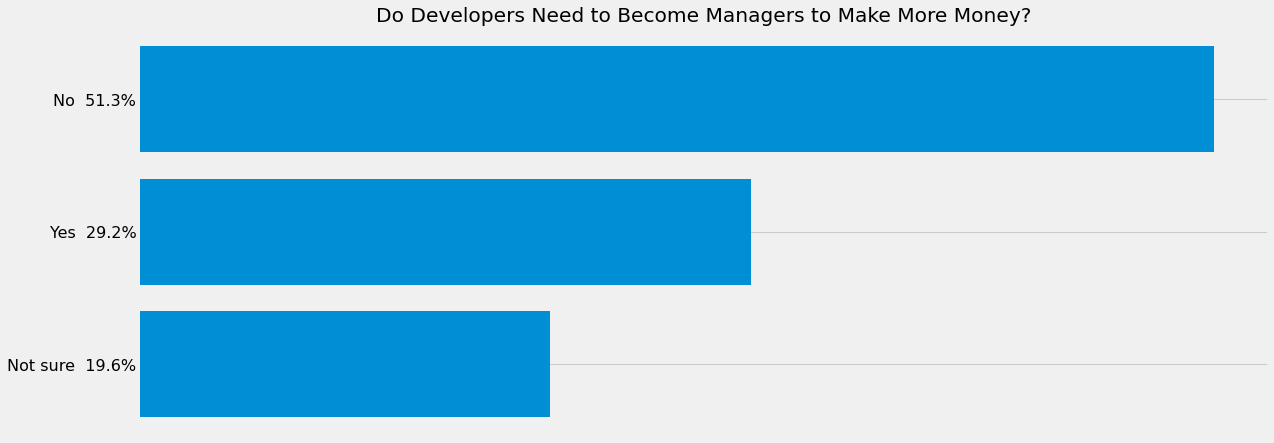

In [72]:
MgrMoney = data["MgrMoney"]  #### Call data we need
MgrMoney.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(MgrMoney, False) ### Auto sort and count

##### Buiding graph ###
Build_Barh_sizes( key_Phrases , Quantity, MgrMoney ,"fivethirtyeight", False , (18,7), "Do Developers Need to Become Managers to Make More Money?")  



<h5 style="text-align:center; " > <b>Do Developers Want To Become Managers in the Future?

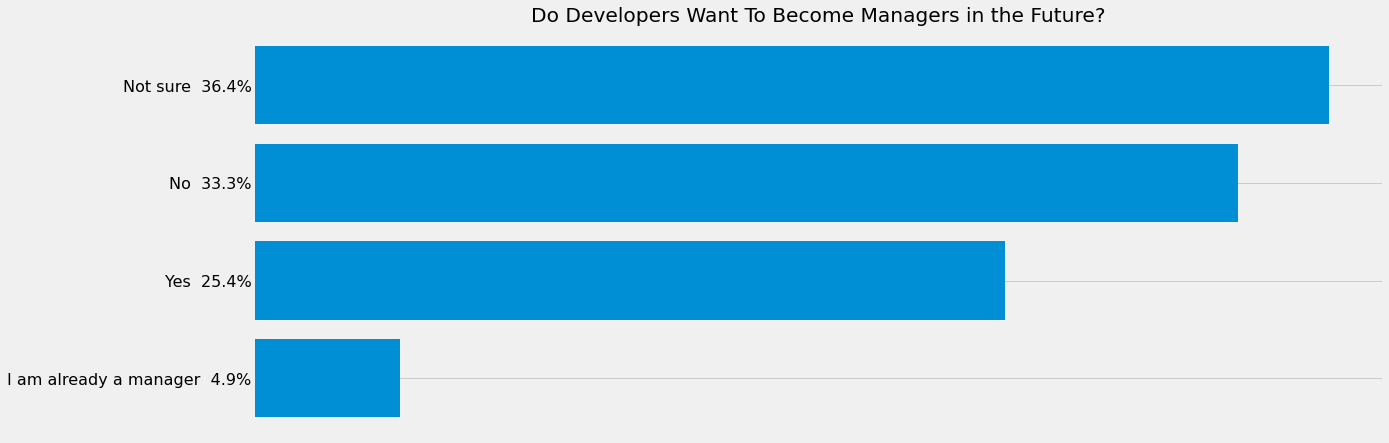

In [73]:
MgrWant = data["MgrWant"]  #### Call data we need
MgrWant.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(MgrWant, False) ### Auto sort and count

### Building graph
Build_Barh_sizes( key_Phrases , Quantity, MgrWant ,"fivethirtyeight", False , (18,7), "Do Developers Want To Become Managers in the Future?")   


####   Looking for a Job

<h5 style="text-align:center; " > <b>Job Search Status

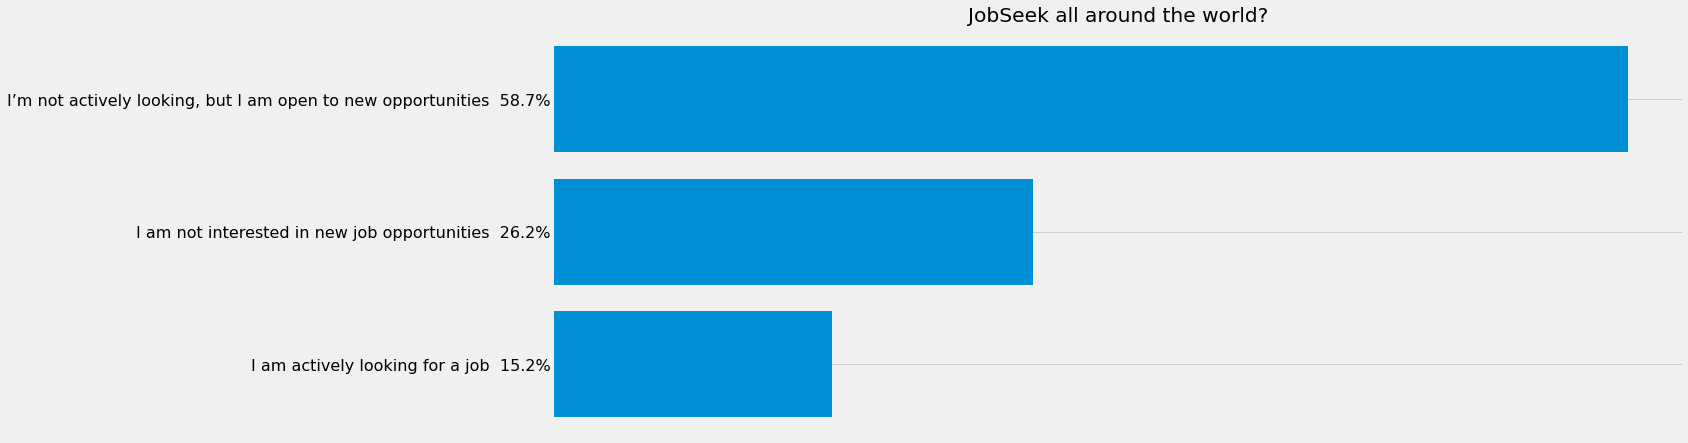

In [74]:
JobSeek = data["JobSeek"] #### Call data we need
JobSeek.dropna(inplace = True)   ##### filter and remove empty spaces

Dictionary_Distributor(JobSeek, False) ### Auto sort and count

##### building graph
Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek all around the world?")   


<h5 style="text-align:center; " > <b>Job Search Status by Geography

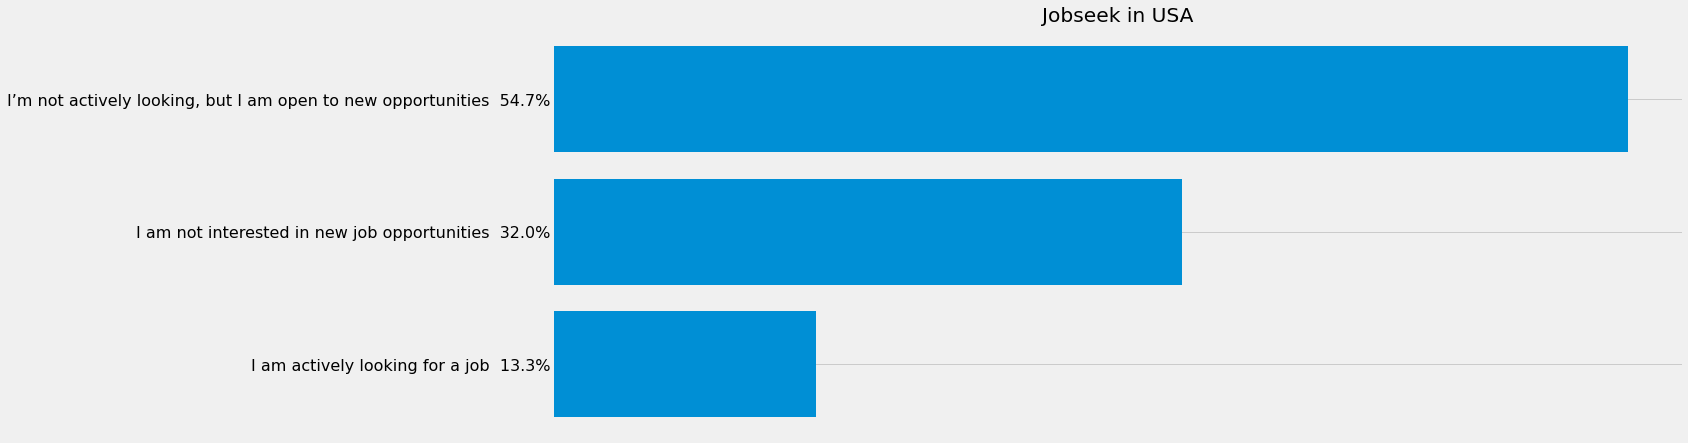

In [75]:
JobSeek_USA = data["JobSeek"]  #### Call data we need
JobSeek_USA.dropna(inplace = True)  ##### filter and remove empty spaces

JobSeek = data[(JobSeek_USA!= "NaN") & (data["Country"] == "United States")]  #### Jobseek in USA
New_JobSeek = JobSeek["JobSeek"] #### save in new variable

Dictionary_Distributor(New_JobSeek, False) ### Auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "Jobseek in USA") 


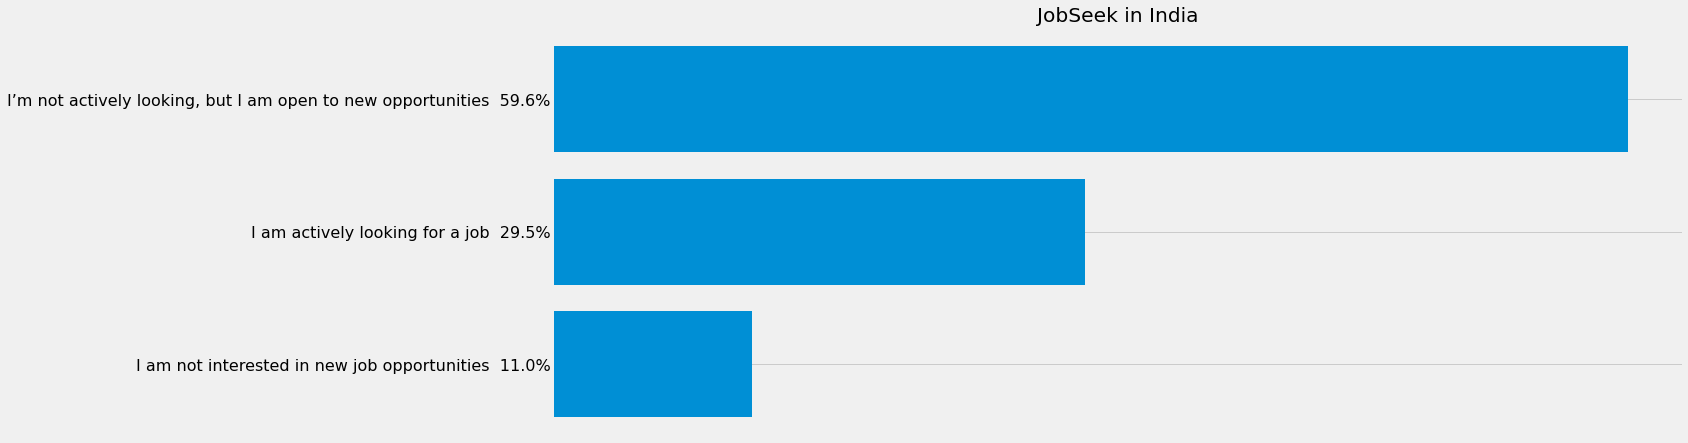

In [76]:
JobSeek = data["JobSeek"]  #### Call data we need
JobSeek.dropna(inplace = True)   ##### filter and remove empty spaces

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "India")]  #### Jobseek in India
New_JobSeek = JobSeek_India["JobSeek"] #### save in new variable

Dictionary_Distributor(New_JobSeek, False) ### Auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in India")   


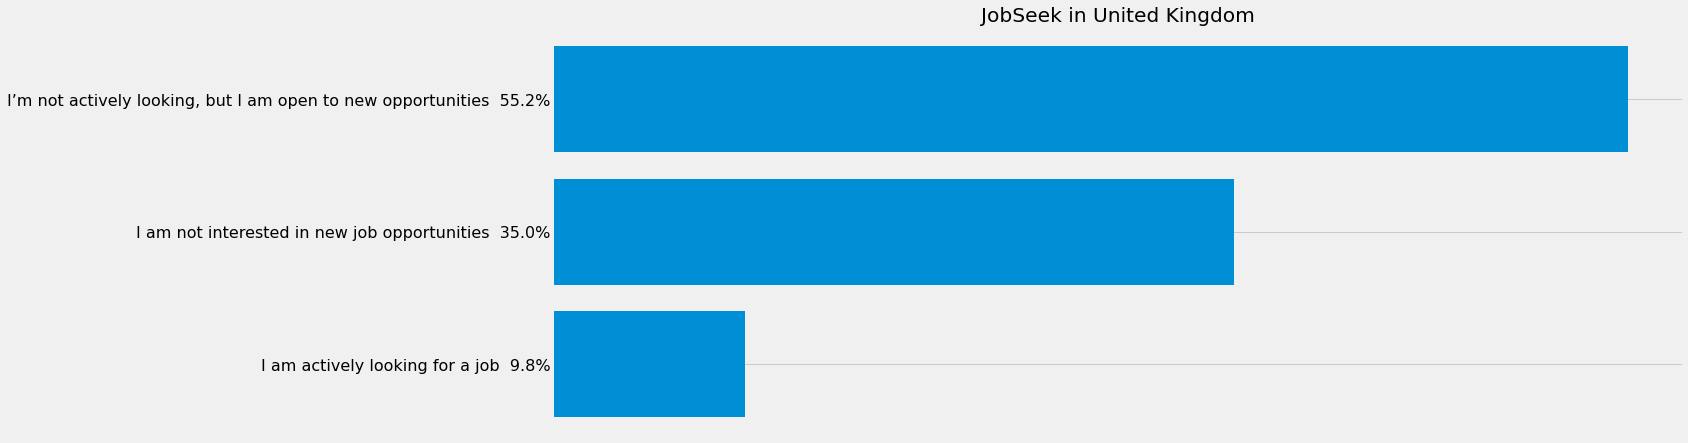

In [77]:
JobSeek = data["JobSeek"]  #### Call data we need
JobSeek.dropna(inplace = True) ##### filter and remove empty spaces

JobSeek_UK = data [(JobSeek != "nan") & ((data["Country"] == "United Kingdom") | (data["Country"] == "Iceland") | (data["Country"] == "Ireland") )] #### Jobseek in UK
New_JobSeek = JobSeek_UK["JobSeek"] #### save in new variable

Dictionary_Distributor(New_JobSeek, False) ### Auto sort and count

####### Building graph
Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in United Kingdom")   


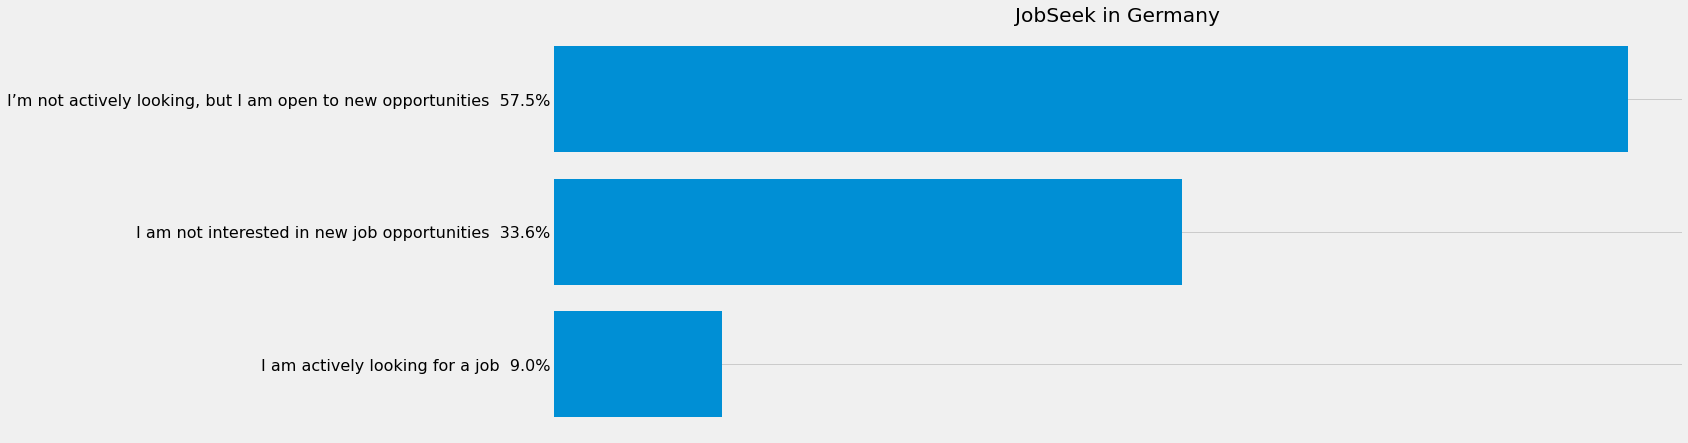

In [78]:
JobSeek = data["JobSeek"]  #### Call data we need
JobSeek.dropna(inplace = True)   ##### filter and remove empty spaces

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "Germany")] #### Jobseek in Germany
New_JobSeek = JobSeek_India["JobSeek"] #### save in new variable

Dictionary_Distributor(New_JobSeek, False) ### Auto sort and count

#### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in Germany")   


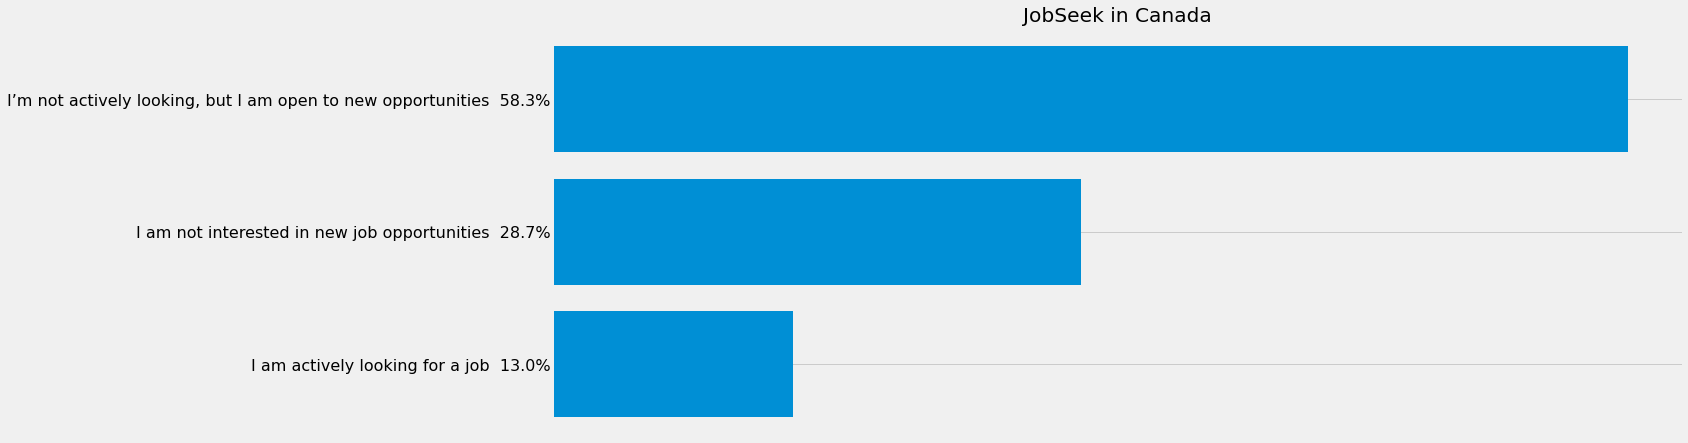

In [79]:
JobSeek = data["JobSeek"]  #### Call data we need
JobSeek.dropna(inplace = True)    ##### filter and remove empty spaces

JobSeek_India = data[(JobSeek!="NaN") & (data["Country"] == "Canada")]  #### Jobseek in Canada
New_JobSeek = JobSeek_India["JobSeek"] #### save in new variable

Dictionary_Distributor(New_JobSeek, False) ### Auto sort and count


######## building graph
Build_Barh_sizes( key_Phrases , Quantity, New_JobSeek ,"fivethirtyeight", False , (18,7), "JobSeek in Canada")  


<h5 style="text-align:center; " > <b>Who's Actively Looking for a Job?

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:5258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


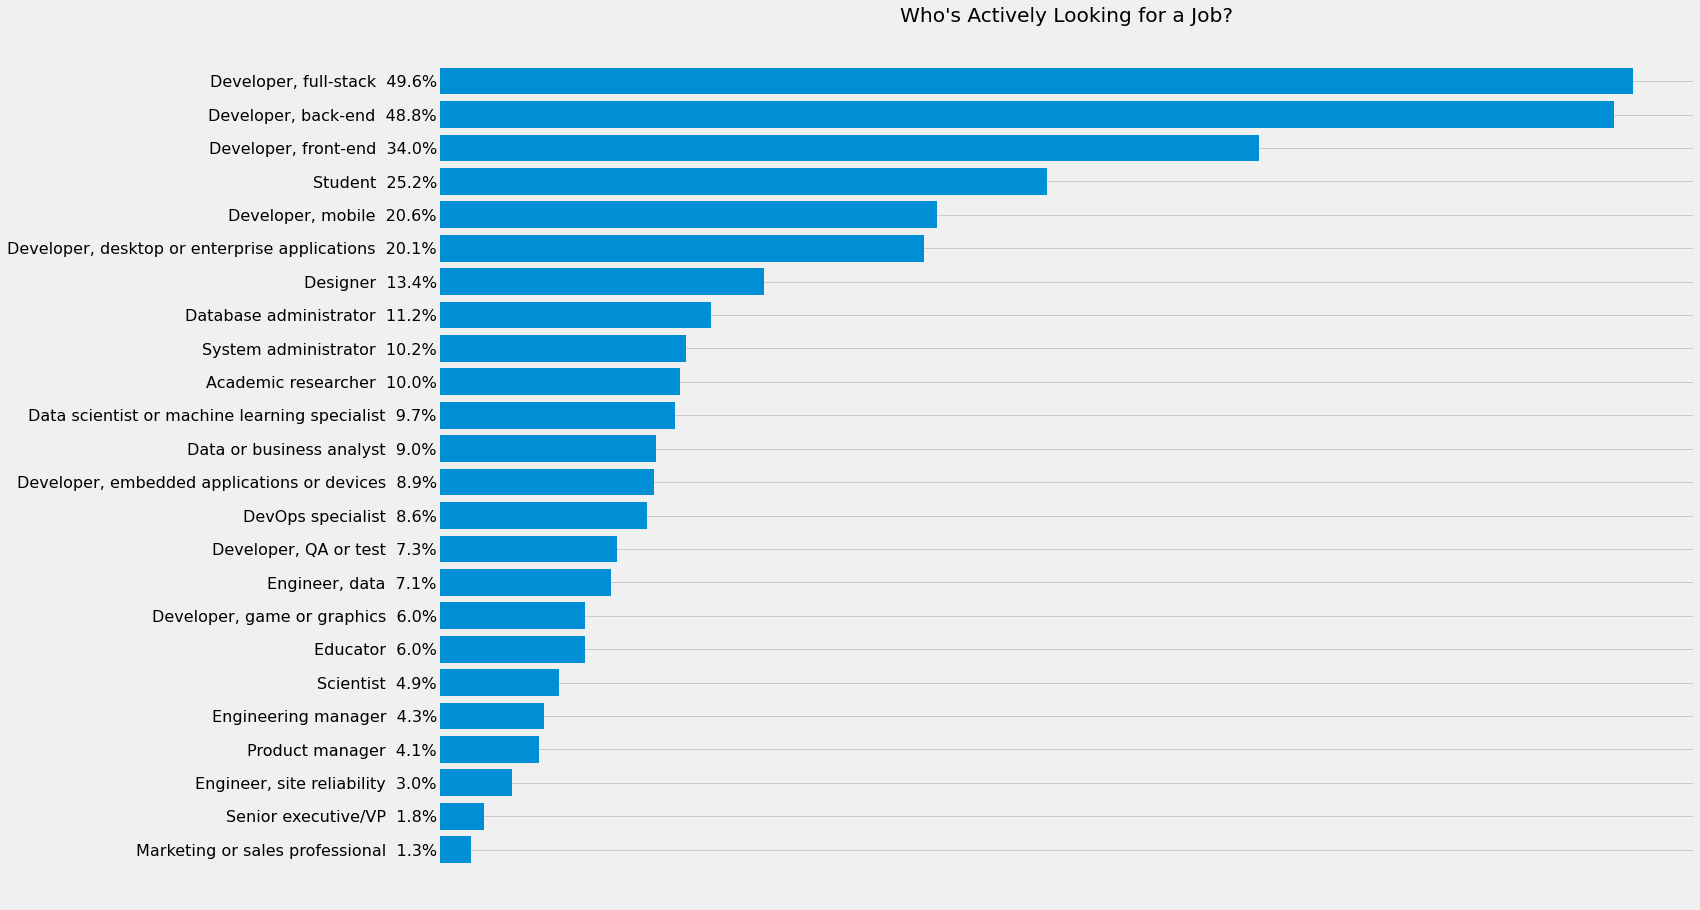

In [127]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)


new_JobSeek = data[(JobSeek == 'I am actively looking for a job')  &  ( data["DevType"] != "NaN" ) ]

new_DevType = new_JobSeek ["DevType"]

new_DevType.dropna(inplace=True)

new_DevType = new_DevType.str.split(";")


list_sorter_counter(new_DevType)

Build_Barh_sizes( key_Phrases , Quantity, new_DevType ,"fivethirtyeight", False , (20,15), "Who's Actively Looking for a Job?")  # Building a schedule

<h5 style="text-align:center; " > <b>How Long Ago Did Developers Last Change Jobs?

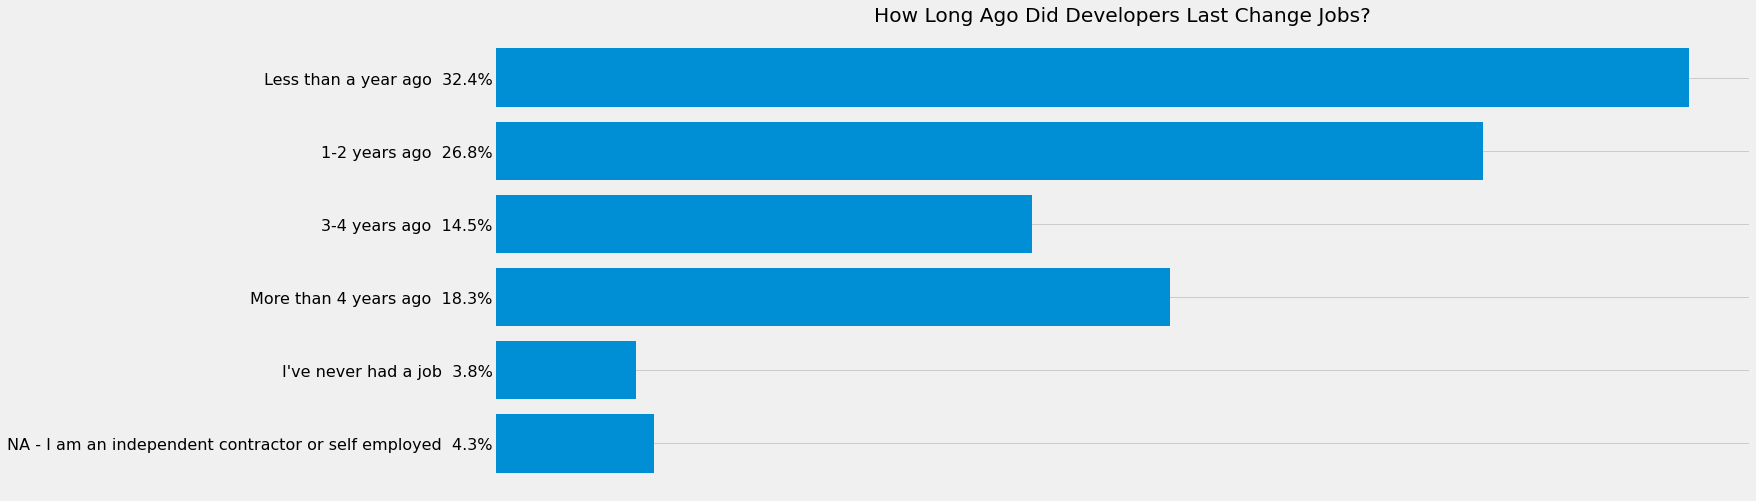

In [80]:
LastHireDate = data["LastHireDate"]   #### Call data we need
LastHireDate.dropna(inplace =True)  ##### filter and remove empty spaces

counted  = Counter(LastHireDate)  ###### Count data

######## create ordered list for key-phrases
key_Phrases  =["NA - I am an independent contractor or self employed",
                "I've never had a job", "More than 4 years ago", "3-4 years ago", 
                "1-2 years ago", "Less than a year ago"]

######### creating empty list for quantity to add elements #########
Quantity = []

###### distributing key phrases by quantity
for i in key_Phrases:
    Quantity.append(counted[i])


##### building graph
Build_Barh_sizes( key_Phrases , Quantity, LastHireDate ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")


<h5 style="text-align:center; " > <b>Interview Practices

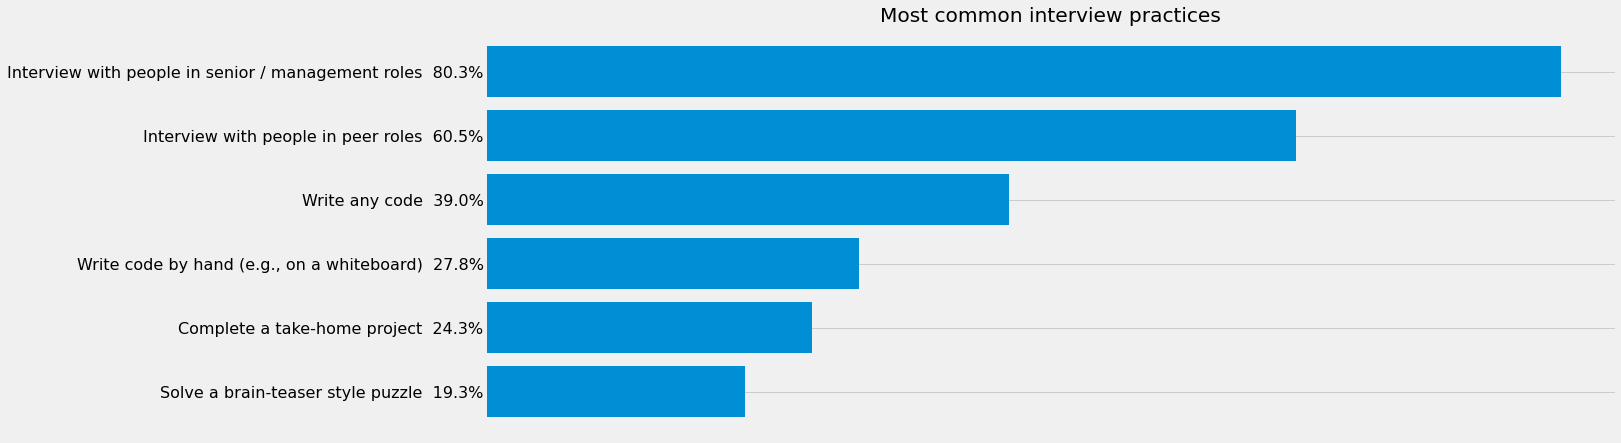

In [81]:
LastInt = data["LastInt"]  #### Call data we need
LastInt.dropna(inplace = True)  ##### filter and remove empty spaces

LastInt = LastInt.str.split(';') #### split elements where ";" is written

list_sorter_counter(LastInt)  ### Auto sort and count

######### building graph
Build_Barh_sizes( key_Phrases , Quantity, LastInt ,"fivethirtyeight", False , (18,7), "Most common interview practices")  



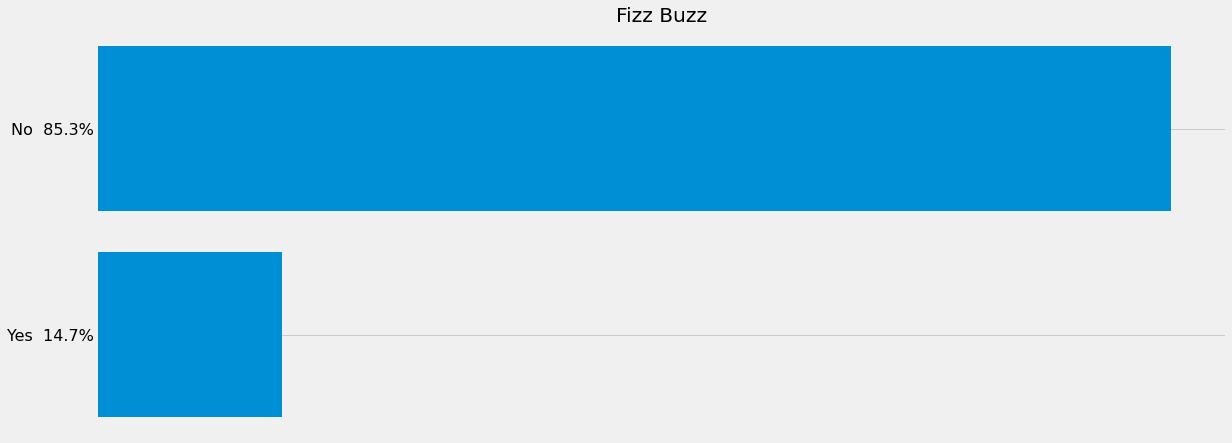

In [82]:
FizzBuzz = data["FizzBuzz"]  #### Call data we need
FizzBuzz.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(FizzBuzz, False)    ### Auto sort and count

####### Building graph
Build_Barh_sizes( key_Phrases , Quantity, FizzBuzz ,"fivethirtyeight", False , (18,7), "Fizz Buzz")  


<h5 style="text-align:center; " > <b>Updating That Resume

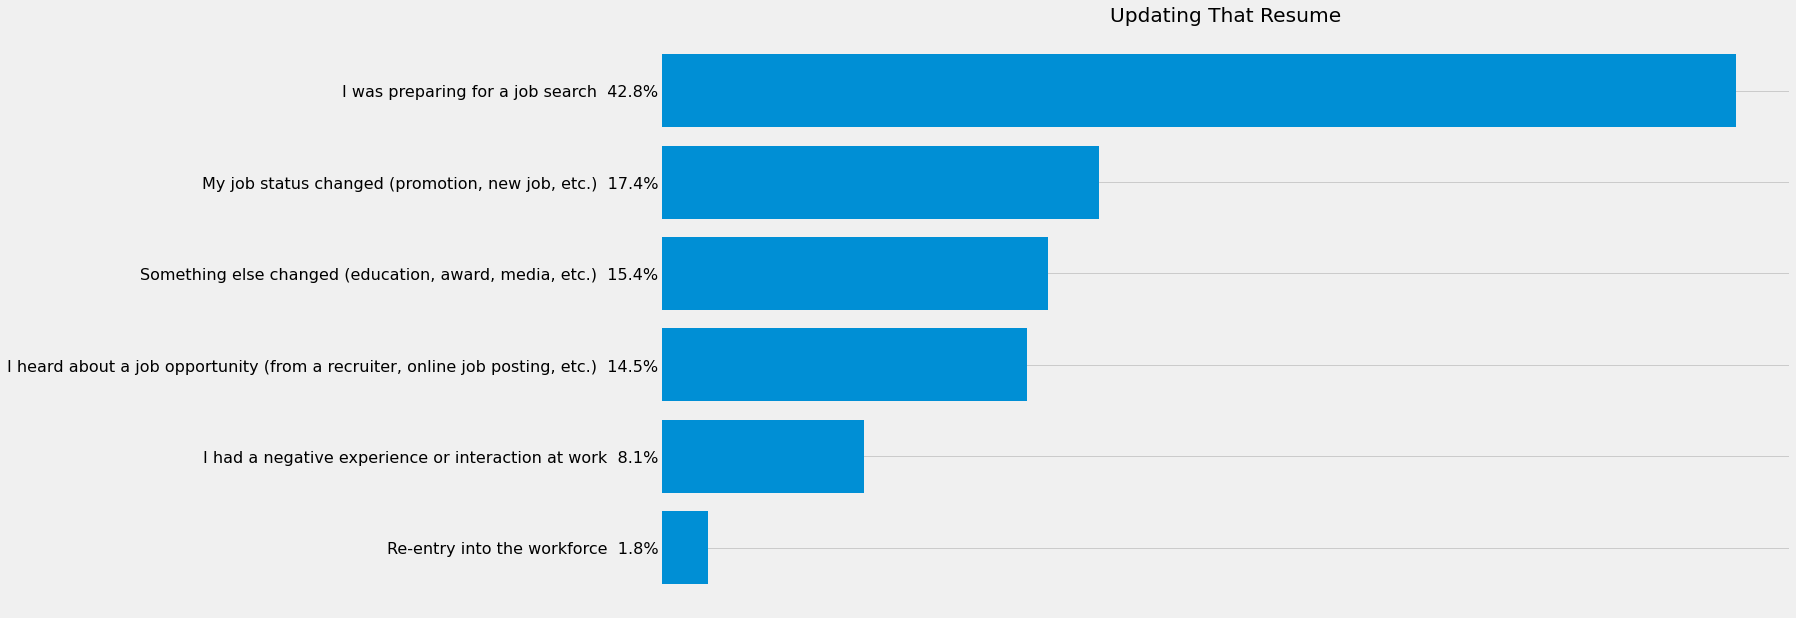

In [83]:
ResumeUpdate = data["ResumeUpdate"]  #### Call data we need
ResumeUpdate.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(ResumeUpdate, False)    ### Auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, ResumeUpdate ,"fivethirtyeight", False , (18,10), "Updating That Resume")  


####     Job Priorities

<h5 style="text-align:center; " > <b>Most Important Job Factors

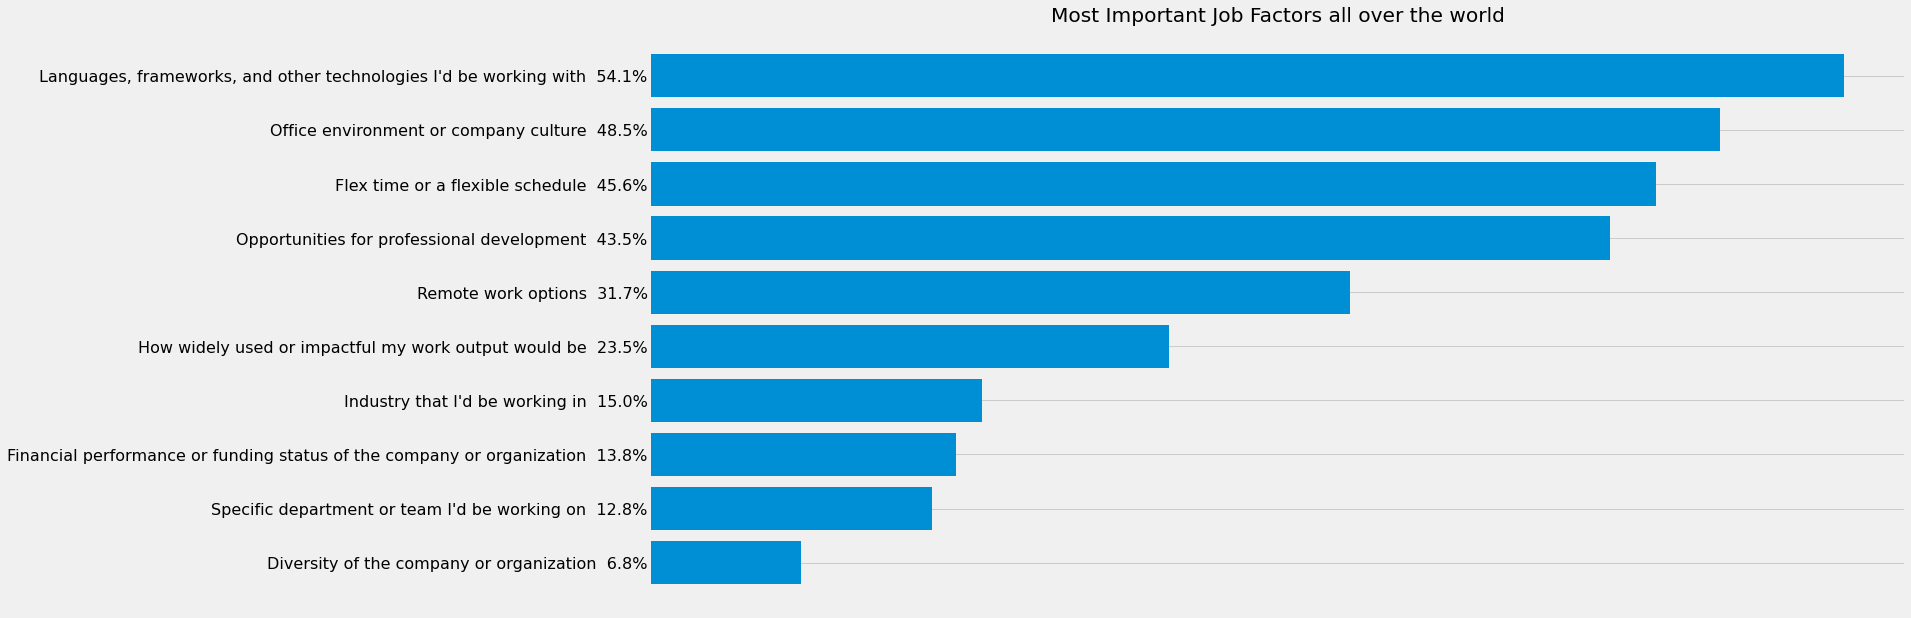

In [84]:
JobFactors = data["JobFactors"] #### Call data we need
JobFactors.dropna(inplace = True)  ##### filter and remove empty spaces

JobFactors = JobFactors.str.split(";")  #### split elements where ";" is written

list_sorter_counter(JobFactors) ######## auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, JobFactors ,"fivethirtyeight", False , (20,10), "Most Important Job Factors all over the world")



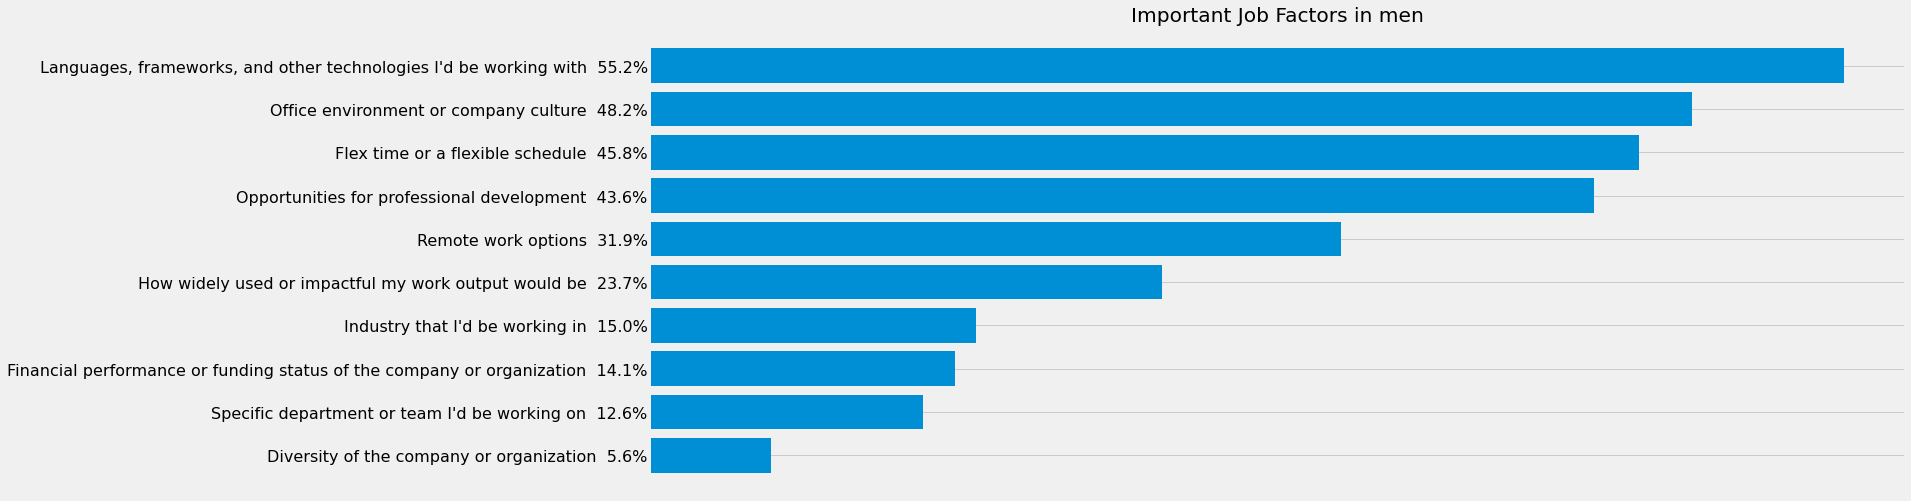

In [85]:
JobFactors  = data["JobFactors"]  #### Call data we need
JobFactors.dropna(inplace = True )  ##### filter and remove empty spaces

JobFactors_man =   data[ (JobFactors != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Jobfactor In men
JobFactors_man = JobFactors_man["JobFactors"]   ######### save in new variable
JobFactors_man = JobFactors_man.str.split(";")  #### split elements, where ";" is written

list_sorter_counter(JobFactors_man)  ###### auto sort and count

###### Building graph
Build_Barh_sizes( key_Phrases , Quantity, JobFactors_man ,"fivethirtyeight", False , (20,8), "Important Job Factors in men")



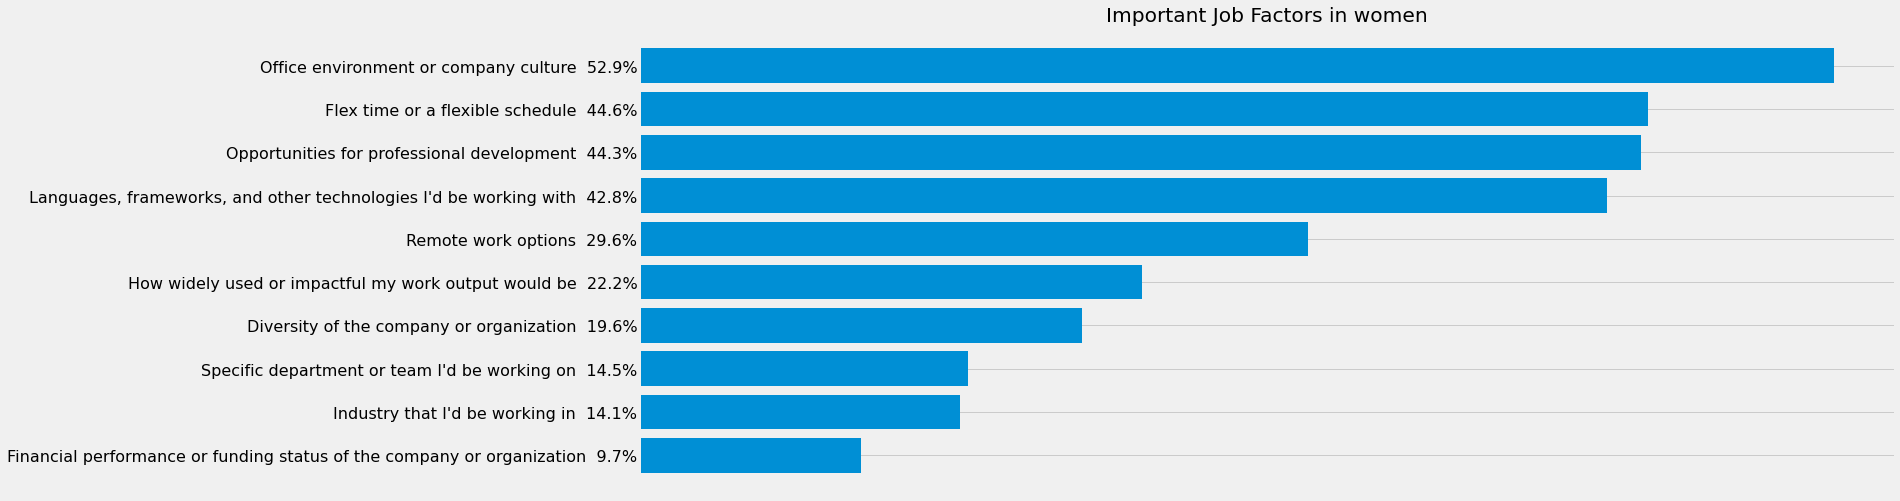

In [86]:
JobFactors  = data["JobFactors"]  #### Call data we need
JobFactors.dropna(inplace = True )   ##### filter and remove empty spaces

JobFactors_woman =   data[ (JobFactors != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] # Jobfactor In women
JobFactors_woman = JobFactors_woman["JobFactors"]  ######### save in new variable
JobFactors_woman = JobFactors_woman.str.split(";")   #### split elements, where ";" is written

list_sorter_counter(JobFactors_woman) ###### auto sort and count

#### Building graph
Build_Barh_sizes( key_Phrases , Quantity, JobFactors_woman ,"fivethirtyeight", False , (20,8), "Important Job Factors in women")


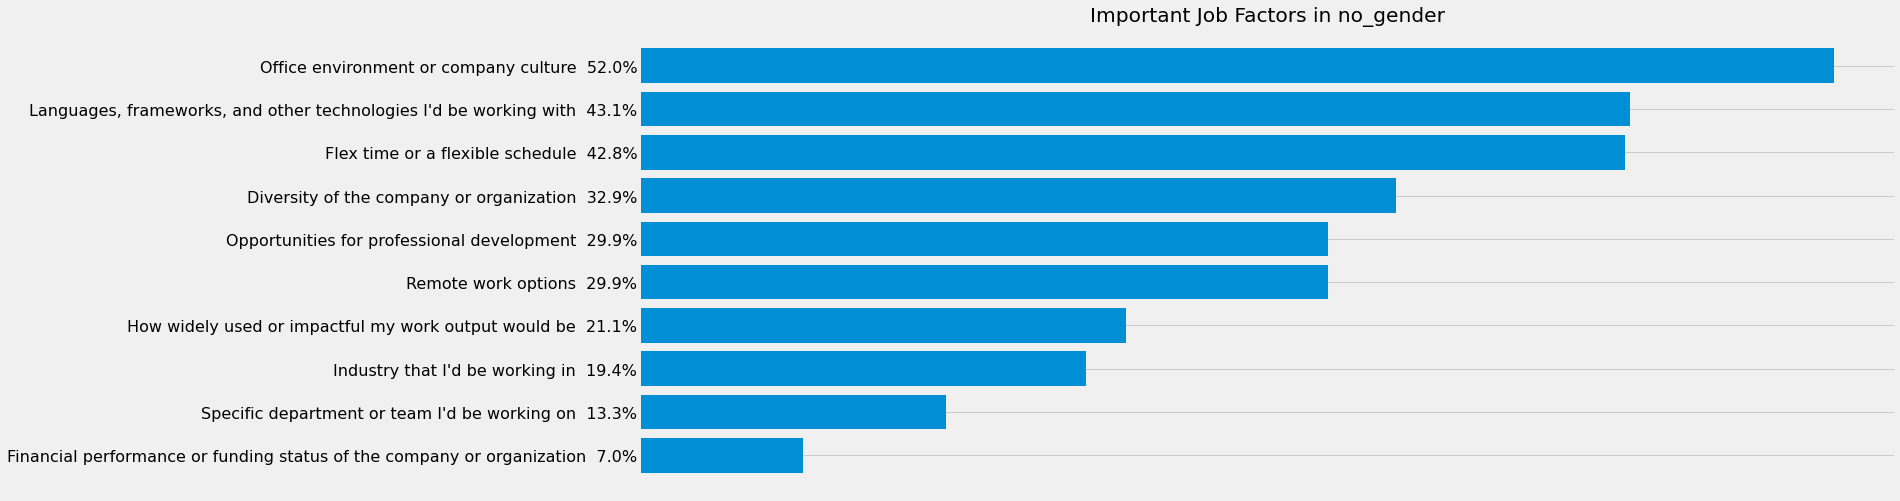

In [87]:
JobFactors  = data["JobFactors"]  #### Call data we need
JobFactors.dropna(inplace = True ) ##### filter and remove empty spaces

JobFactors_no_gender =   data[ (JobFactors != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Jobfactor in no_gender
JobFactors_no_gender = JobFactors_no_gender["JobFactors"] ######### save in new variable
JobFactors_no_gender = JobFactors_no_gender.str.split(";")   #### split elements, where ";" is written

list_sorter_counter(JobFactors_no_gender)  ###### auto sort and count

#### Building graph
Build_Barh_sizes( key_Phrases , Quantity, JobFactors_no_gender ,"fivethirtyeight", False , (20,8), "Important Job Factors in no_gender")


<h5 style="text-align:center; " > <b>Weighting Important Job Factors in the US

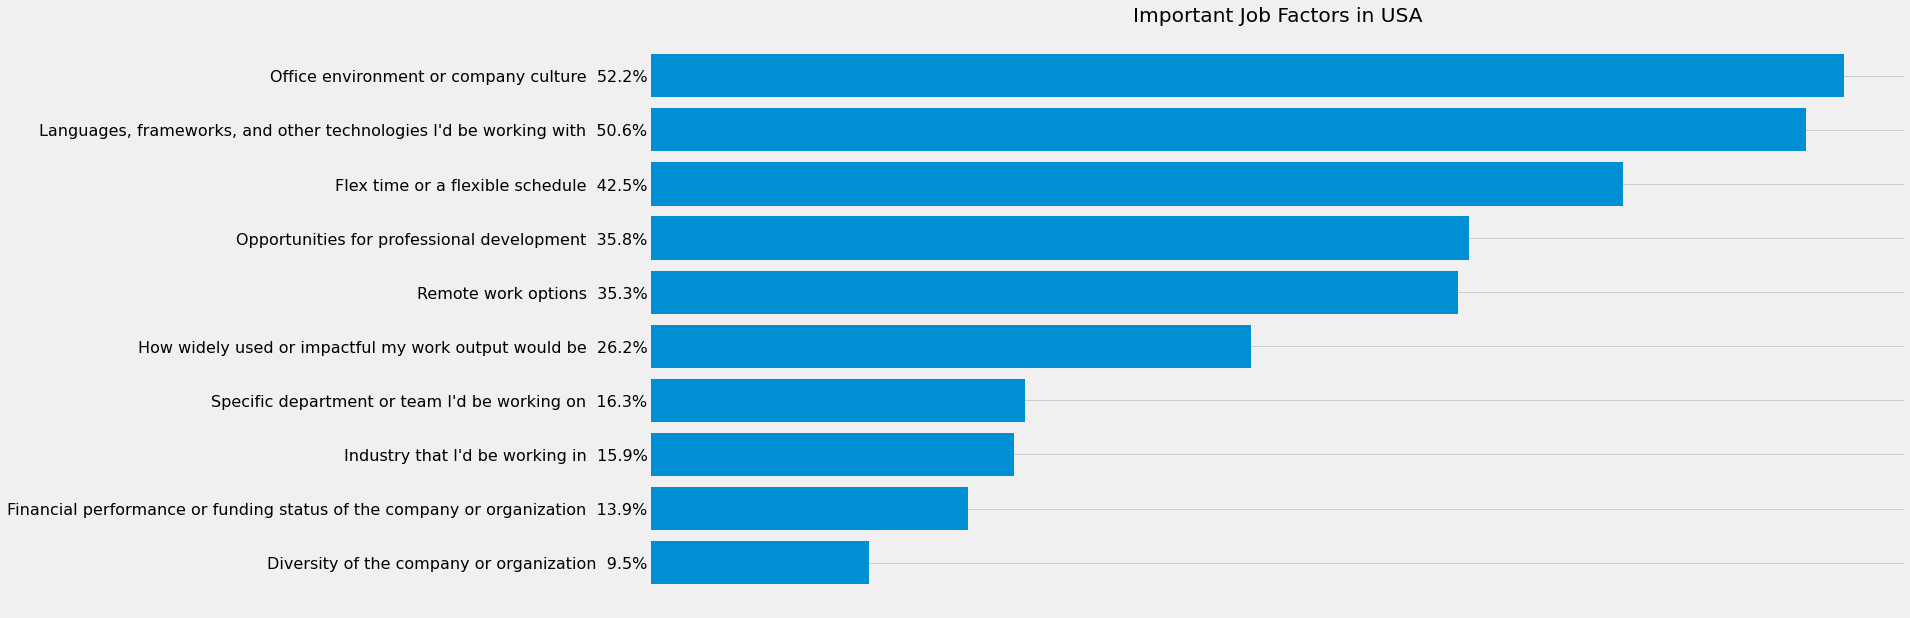

In [88]:
JobFactors  = data["JobFactors"] #### Call data we need
JobFactors.dropna(inplace = True ) ##### filter and remove empty spaces

JobFactors_in_USA =   data[ (JobFactors != "nan") & (data["Country"] == "United States")]   #Jobfactor in USA
JobFactors_in_USA = JobFactors_in_USA["JobFactors"]  ######### save in new variable
JobFactors_in_USA = JobFactors_in_USA.str.split(";")  #### split elements, where ";" is written

list_sorter_counter(JobFactors_in_USA) ###### auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, JobFactors_in_USA ,"fivethirtyeight", False , (20,10), "Important Job Factors in USA")


<h5 style="text-align:center; " > <b>How Often Do Developers Work Remotely?

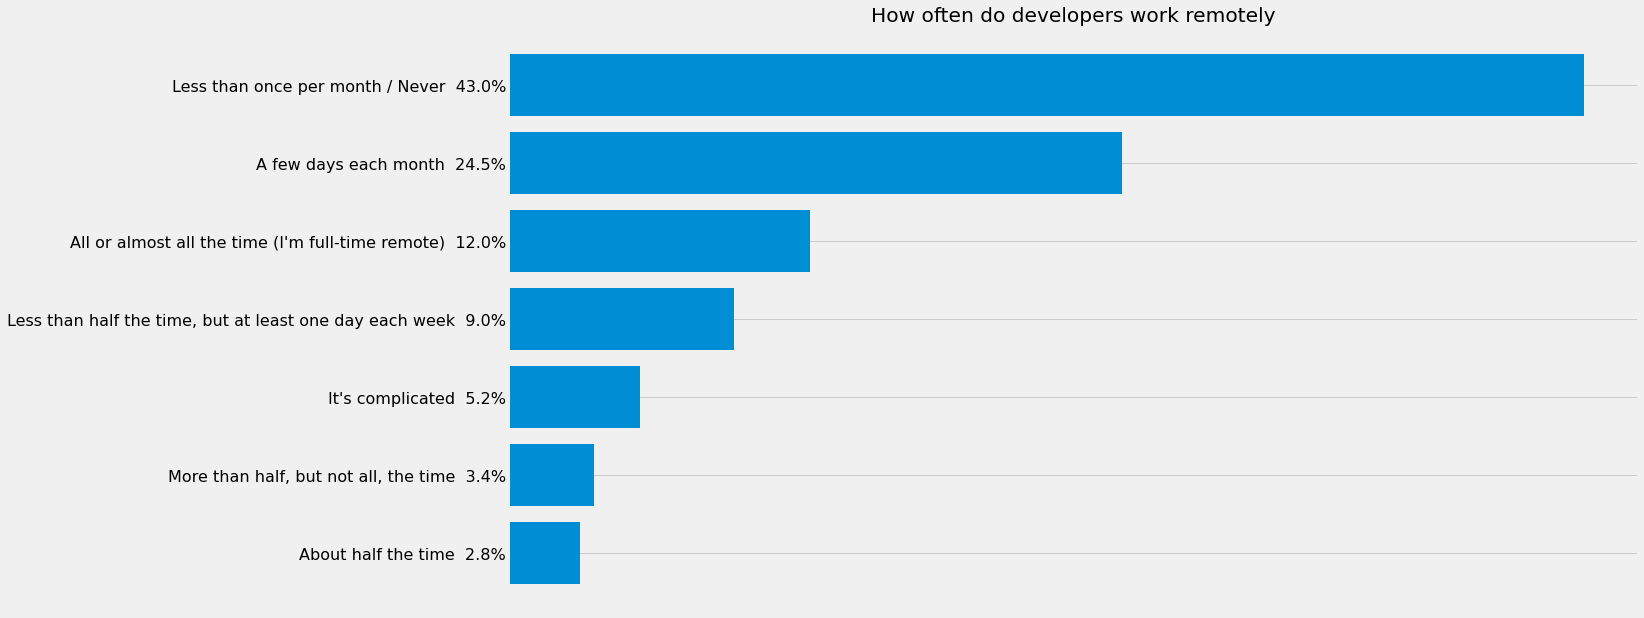

In [89]:
WorkRemote = data["WorkRemote"] #### Call data we need
WorkRemote.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(WorkRemote, False) ### auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkRemote ,"fivethirtyeight", False , (18,10), "How often do developers work remotely")   


<h5 style="text-align:center; " > <b>Where Do Developers Want to Work?

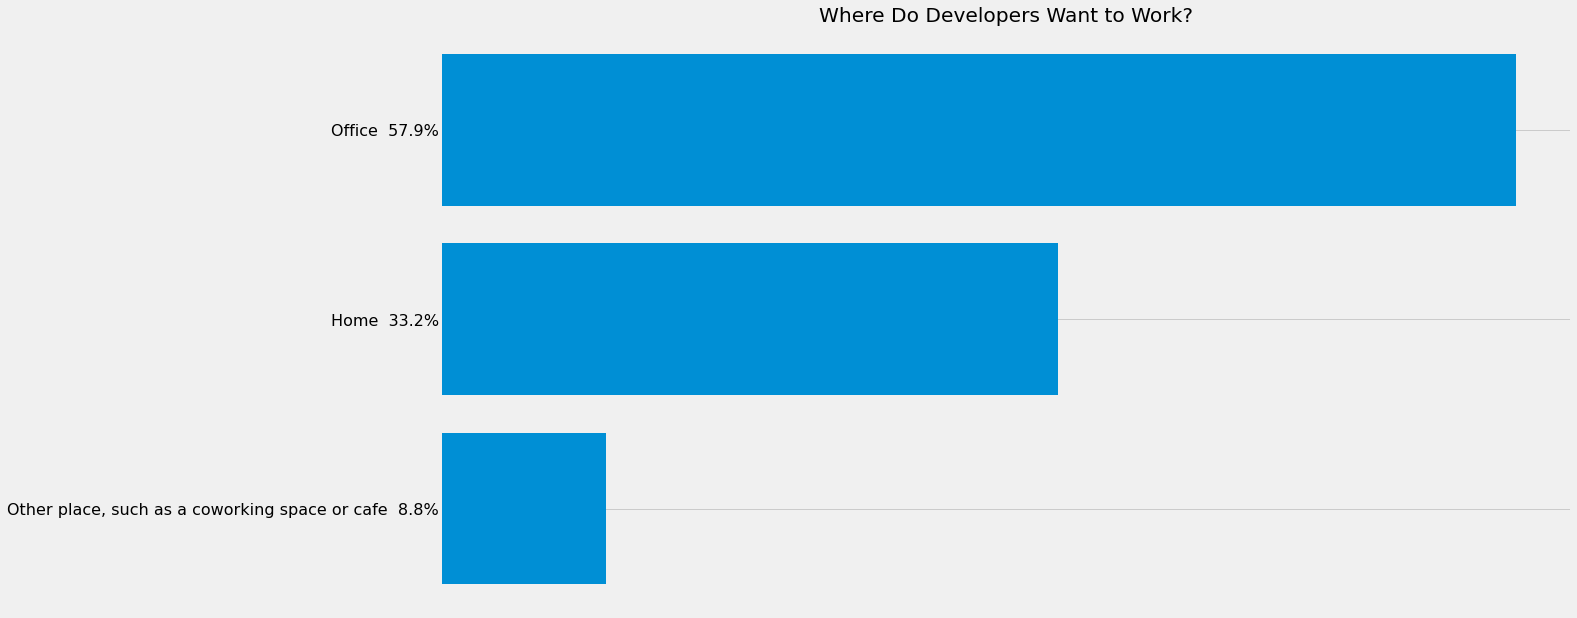

In [90]:
WorkLoc = data["WorkLoc"]  #### Call data we need
WorkLoc.dropna(inplace = True)   ##### filter and remove empty spaces


Dictionary_Distributor(WorkLoc, False) ### auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkLoc ,"fivethirtyeight", False , (18,10), "Where Do Developers Want to Work?")  


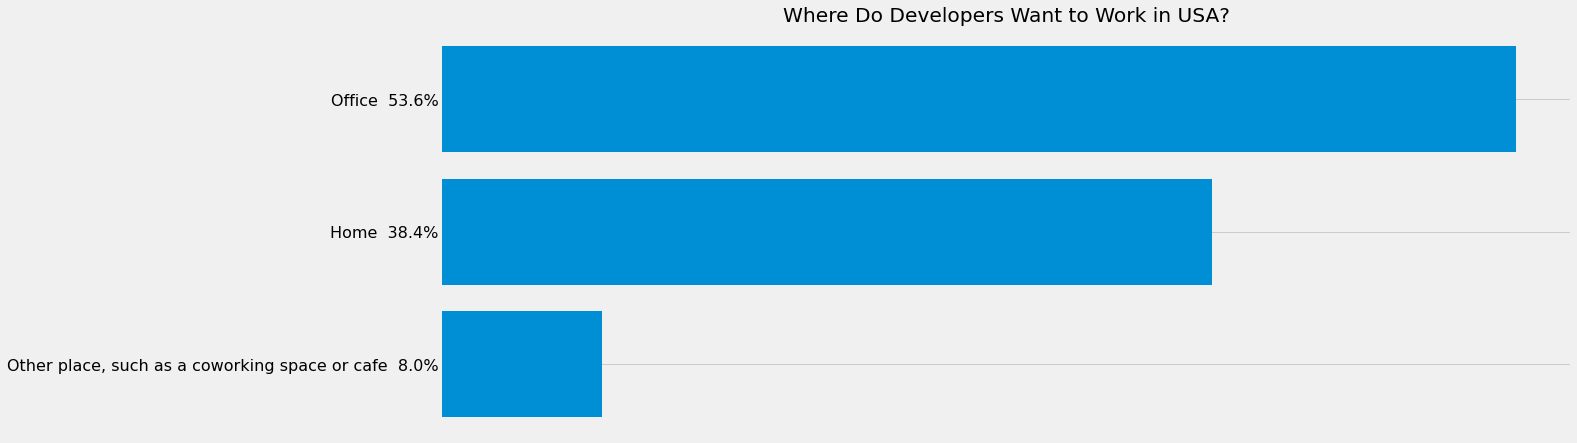

In [91]:
WorkLoc = data["WorkLoc"]  #### Call data we need
WorkLoc.dropna(inplace = True)  ##### filter and remove empty spaces

WorkLoc_USA = data[(WorkLoc!="NaN") & (data["Country"] == "United States")]  ##### Worklocation in USA
New_WorkLoc = WorkLoc_USA["WorkLoc"] ### save in a new variable

Dictionary_Distributor(New_WorkLoc, False) ### auto sort and count

######## building graph
Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in USA?")   

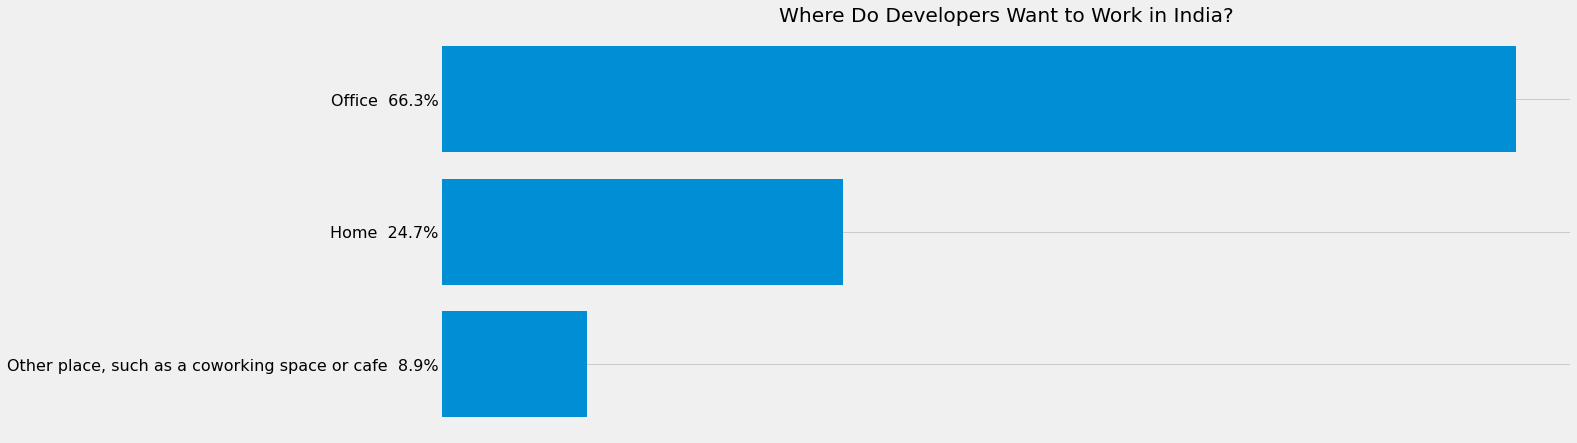

In [92]:
WorkLoc = data["WorkLoc"] #### Call data we need
WorkLoc.dropna(inplace = True)  ##### filter and remove empty spaces

WorkLoc_India = data[(WorkLoc!="NaN") & (data["Country"] == "India")]  ##### Worklocation in India
New_WorkLoc = WorkLoc_India["WorkLoc"]  ### save in a new variable

Dictionary_Distributor(New_WorkLoc, False) ### auto sort and count


###### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in India?")  

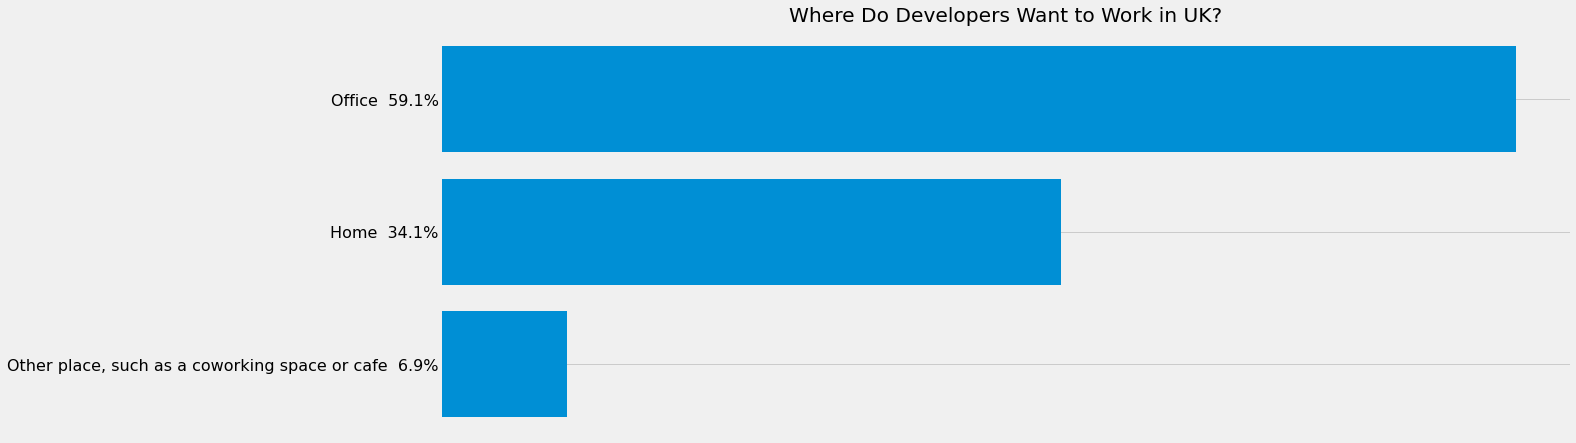

In [93]:
WorkLoc = data["WorkLoc"]  #### Call data we need
WorkLoc.dropna(inplace = True)  ##### filter and remove empty spaces


WorkLoc_UK = data[(WorkLoc!="NaN") & (data["Country"] == "United Kingdom")] ##### Worklocation in UK
New_WorkLoc = WorkLoc_UK["WorkLoc"]   ### save in a new variable

Dictionary_Distributor(New_WorkLoc, False) ### auto sort and count


####### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in UK?")   

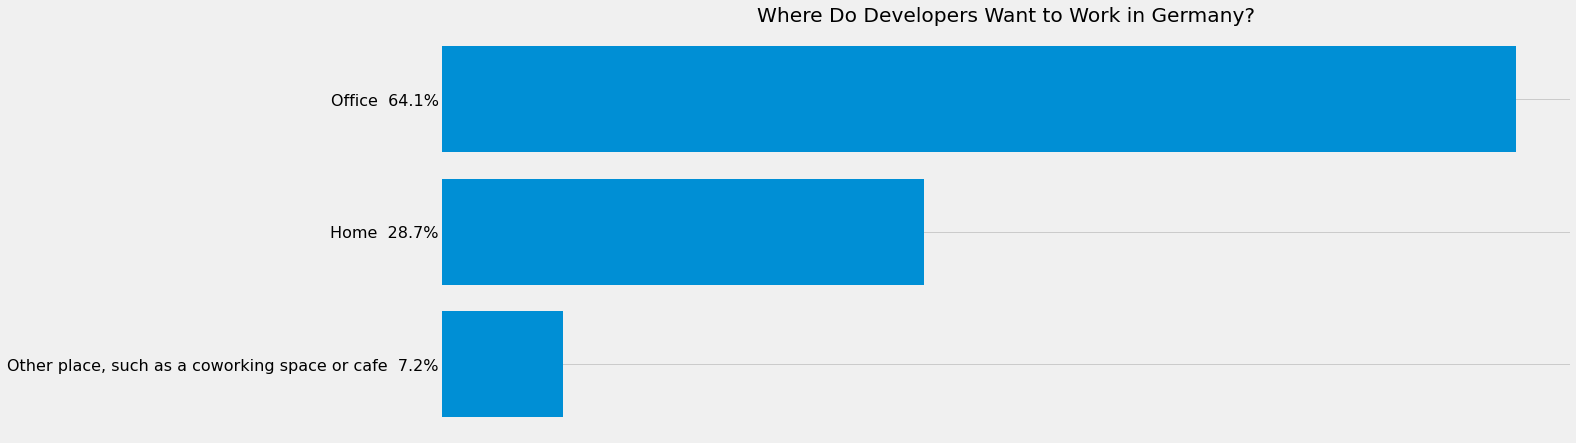

In [94]:
WorkLoc = data["WorkLoc"]   #### Call data we need
WorkLoc.dropna(inplace = True)  ##### filter and remove empty spaces

WorkLoc_Germany = data[(WorkLoc!="NaN") & (data["Country"] == "Germany")]  ##### Worklocation in Germany
New_WorkLoc = WorkLoc_Germany["WorkLoc"]  ### save in a new variable

Dictionary_Distributor(New_WorkLoc, False) ### auto sort and count


###### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in Germany?")   

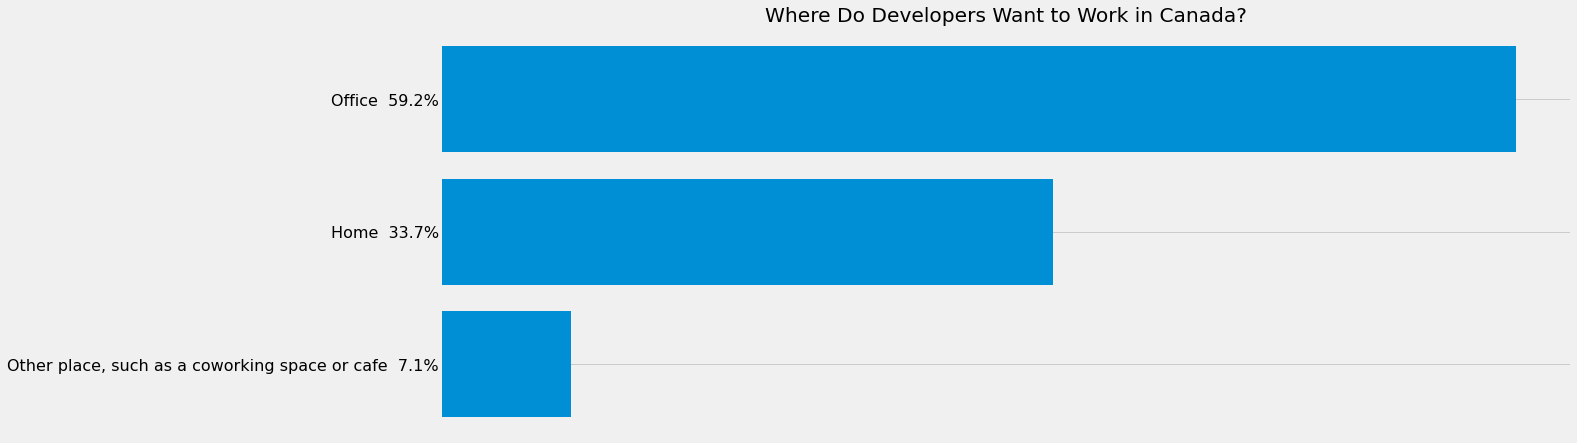

In [95]:
WorkLoc = data["WorkLoc"] #### Call data we need
WorkLoc.dropna(inplace = True)  ##### filter and remove empty spaces


WorkLoc_Canada = data[(WorkLoc!="NaN") & (data["Country"] == "Canada")]  ##### Worklocation in Canada
New_WorkLoc = WorkLoc_Canada["WorkLoc"] ### save in a new variable

Dictionary_Distributor(New_WorkLoc, False) ### auto sort and count


####### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_WorkLoc ,"fivethirtyeight", False , (18,7), "Where Do Developers Want to Work in Canada?")   

####     Development Practices

<h5 style="text-align:center; " > <b>How Structured Is the Work of Developers?

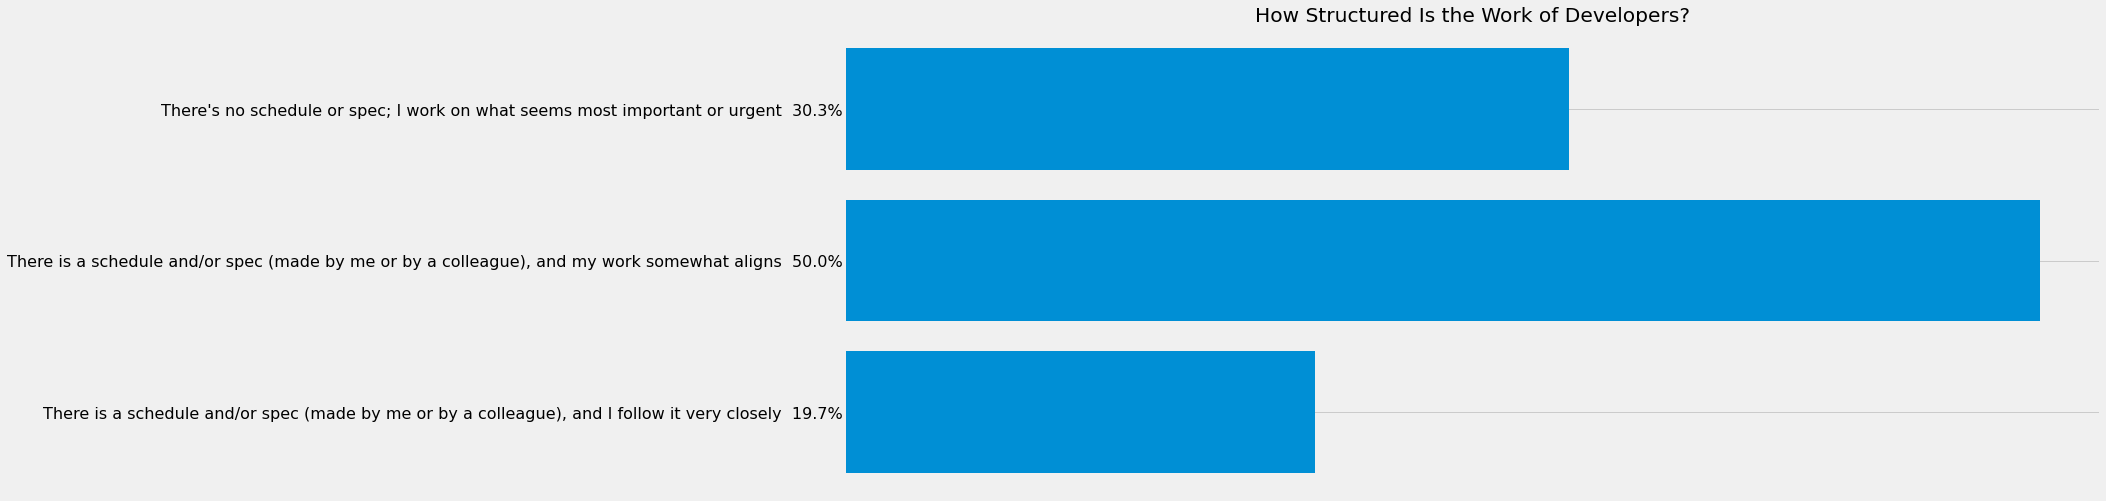

In [96]:
WorkPlan = data["WorkPlan"]  #### Call data we need
WorkPlan.dropna(inplace = True)  ##### filter and remove empty spaces

counted = Counter(WorkPlan) ###### count data

######## creating ordered list for key phrases
key_Phrases = ["There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely", "There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns", "There's no schedule or spec; I work on what seems most important or urgent"]

########## Creating empty quantity list to add elements #########
Quantity = []

####### distributing key phrases by quantity ########
for i in key_Phrases:
    Quantity.append(counted[i])

########## building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkPlan ,"fivethirtyeight", False , (20,8), "How Structured Is the Work of Developers?")  



<h5 style="text-align:center; " > <b>Greatest Challenges to Productivity

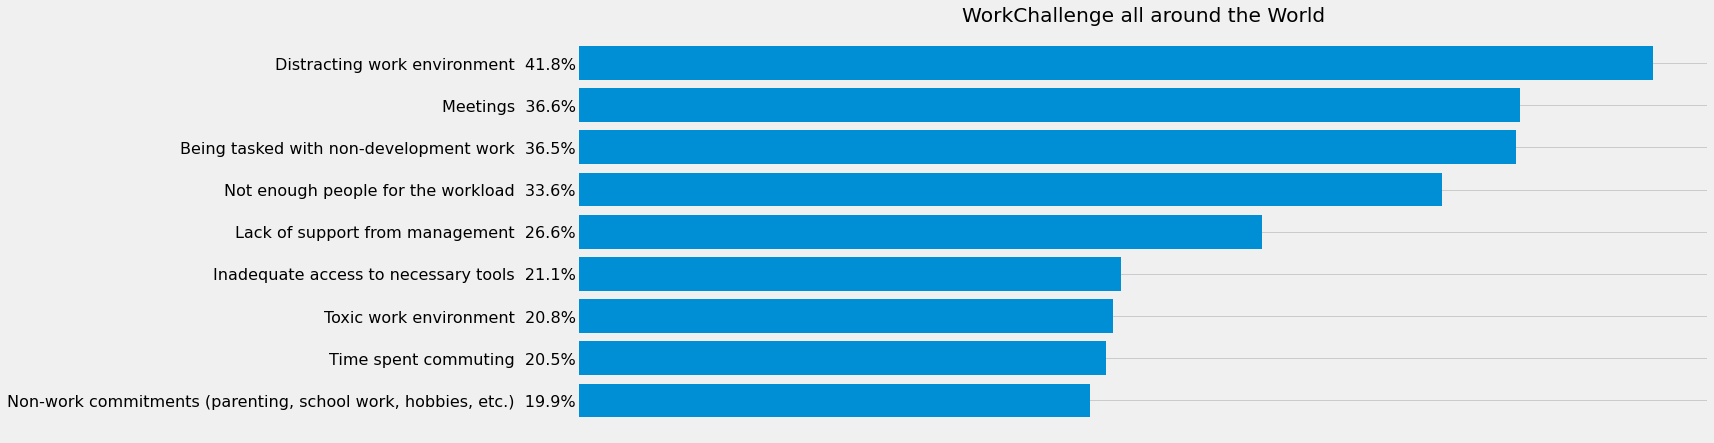

In [97]:
WorkChallenge = data["WorkChallenge"]  #### Call data we need
WorkChallenge.dropna(inplace= True)   ##### filter and remove empty spaces

WorkChallenge = WorkChallenge.str.split(';')  ### splits elements where ";" is written
list_sorter_counter(WorkChallenge)  ### Auto sort and count

##### building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge ,"fivethirtyeight", False , (18,7), "WorkChallenge all around the World")  




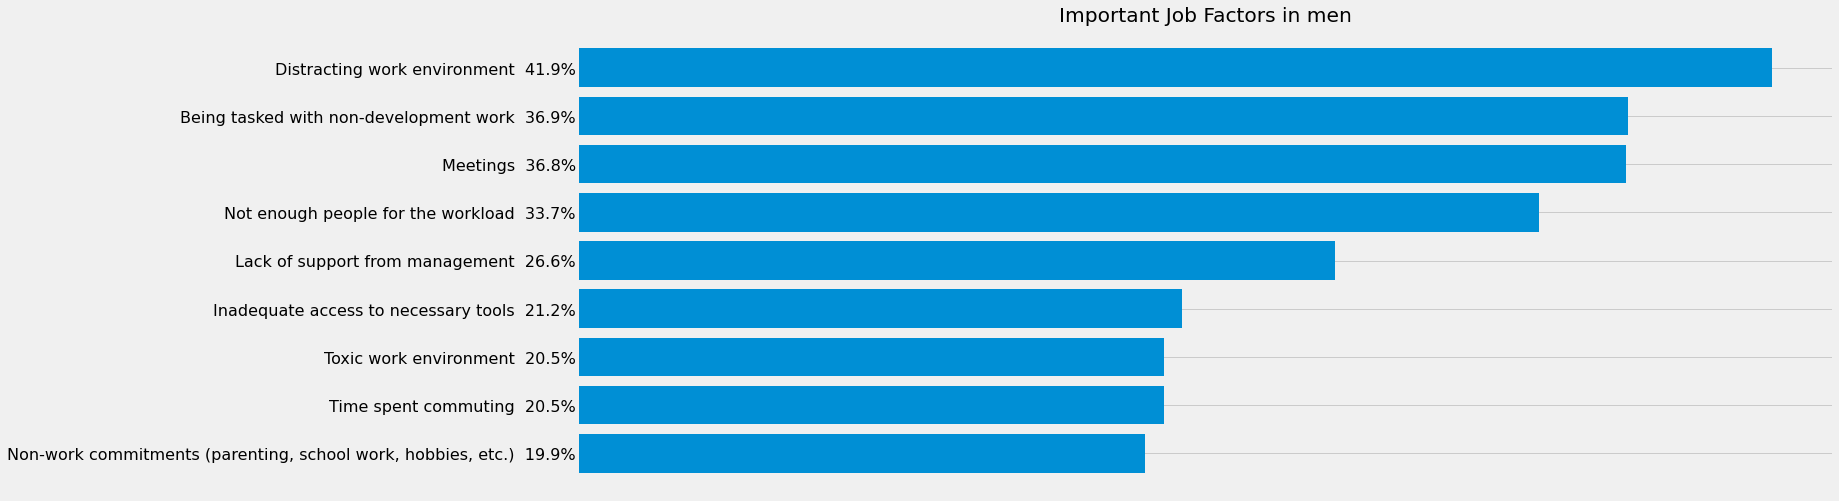

In [98]:
WorkChallenge  = data["WorkChallenge"]  #### Call data we need
WorkChallenge.dropna(inplace = True )  ##### filter and remove empty spaces

WorkChallenge_man =   data[ (WorkChallenge != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # WorkChalandge in men
WorkChallenge_man = WorkChallenge_man["WorkChallenge"] ### save in a new variable
WorkChallenge_man = WorkChallenge_man.str.split(";") #### split elements, where ";" is written

list_sorter_counter(WorkChallenge_man) ##### auto sort and count

######## Building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_man ,"fivethirtyeight", False , (20,8), "Important Job Factors in men")


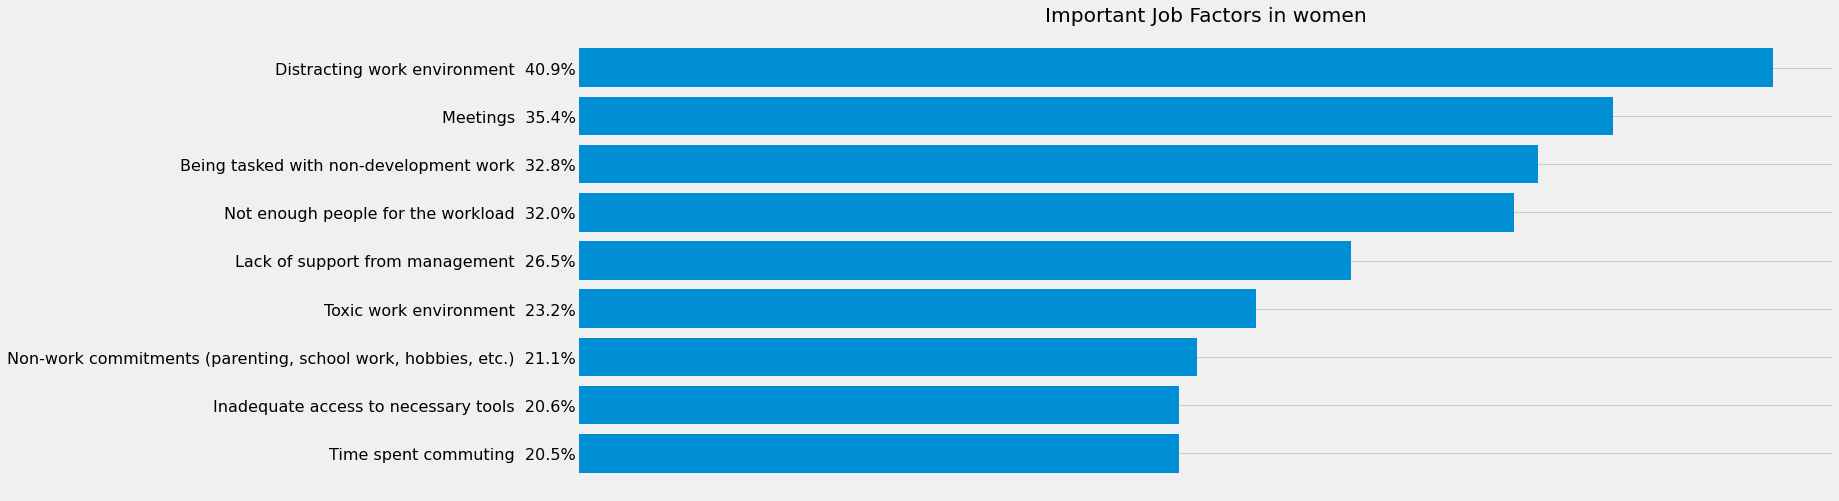

In [99]:
WorkChallenge  = data["WorkChallenge"]  ### Call data we need
WorkChallenge.dropna(inplace = True )  ##### filter and remove empty spaces

WorkChallenge_woman =   data[ (WorkChallenge != "nan") & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))] # WorkChalandge in women
WorkChallenge_woman = WorkChallenge_woman["WorkChallenge"] ### save in a new variable
WorkChallenge_woman = WorkChallenge_woman.str.split(";")  #### split elements, where ";" is written

list_sorter_counter(WorkChallenge_woman)  ##### auto sort and count

######## Building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_woman ,"fivethirtyeight", False , (20,8), "Important Job Factors in women")


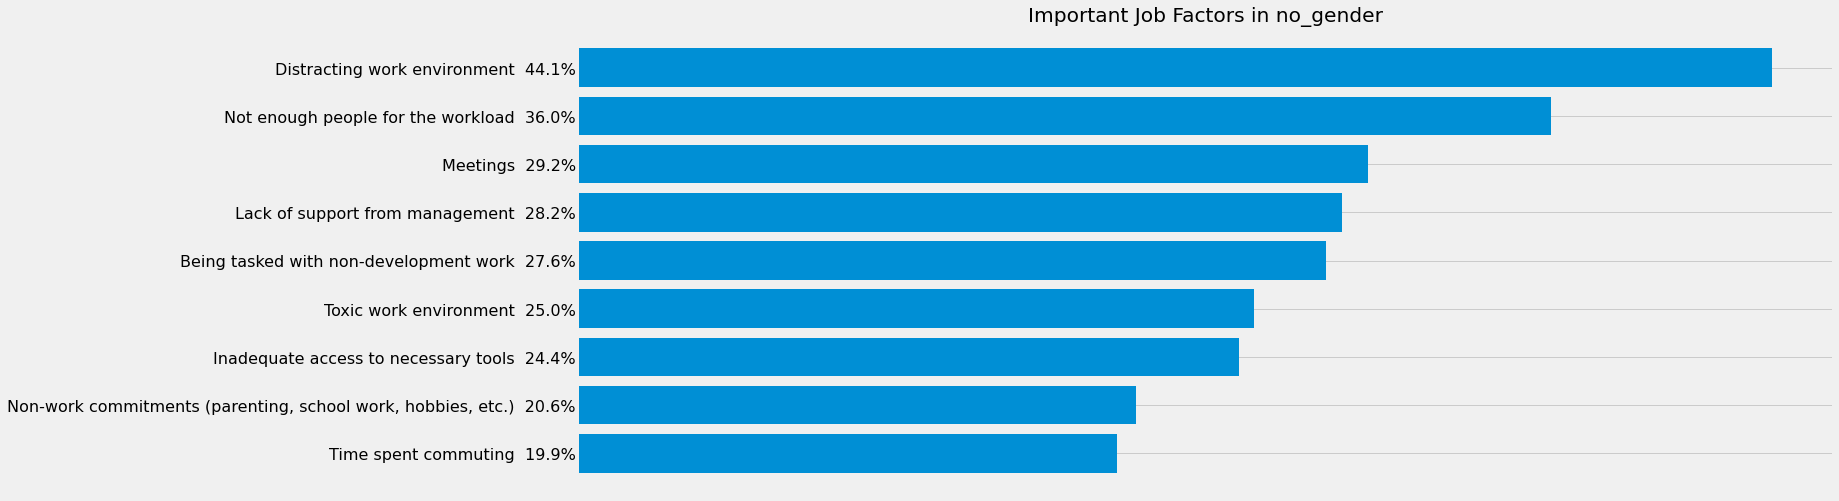

In [100]:
WorkChallenge  = data["WorkChallenge"]  ### Call data we need
WorkChallenge.dropna(inplace = True )   ##### filter and remove empty spaces

WorkChallenge_no_gender =   data[ (WorkChallenge != "nan") & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # WorkChalandge in no gender
WorkChallenge_no_gender = WorkChallenge_no_gender["WorkChallenge"]  ### save in a new variable
WorkChallenge_no_gender = WorkChallenge_no_gender.str.split(";") #### split elements, where ";" is written

list_sorter_counter(WorkChallenge_no_gender)  ##### auto sort and count

######## Building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_no_gender ,"fivethirtyeight", False , (20,8), "Important Job Factors in no_gender")


<h5 style="text-align:center; " > <b>Weighting Productivity Challenges in the US

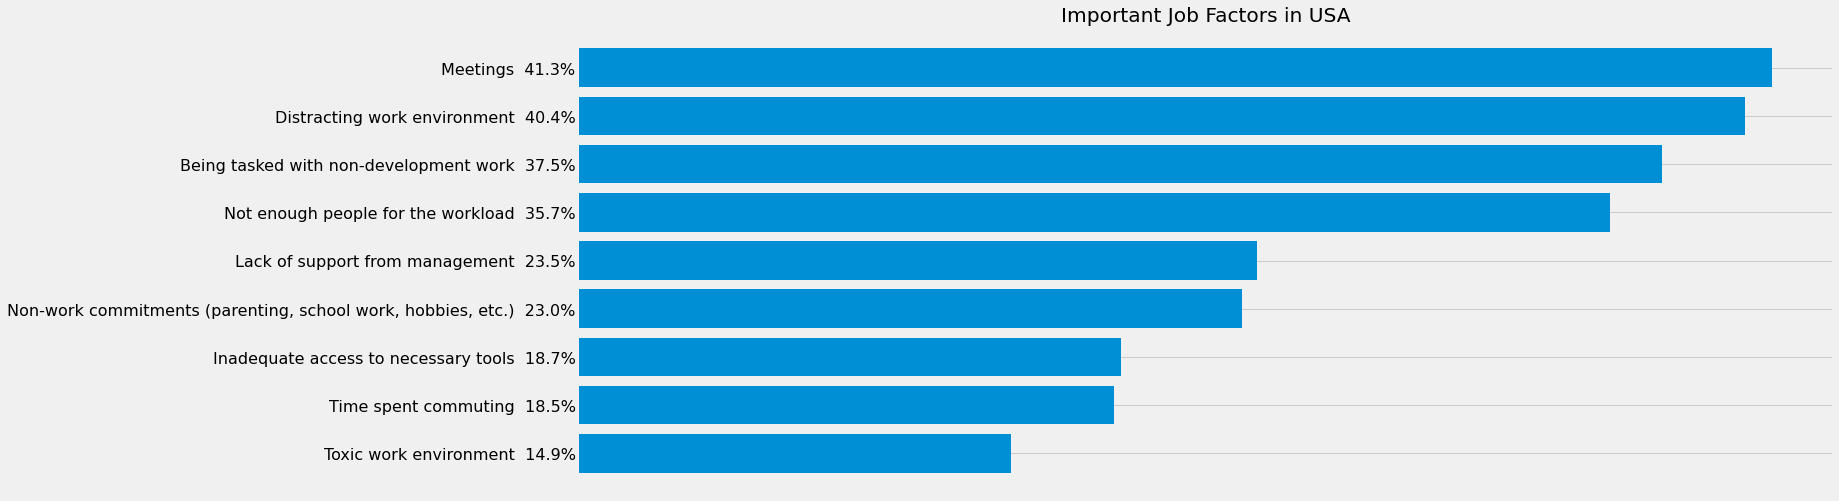

In [101]:
WorkChallenge  = data["WorkChallenge"]  ### Call data we need
WorkChallenge.dropna(inplace = True )  ##### filter and remove empty spaces
 
WorkChallenge_USA =   data[ (WorkChallenge != "nan") & (data["Country"] == "United States")] ### WorkChalandge in no gender
WorkChallenge_USA = WorkChallenge_USA["WorkChallenge"] ### save in a new variable
WorkChallenge_USA = WorkChallenge_USA.str.split(";")  #### split elements, where ";" is written

list_sorter_counter(WorkChallenge_USA) ##### auto sort and count

##### building graph
Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge_USA ,"fivethirtyeight", False , (20,8), "Important Job Factors in USA")


<h5 style="text-align:center; " > <b>Quality of Open Source Software

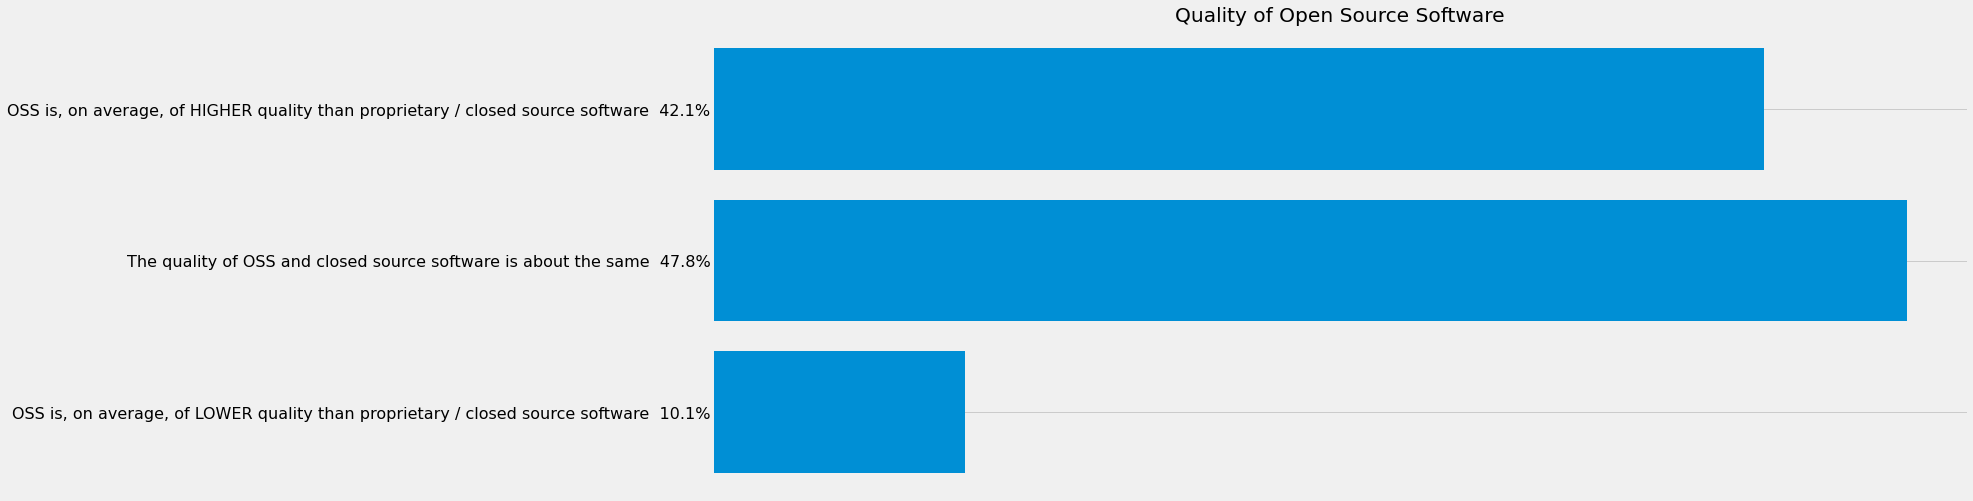

In [102]:
OpenSource = data["OpenSource"]  ### Call data we need
OpenSource.dropna(inplace = True)  ##### filter and remove empty spaces

counted  = Counter(OpenSource)  ########### count data

######## creating ordered list for key phrases
key_Phrases  =["OSS is, on average, of LOWER quality than proprietary / closed source software",
                "The quality of OSS and closed source software is about the same", 
                "OSS is, on average, of HIGHER quality than proprietary / closed source software"]

######### creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity
for i in key_Phrases:
    Quantity.append(counted[i])

######## building graph
Build_Barh_sizes( key_Phrases , Quantity, OpenSource ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")


<h5 style="text-align:center; " > <b>Code Review

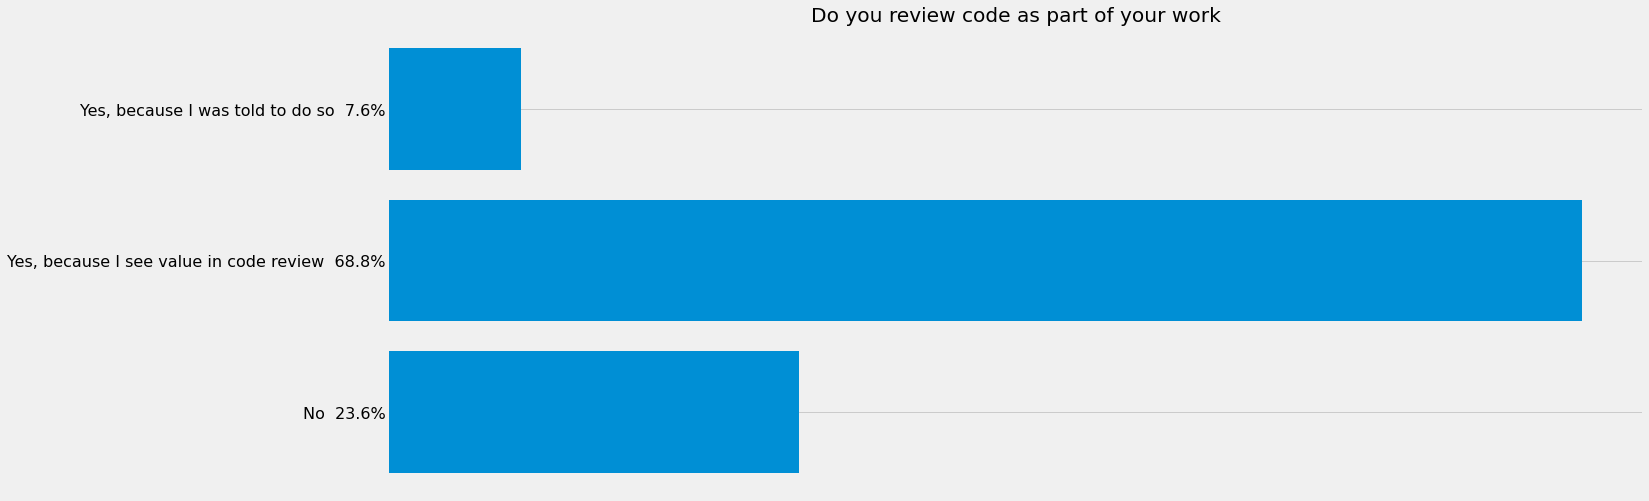

In [103]:
CodeRev = data["CodeRev"]  ### Call data we need
CodeRev.dropna(inplace = True) ##### filter and remove empty spaces

counted  = Counter(CodeRev)  ############ count data

######### creating ordered list for key phrases
key_Phrases  =["No",
                "Yes, because I see value in code review", 
                "Yes, because I was told to do so"]

########## creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity
for i in key_Phrases:
    Quantity.append(counted[i])

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, CodeRev ,"fivethirtyeight", False , (20,8), "Do you review code as part of your work")


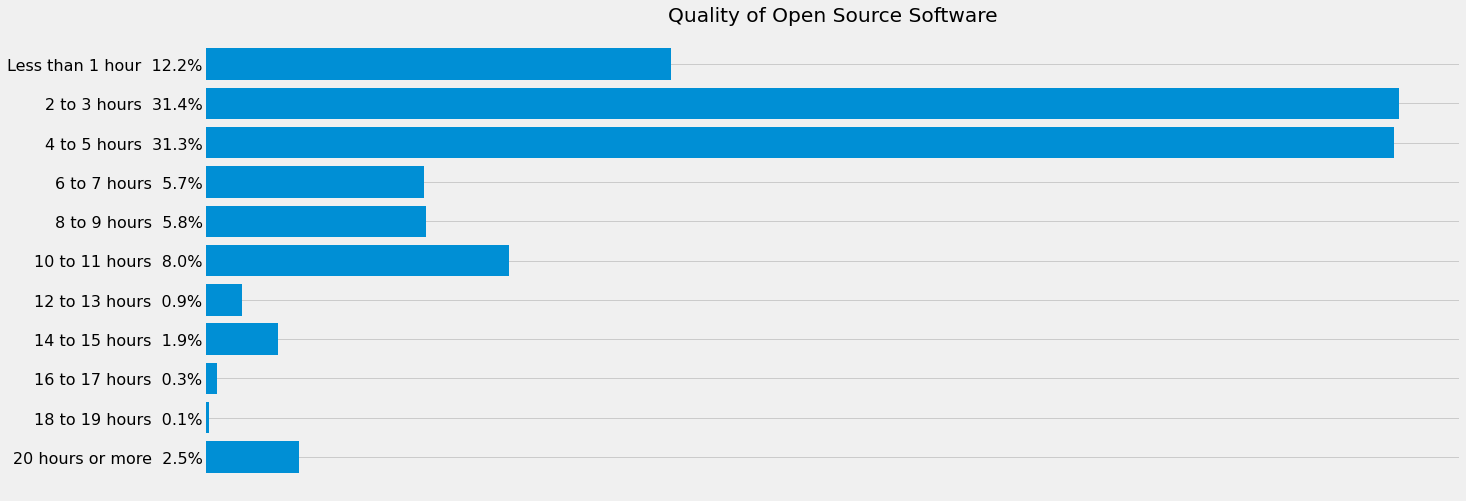

In [104]:
CodeRevHrs = data["CodeRevHrs"]  ### Call data we need
CodeRevHrs.dropna(inplace = True) ##### filter and remove empty spaces

########## creating empty lists for different hours #################
less_than_1 = []
from_2_to_3 = []
from_4_to_5 = []
from_6_to_7 = []
from_8_to_9 = []
from_10_to_11 = []
from_12_to_13 = []
from_14_to_15 = []
from_16_to_17 = []
from_18_to_19 = []
more_than_20 =[]


######## distributing hours in appropriate lists ######
### write int in front of i because we want  float elements in list to be rounded
for i in CodeRevHrs:
    if int(i) in range(0,2):
        less_than_1.append(i)
    elif int(i) in range(2,4,):
        from_2_to_3.append(i)
    elif int(i) in range(4,6):
        from_4_to_5.append(i)
    elif int(i) in range(6,8):
        from_6_to_7.append(i)
    elif int(i) in range(8,10):
        from_8_to_9.append(i)
    elif int(i) in range(10,12):
        from_10_to_11.append(i)
    elif int(i) in range(12,14):
        from_12_to_13.append(i)
    elif int(i) in range(14,16):
        from_14_to_15 .append(i)
    elif int(i) in range(16,18):
        from_16_to_17.append(i)
    elif int(i) in range(18,20):
        from_18_to_19.append(i)
    else:
        more_than_20.append(i)
        

######### distributing elements in two different lists #############
Phrases_5_to_50= ["Less than 1 hour", "2 to 3 hours", "4 to 5 hours", "6 to 7 hours", "8 to 9 hours", "10 to 11 hours", "12 to 13 hours", "14 to 15 hours", "16 to 17 hours", "18 to 19 hours", "20 hours or more"]
quantity_5_to_50 = [len(less_than_1), len(from_2_to_3), len(from_4_to_5), len(from_6_to_7), len(from_8_to_9), len(from_10_to_11), len(from_12_to_13), len(from_14_to_15), len(from_16_to_17), len(from_18_to_19), len(more_than_20)]

Phrases_5_to_50.reverse()      ###### reverse data on graph
quantity_5_to_50.reverse()

######### building graph
Build_Barh_sizes( Phrases_5_to_50 , quantity_5_to_50, CodeRevHrs ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")


<h5 style="text-align:center; " > <b>Unit Tests

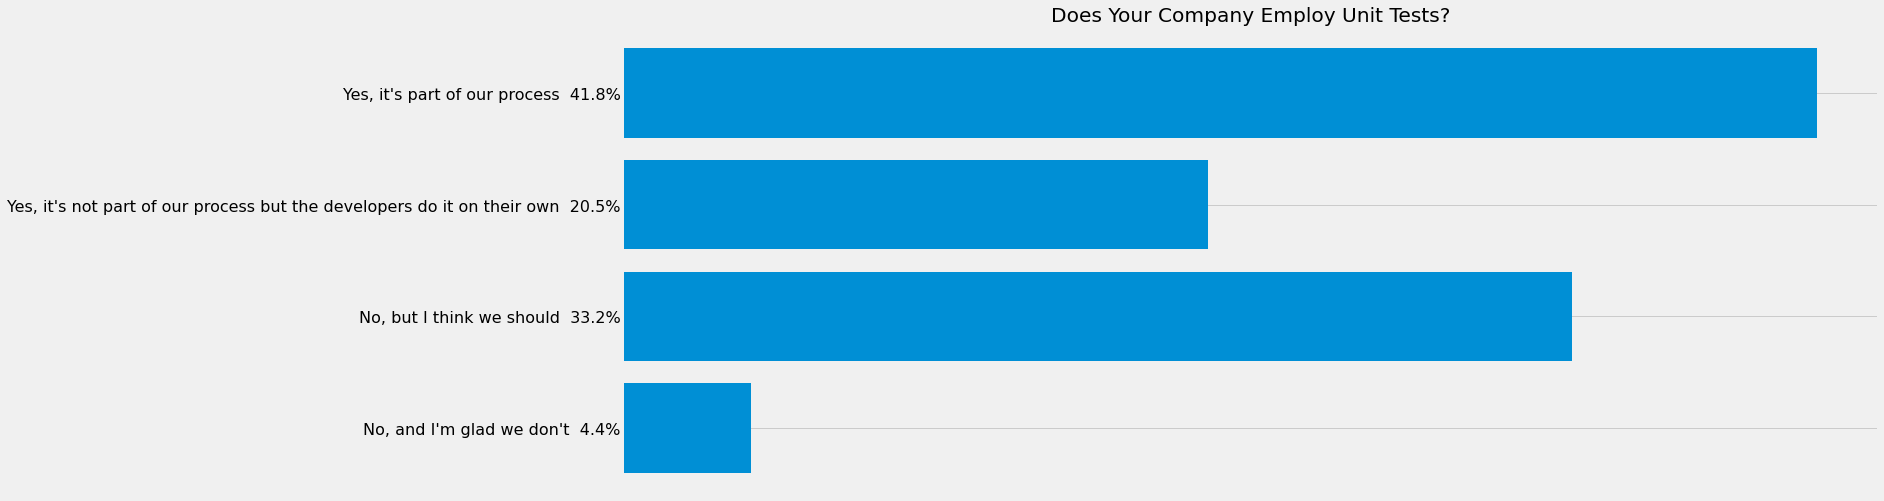

In [105]:
UnitTests = data["UnitTests"]  ### Call data we need
UnitTests.dropna(inplace = True) ##### filter and remove empty spaces

counted  = Counter(UnitTests)  ########### count data

######### creating ordered list for key phrases
key_Phrases  =["No, and I'm glad we don't",
                "No, but I think we should", 
                "Yes, it's not part of our process but the developers do it on their own",
                "Yes, it's part of our process"]
                

########## creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity
for i in key_Phrases:
    Quantity.append(counted[i])

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, UnitTests ,"fivethirtyeight", False , (20,8), "Does Your Company Employ Unit Tests?")


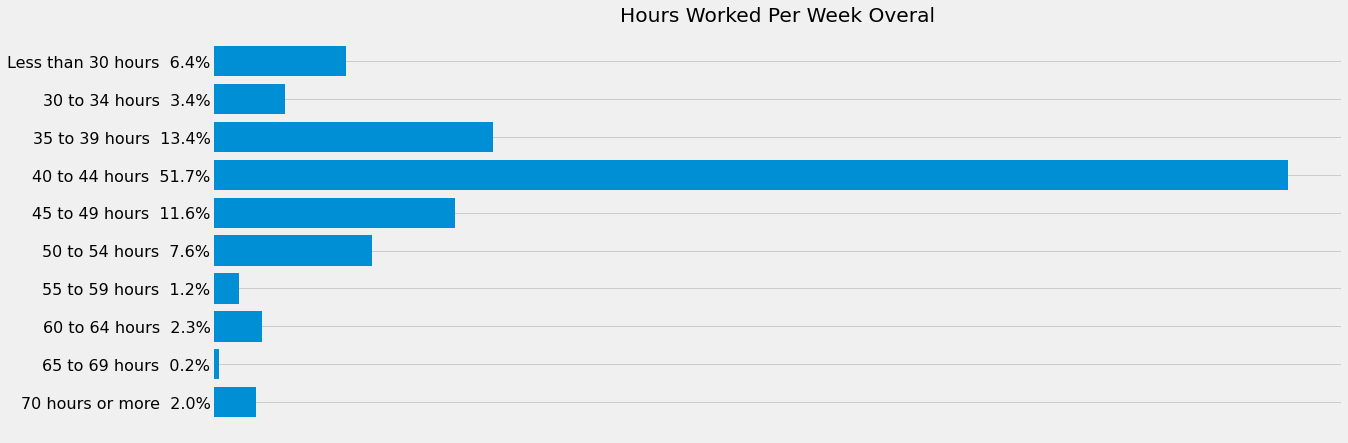

In [106]:
hours_worked_per_week = data["WorkWeekHrs"]  ### Call data we need
hours_worked_per_week.dropna(inplace =True) ##### filter and remove empty spaces

#creating the function where is written logics for sorting data
def logics_for_work_hours(hours_worked_per_week):
    #Creating empty lists with specific ages where the related data will be placed 
    less_than_30_hours = []
    thirty_to_34_hours = []
    thirtyfive_to_39_hours = []
    fourty_to_44_hours = []
    fourtyfive_to_49_hours = []
    fifty_to_54_hours = []
    fiftyfive_to_59_hours = []
    sixty_to_64_hours = []
    sixtyfive_to_69_hours = []
    seventy_hours_or_more = []


    #adding data to related lists 
    for i in hours_worked_per_week:
        if int(i) in list(range(0,30)):
            less_than_30_hours.append(i)
        elif int(i) in list(range(30,35)):
            thirty_to_34_hours.append(i)
        elif int(i) in list(range(35,40)):
            thirtyfive_to_39_hours.append(i)
        elif int(i) in list(range(40,45)):
            fourty_to_44_hours.append(i)
        elif int(i) in list(range (45,50)):
            fourtyfive_to_49_hours.append(i)
        elif int(i) in list(range(50,55)):
            fifty_to_54_hours.append(i)
        elif int(i) in list(range (55,60)):
            fiftyfive_to_59_hours.append(i)
        elif int(i) in list(range (60,65)):
            sixty_to_64_hours.append(i)
        elif int(i) in list(range (65,70)):
            sixtyfive_to_69_hours.append(i)
        else:
            seventy_hours_or_more.append(i)

    #defining length of the lists that have been created after adding data 
    len_less_than_30_hours = len(less_than_30_hours)
    len_thirty_to_34_hours = len(thirty_to_34_hours)
    len_thirtyfive_to_39_hours = len(thirtyfive_to_39_hours)
    len_fourty_to_44_hours = len(fourty_to_44_hours)
    len_fourtyfive_to_49_hours = len(fourtyfive_to_49_hours) 
    len_fifty_to_54_hours = len(fifty_to_54_hours)
    len_fiftyfive_to_59_hours = len(fiftyfive_to_59_hours)
    len_sixty_to_64_hours = len(sixty_to_64_hours)
    len_sixtyfive_to_69_hours = len(sixtyfive_to_69_hours)
    len_seventy_hours_or_more = len(seventy_hours_or_more)

    global key_Phrases  #declaring key phrases as global 
    global Quantity     #declaring Quantity as global 

    #writing the key phrases and quantity iformation by hand 
    # where the key phrases are presented as list with specific ages in it 
    #and quantity is the list with the length of the lists where the data was added 
    key_Phrases = ["Less than 30 hours", "30 to 34 hours", "35 to 39 hours", "40 to 44 hours", "45 to 49 hours", "50 to 54 hours",
                    "55 to 59 hours", "60 to 64 hours", "65 to 69 hours", "70 hours or more"]
    Quantity = [len_less_than_30_hours, len_thirty_to_34_hours, len_thirtyfive_to_39_hours, len_fourty_to_44_hours, 
                len_fourtyfive_to_49_hours, len_fifty_to_54_hours, len_fiftyfive_to_59_hours, len_sixty_to_64_hours,
                len_sixtyfive_to_69_hours, len_seventy_hours_or_more]

#calling the function to sort the data
logics_for_work_hours(hours_worked_per_week)

#reversing key phrases and quantity
key_Phrases.reverse()
Quantity.reverse()

######## building graph
Build_Barh_sizes(key_Phrases, Quantity, hours_worked_per_week, "fivethirtyeight", False , (18,7), "Hours Worked Per Week Overal") 

## Community

<h5 style="text-align:center; " > <b>Visiting Stack Overflow

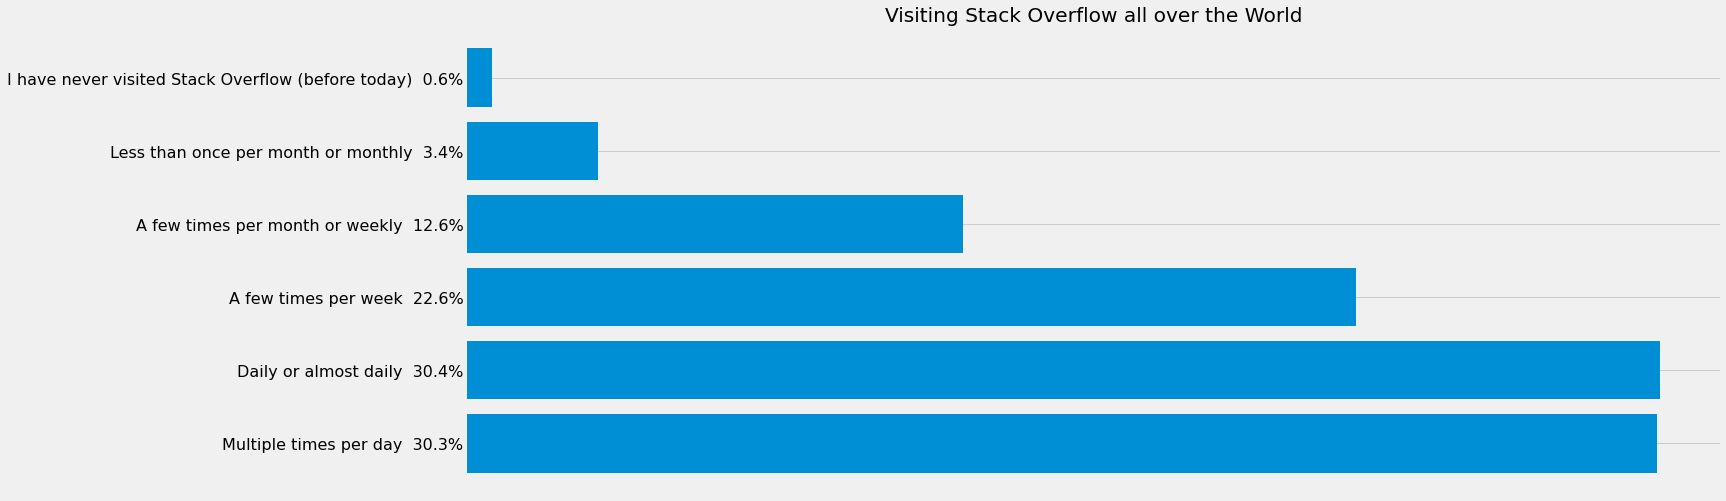

In [107]:
SOVisitFreq = data["SOVisitFreq"]  ### Call data we need
SOVisitFreq	.dropna(inplace = True) ##### filter and remove empty spaces



counted  = Counter(SOVisitFreq)  ########### Count data

######### creating ordered list for key phrases
key_Phrases  =["I have never visited Stack Overflow (before today)",
                "Less than once per month or monthly", 
                "A few times per month or weekly",
                "A few times per week",
                "Daily or almost daily",
                "Multiple times per day"
                ]
                

########## creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])

####### reversing data on graph
key_Phrases.reverse()
Quantity.reverse()

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (20,8), "Visiting Stack Overflow all over the World")


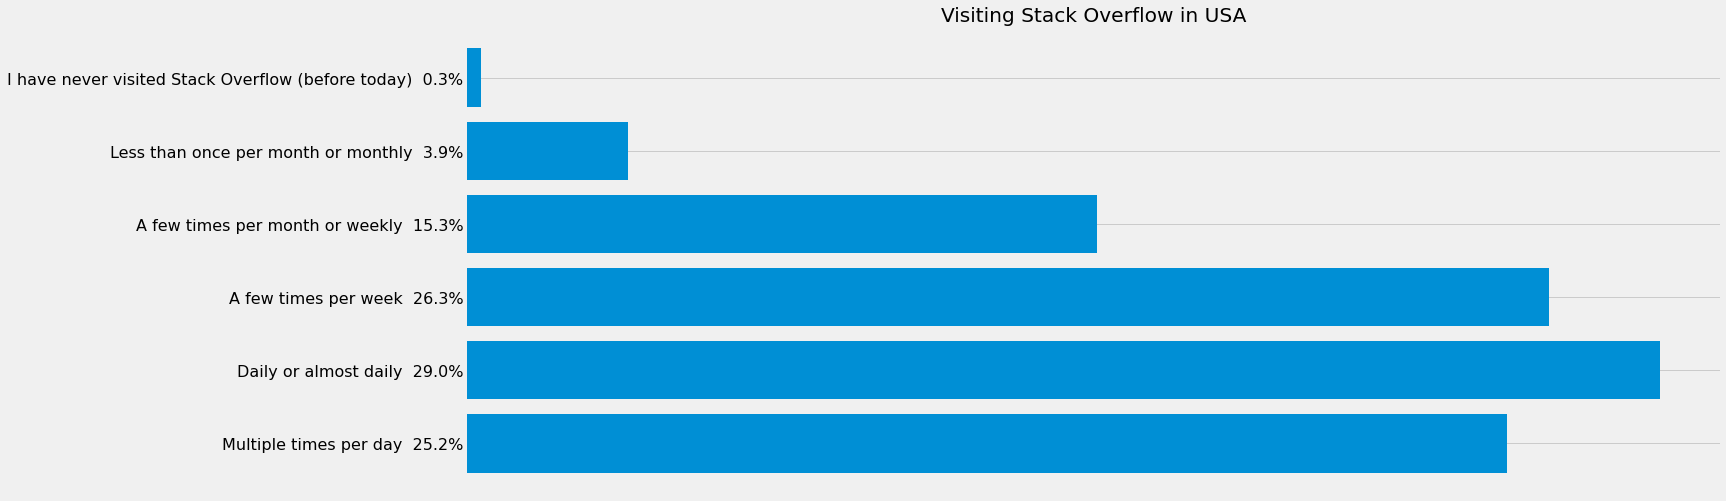

In [108]:
SOVisitFreq = data["SOVisitFreq"]  ### Call data we need
SOVisitFreq	.dropna(inplace = True)  ##### filter and remove empty spaces

SOVisitFreq_USA = data[(SOVisitFreq!="NaN") & (data["Country"] == "United States")]  ####SOVisitFreq in USA
New_SOVisitFreq = SOVisitFreq_USA["SOVisitFreq"] ### save in a new variable

counted  = Counter(New_SOVisitFreq)  ######### Count data #####

######### creating ordered list for key phrases ######
key_Phrases  =["I have never visited Stack Overflow (before today)",
                "Less than once per month or monthly", 
                "A few times per month or weekly",
                "A few times per week",
                "Daily or almost daily",
                "Multiple times per day"
                ]
                

########## creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])

###### reversing data on graph
key_Phrases.reverse()
Quantity.reverse()

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, New_SOVisitFreq ,"fivethirtyeight", False , (20,8), "Visiting Stack Overflow in USA")


<h5 style="text-align:center; " > <b>When Did You First Visit Stack Overflow?


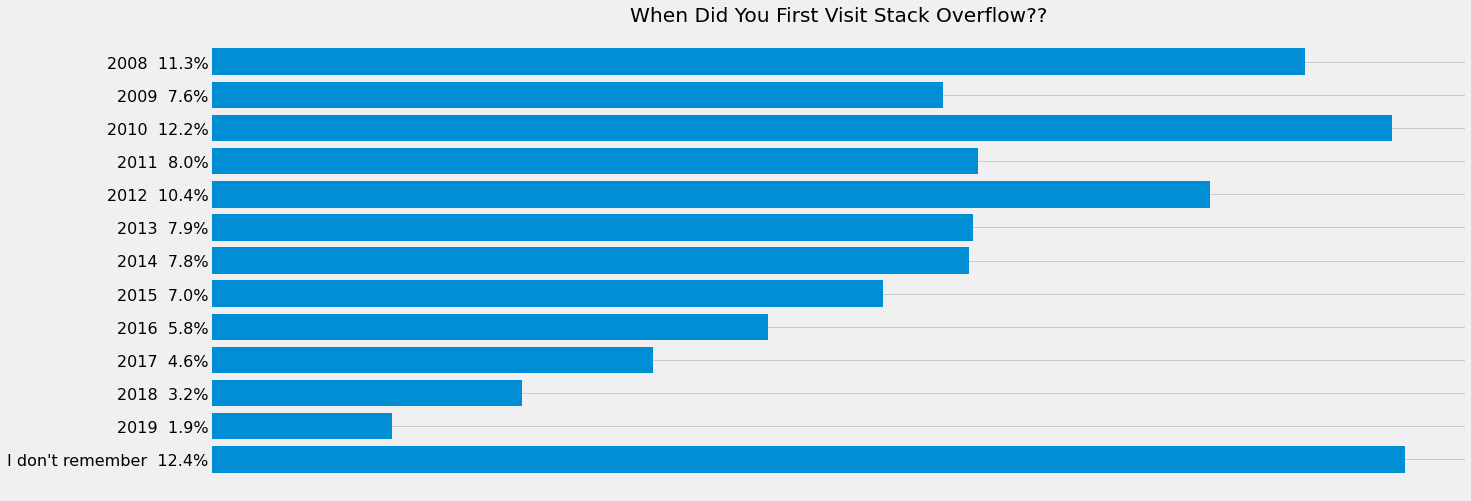

In [109]:
SOVisit1st = data["SOVisit1st"]  ### Call data we need
SOVisit1st.dropna(inplace = True)  ##### filter and remove empty spaces

counted  = Counter(SOVisit1st) ######### Count data #####

########## creating ordered list for key phrases ######
key_Phrases  =["I don't remember", "2019", "2018", "2017", "2016", "2015", "2014",
                "2013", "2012", "2011", "2010", "2009", "2008" ]
                

########## creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



###### building graph
Build_Barh_sizes( key_Phrases , Quantity, SOVisit1st ,"fivethirtyeight", False , (20,8), "When Did You First Visit Stack Overflow??")


<h5 style="text-align:center; " > <b>How Many Participants Have a Stack Overflow Account?

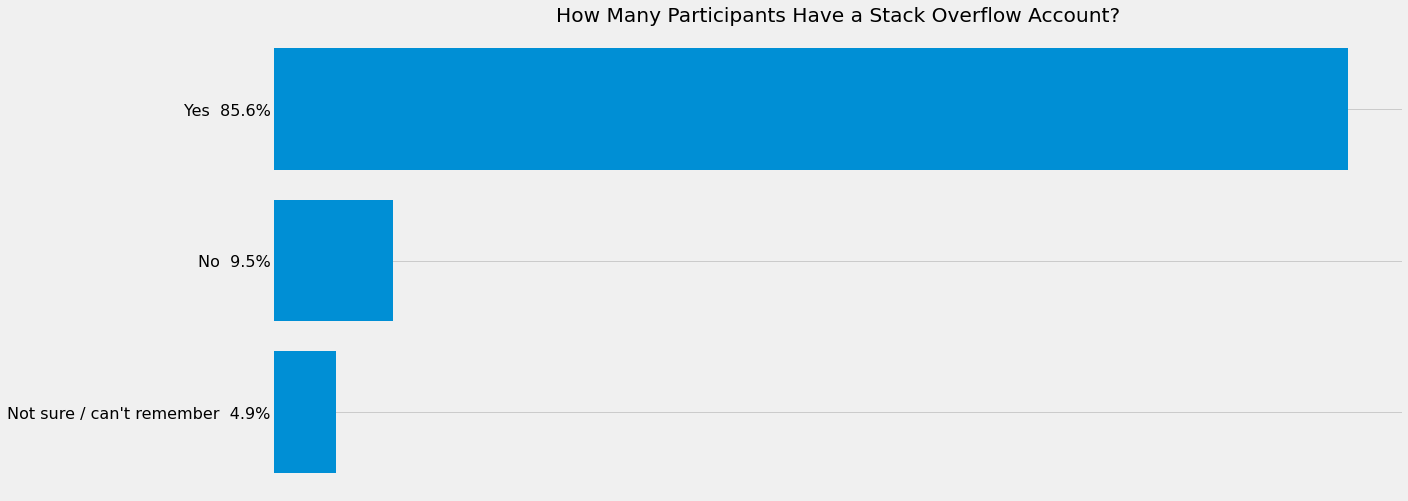

In [110]:
SOAccount = data["SOAccount"] ### Call data we need
SOAccount.dropna(inplace = True) ##### filter and remove empty spaces

Dictionary_Distributor(SOAccount, False) ### auto sort and count

####### building graph
Build_Barh_sizes( key_Phrases , Quantity, SOAccount ,"fivethirtyeight", False , (18,8), "How Many Participants Have a Stack Overflow Account?")   


<h5 style="text-align:center; " > <b>Why Do Developers Visit Stack Overflow?

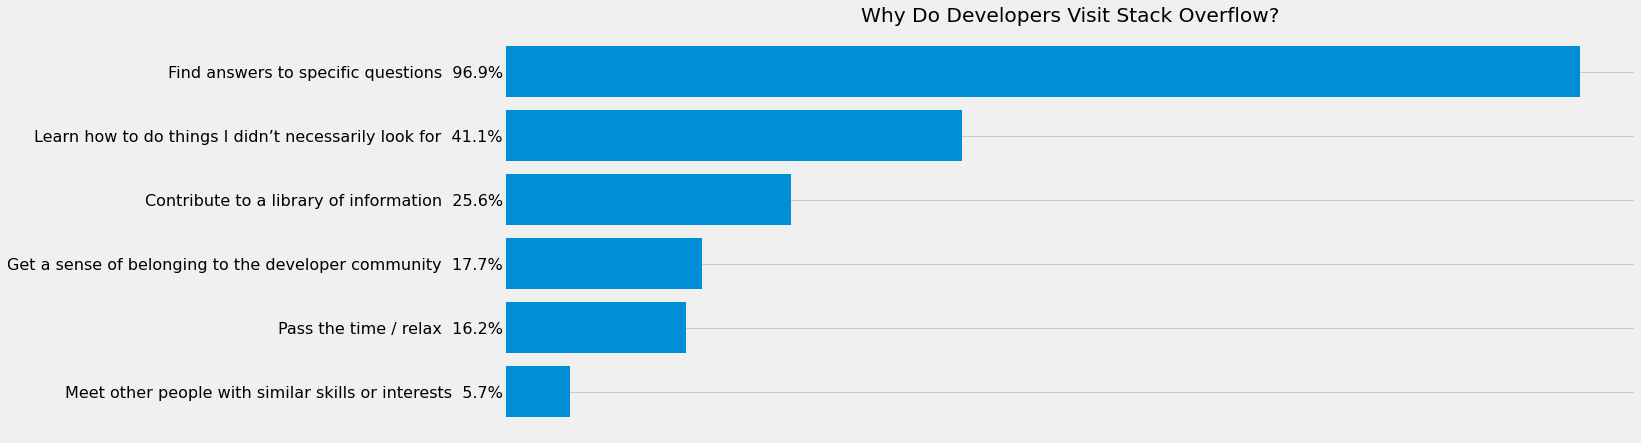

In [111]:
SOVisitTo = data["SOVisitTo"]  ### Call data we need
SOVisitTo.dropna(inplace = True) ##### filter and remove empty spaces

SOVisitTo = SOVisitTo.str.split(';')  # split elements, where ";" is written
list_sorter_counter(SOVisitTo)  ### Auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, SOVisitTo ,"fivethirtyeight", False , (18,7), "Why Do Developers Visit Stack Overflow?")  


<h5 style="text-align:center; " > <b>Finding Answers on Stack Overflow

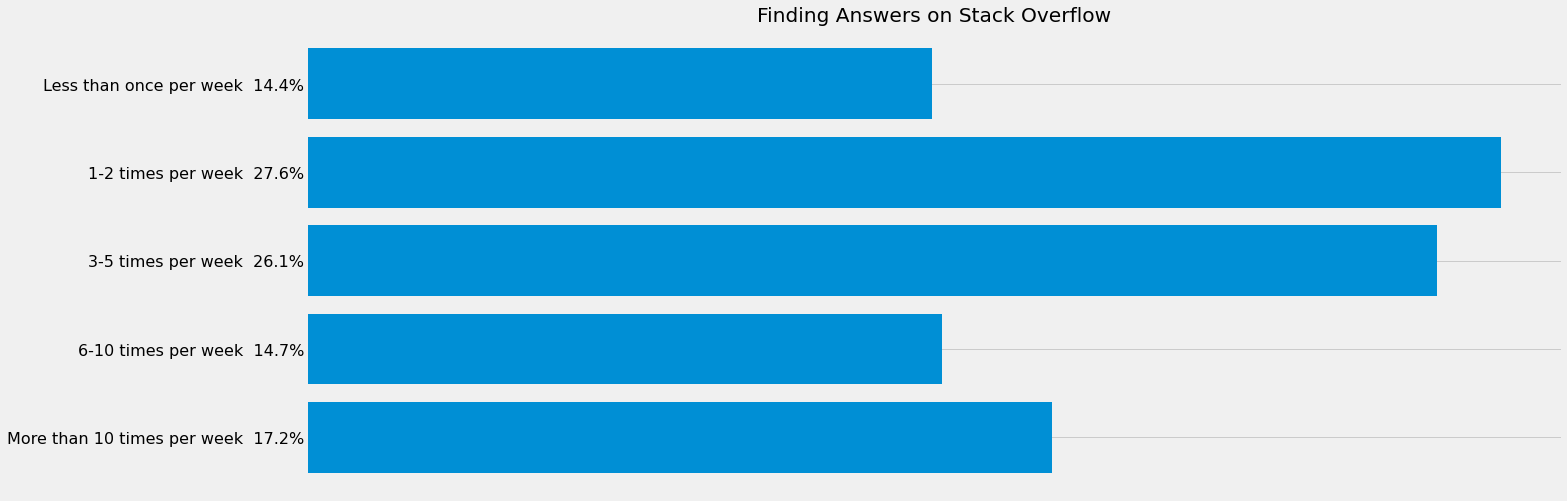

In [112]:
SOFindAnswer = data["SOFindAnswer"]  ### Call data we need
SOFindAnswer.dropna(inplace = True) ##### filter and remove empty spaces

counted  = Counter(SOFindAnswer)  ########### count data

########### creating ordered list for key phrases ######
key_Phrases  =["More than 10 times per week", "6-10 times per week", "3-5 times per week",
                "1-2 times per week", "Less than once per week" ]
                

########## creating empty list for quantity to add data #######
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



######## building graph
Build_Barh_sizes( key_Phrases , Quantity, SOFindAnswer ,"fivethirtyeight", False , (20,8), "Finding Answers on Stack Overflow")


<h5 style="text-align:center; " > <b>Comparing Stack Overflow to Other Resources

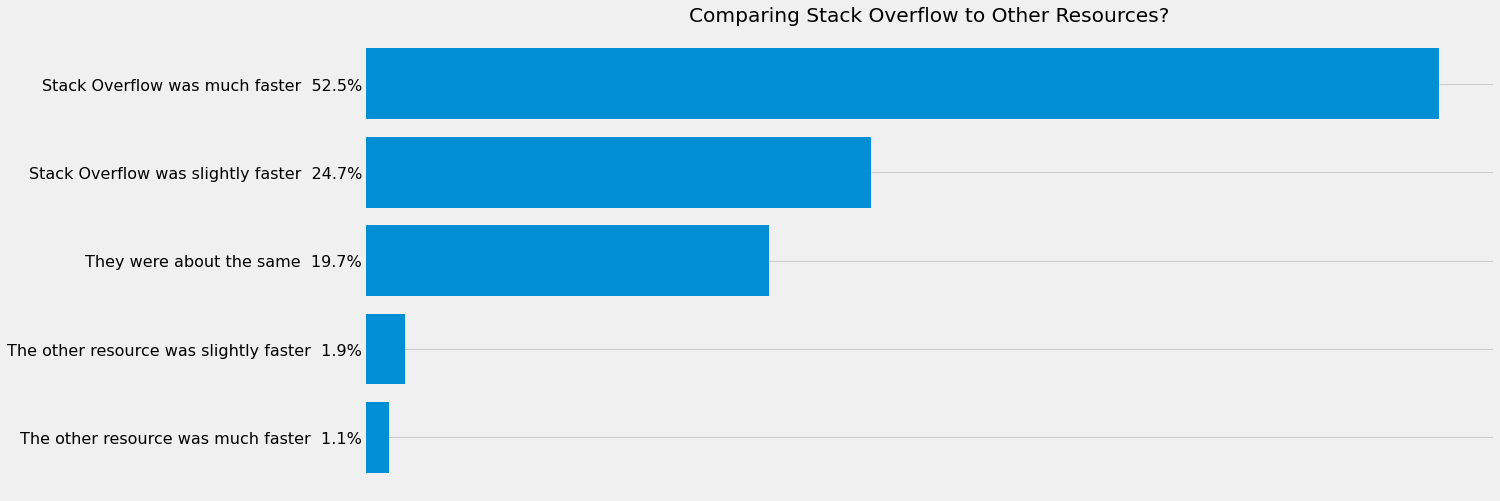

In [113]:
SOTimeSaved = data["SOTimeSaved"]  ##### Call data we need
SOTimeSaved.dropna(inplace = True)  ##### filter and remove empty spaces

Dictionary_Distributor(SOTimeSaved, False)  #### Auto sort and count

###### building graph
Build_Barh_sizes( key_Phrases , Quantity, SOTimeSaved ,"fivethirtyeight", False , (18,8), "Comparing Stack Overflow to Other Resources?")   


<h5 style="text-align:center; " > <b>How Much Time Does Stack Overflow Save Developers?

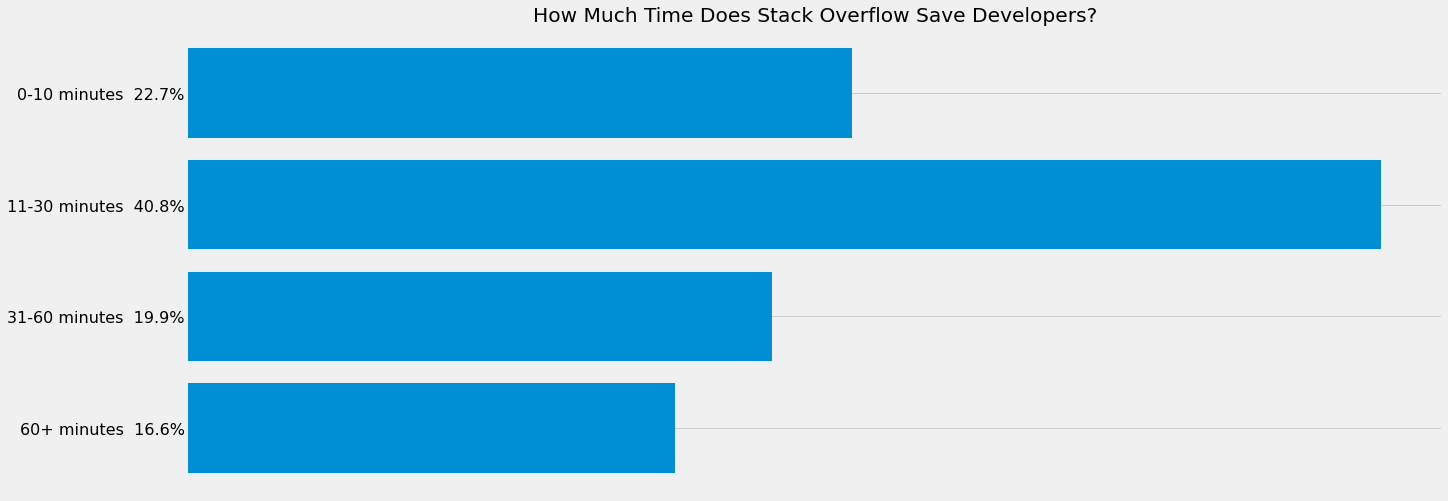

In [114]:
SOHowMuchTime = data["SOHowMuchTime"]  ##### Call data we need
SOHowMuchTime.dropna(inplace = True)  ##### filter and remove empty spaces

counted  = Counter(SOHowMuchTime)  #### Count data

########### creating ordered list for key phrases ######
key_Phrases  =["60+ minutes", "31-60 minutes", "11-30 minutes",
                "0-10 minutes" ]
                

########## creating empty list for quantity to add data ########
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



##### Buiding graph
Build_Barh_sizes( key_Phrases , Quantity, SOHowMuchTime ,"fivethirtyeight", False , (20,8), "How Much Time Does Stack Overflow Save Developers?")


####  Engaging Together


<h5 style="text-align:center; " > <b>How Often Do Developers Participate on Stack Overflow?

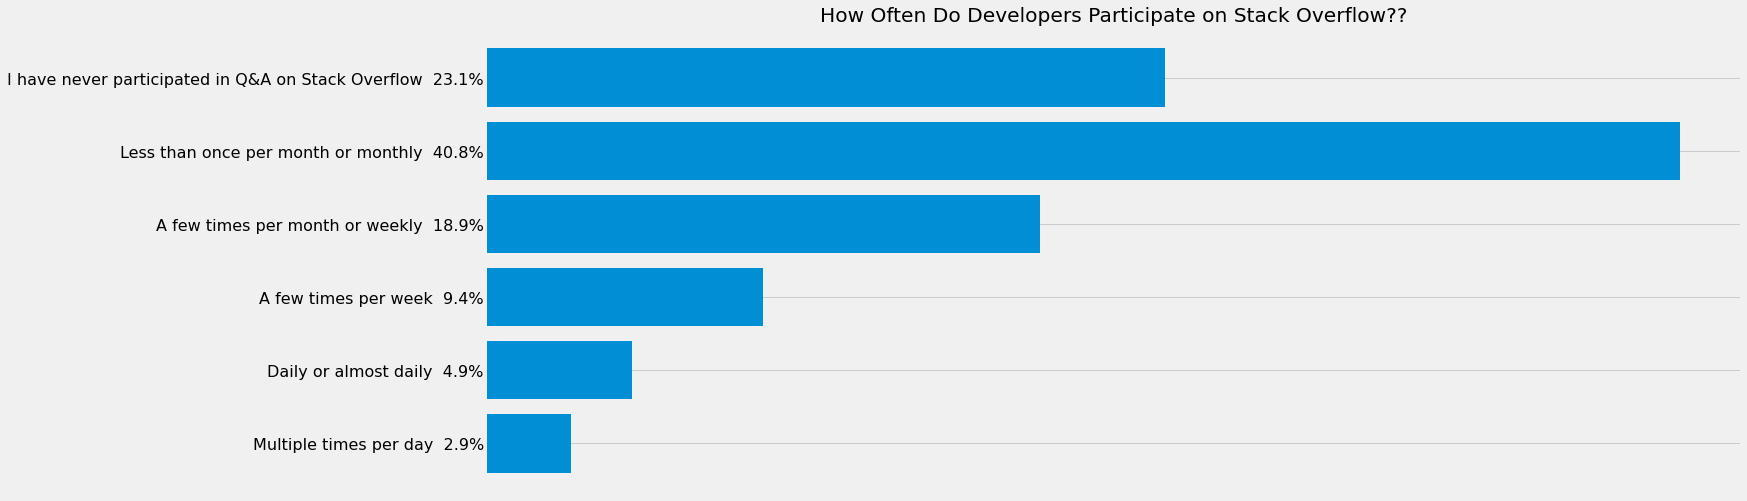

In [115]:
SOPartFreq = data["SOPartFreq"] ##### Call data we need
SOPartFreq.dropna(inplace = True)  ##### filter and remove empty spaces

counted  = Counter(SOPartFreq)  #### Count data


########### creating ordered list for key phrases ######
key_Phrases  =["Multiple times per day", "Daily or almost daily", "A few times per week",
                "A few times per month or weekly", "Less than once per month or monthly",
                "I have never participated in Q&A on Stack Overflow" ]

########## creating empty list for quantity to add data ########
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



###### building graph
Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (20,8), "How Often Do Developers Participate on Stack Overflow??")       
                                                          

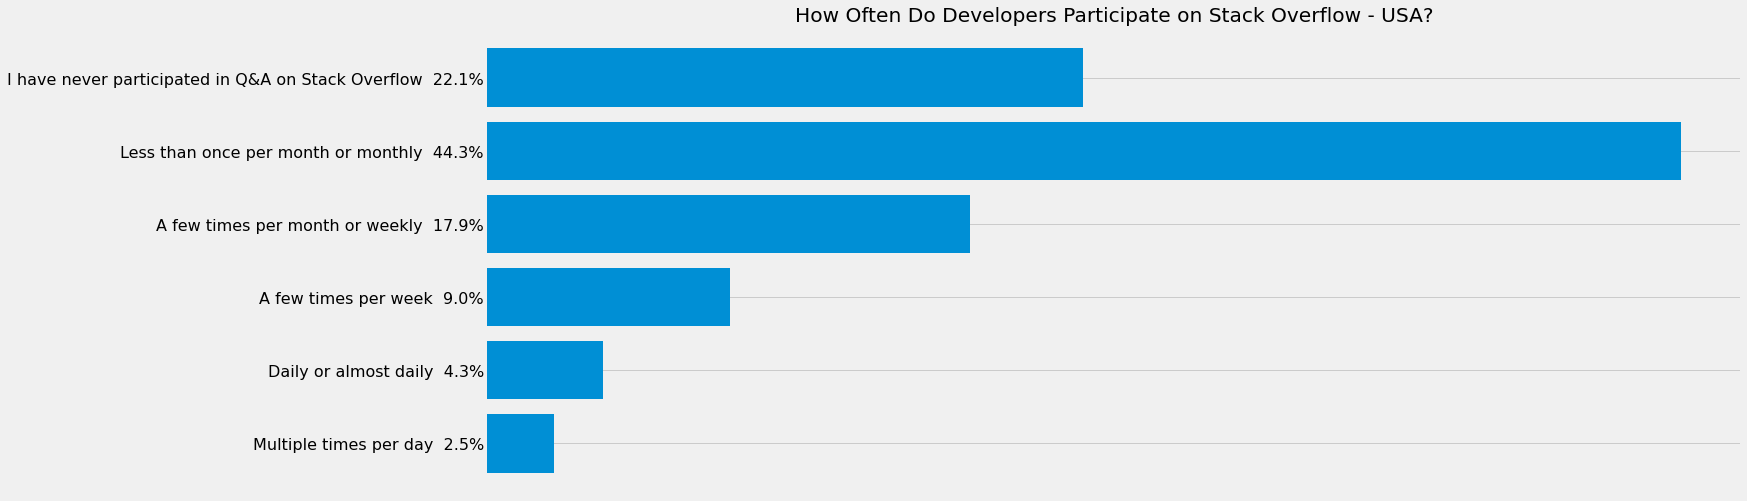

In [116]:
SOPartFreq = data["SOPartFreq"]  ##### Call data we need
SOPartFreq.dropna(inplace = True) #### filter and remove empty spaces

SOPartFreq_USA = data[ (SOPartFreq != "nan") & (data["Country"] == "United States")] ###### SOPartFreq in USA
New_SOPartFreq_USA = SOPartFreq_USA["SOPartFreq"] ### save in a new variable

counted  = Counter(New_SOPartFreq_USA)  ########### count data ##

########### creating ordered list for key phrases ######
key_Phrases  =["Multiple times per day", "Daily or almost daily", "A few times per week",
                "A few times per month or weekly", "Less than once per month or monthly",
                "I have never participated in Q&A on Stack Overflow" ]

########## creating empty list for quantity to add data ########
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



####### build graph
Build_Barh_sizes( key_Phrases , Quantity, New_SOPartFreq_USA ,"fivethirtyeight", False , (20,8), "How Often Do Developers Participate on Stack Overflow - USA?")       
                                                          

<h5 style="text-align:center; " > <b>Do Developers Consider Themselves Part of the Stack Overflow Community?

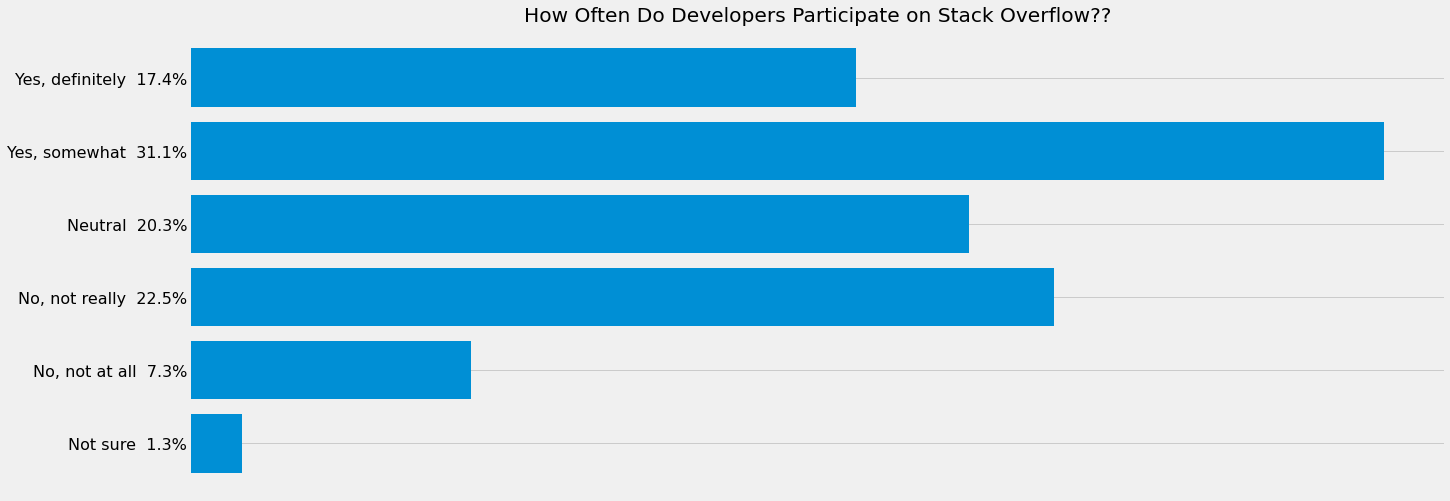

In [117]:
SOComm = data["SOComm"]  ##### Call data we need
SOComm.dropna(inplace = True)  #### filter and remove empty spaces

counted  = Counter(SOComm)  ########### count data #####

########### creating ordered list for key phrases ######
key_Phrases  =["Not sure", "No, not at all", "No, not really",
                "Neutral", "Yes, somewhat",
                "Yes, definitely" ]

########## creating empty list for quantity to add data ########
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



#### Building graph
Build_Barh_sizes( key_Phrases , Quantity, SOComm ,"fivethirtyeight", False , (20,8), "How Often Do Developers Participate on Stack Overflow??")       
                                                          

<h5 style="text-align:center; " > <b>Is Stack Overflow More Welcoming Than Last Year?

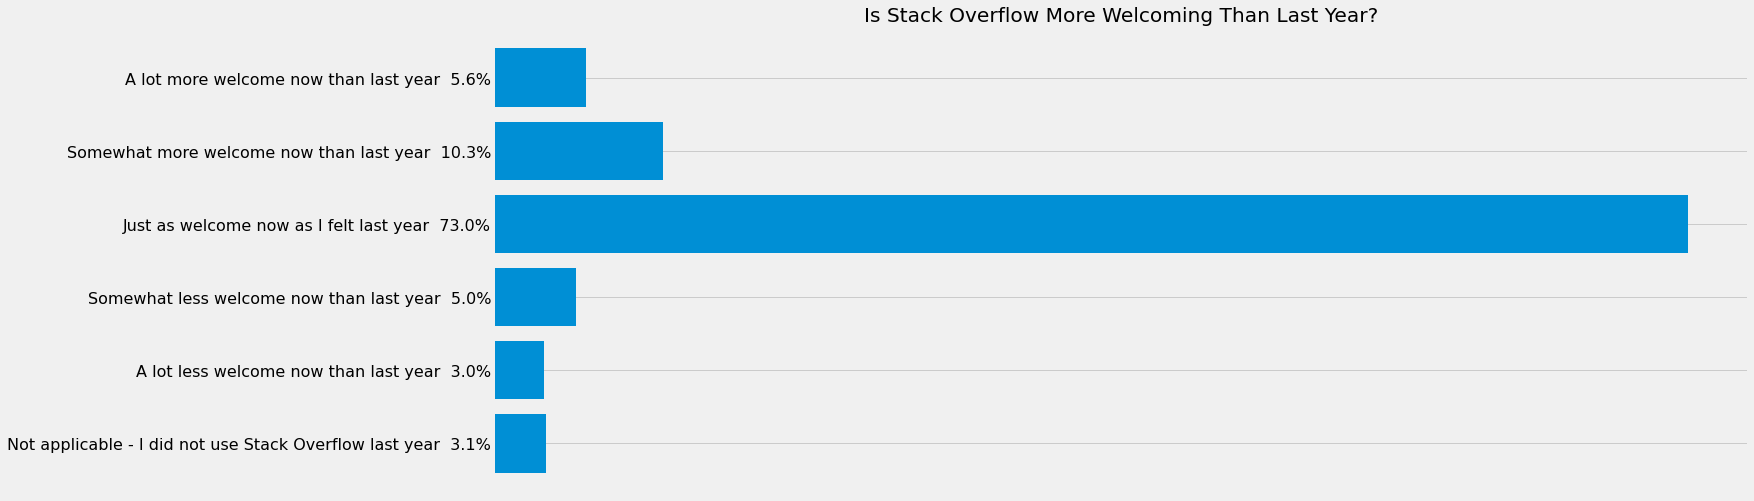

In [118]:
WelcomeChange = data["WelcomeChange"]  #### Call data we need
WelcomeChange.dropna(inplace = True) #### filter and remove empty spaces

counted  = Counter(WelcomeChange)  ########### count data #####

########### creating ordered list for key phrases ######
key_Phrases  =["Not applicable - I did not use Stack Overflow last year", "A lot less welcome now than last year", 
                "Somewhat less welcome now than last year", "Just as welcome now as I felt last year",
                "Somewhat more welcome now than last year", "A lot more welcome now than last year" ]

########## creating empty list for quantity to add data ########
Quantity = []

###### distributing key phrases by quantity #######
for i in key_Phrases:
    Quantity.append(counted[i])



#### Building graph
Build_Barh_sizes( key_Phrases , Quantity, WelcomeChange ,"fivethirtyeight", False , (20,8), "Is Stack Overflow More Welcoming Than Last Year?")       
                                                          


<h5 style="text-align:center; " > <b>Opinions on New Content Types

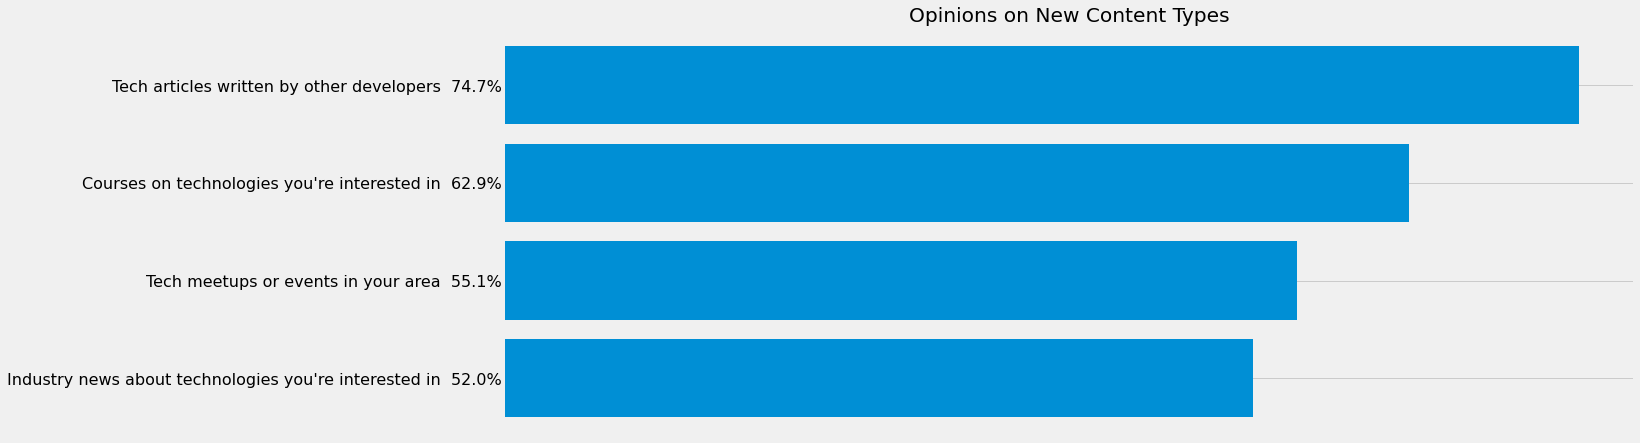

In [119]:
new_content_SO = data["SONewContent"]  #### Call data we need
new_content_SO.dropna(inplace = True) #### filter and remove empty spaces
new_content_SO = new_content_SO.str.split(";") ### split elements where ";" is written

list_sorter_counter(new_content_SO) #auto sort and count

##### building graph
Build_Barh_sizes(key_Phrases, Quantity, new_content_SO, "fivethirtyeight", False , (18,7), "Opinions on New Content Types") 